In [2]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid

In [3]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.ibmq.providers.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

/var/folders/6l/f5pw0tyx785dhvmqpb7282h00000gn/T/ipykernel_25047/1416725149.py:9: DeprecationWarning: The qiskit.extensions module is deprecated since Qiskit 0.46.0. It will be removed in the Qiskit 1.0 release.
  from qiskit.extensions import UnitaryGate


In [4]:
def map_statepop_2_ibm_mapping(counts,n):
    counts_ibm_mapping=[0 for i in range (2**(2*n))]
    idx_ibm_mapping=[]
    counts_ibm_mapping_dic={}
    if len(str((2*n)))<2:
        f="00"+str(2*n)+"b"
    elif len(str((2*n)))<3:
        f="0"+str(2*n)+"b"
    else:
        raise ValueError("n is too big")
    for gates_idx in range (2**(2*n)):
        gates_idx_str=format(gates_idx,f)
        ibm_idx=0
        for i in range (2*n):
            ibm_idx+=2**(i)*int(gates_idx_str[i])
        ibm_idx_str=format(ibm_idx,f)
#         idx_ibm_mapping.append(ibm_idx_str)
        counts_ibm_mapping[ibm_idx]=counts[gates_idx]
        counts_ibm_mapping_dic[ibm_idx_str]=counts[gates_idx]
    return counts_ibm_mapping, counts_ibm_mapping_dic

def load_eab_data_ordered(data_path):
    L1=[]
    filenames=[]
    filenames_ordered=[]
    line_Idx="000"
    line_num=""
    p=0 #position indicator
    not_datafile=[]
    
    #------------------------------------------read in raw data-------------------------------
    for f in os.listdir(data_path):
        if (f.find("Line")!=-1):
            n=f.find("_")
            line_Idx=f[n+6:n+9]
            for i in range(3):
                if line_Idx[i]=="0":
                    p+=1
                else:
                    line_num=line_Idx[p:3]
                    p=0
                    break
            L1.append(int(line_num))
            filenames.append(f)
        else:
            # print (f) #print out non datafiles just for debugging 
            not_datafile.append(f)
            continue
    for Idx in range (max(L1)):
        for i in range (len(filenames)):
            if L1[i]==Idx+1:
                filenames_ordered.append(filenames[i])
                break
    return filenames_ordered

In [5]:
Set_Mapping([4,5,2,1,3])
nqubit=2
C=20
shots=2000
results_d2=np.zeros((C,2**(2*nqubit)))
results_d4=np.zeros((C,2**(2*nqubit)))
results_d8=np.zeros((C,2**(2*nqubit)))

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=2.txt", 'r')
Lines= file.readlines()
c_d2=[]
count = 0
for line in Lines:
    c_d2.append(line)
    count += 1
print (count)
count=0

# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=4.txt", 'r')
# Lines= file.readlines()
# c_d4=[]
# count = 0
# for line in Lines:
#     c_d4.append(line)
#     count += 1
# print (count)
# count=0

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=8.txt", 'r')
Lines= file.readlines()
c_d8=[]
count = 0
for line in Lines:
    c_d8.append(line)
    count += 1
print (count)
count=0

# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=16.txt", 'r')
# Lines= file.readlines()
# c_d16=[]
# count = 0
# for line in Lines:
#     c_d16.append(line)
#     count += 1
# print (count)
# count=0


file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=32.txt", 'r')
Lines= file.readlines()
c_d32=[]
count = 0
for line in Lines:
    c_d32.append(line)
    count += 1
print (count)
count=0



20
20
20


In [6]:
filenames_d2=[]
filenames_d4=[]
filenames_d8=[]
filenames_d16=[]
filenames_d32=[]
filenames_d2_0223=[]
filenames_d4_0223=[]
filenames_d8_0223=[]
filenames_d16_0223=[]
filenames_d32_0223=[]
filenames=[]

# load data from 0301 for comparison 
# paf_data_d2_comp="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/FTXX45_EAB_middleionidle_01+10_0301_to_03042024/2024-03-01 EAB__d=2/"
# filenames_d2_comp=load_eab_data_ordered(paf_data_d2_comp)
# print (filenames_d2_comp)


# paf_data_d4_0223="/Volumes/funkflower/Labs/Gates/Data/2024/202402/20240223/2024-02-23 EAB__d=4/"
# filenames_d4_0223=load_eab_data_ordered(paf_data_d4_0223)
# print (filenames_d4_0223)

# paf_data_d8_0223="/Volumes/funkflower/Labs/Gates/Data/2024/202402/20240223/2024-02-23 EAB__d=8/"
# filenames_d8_0223=load_eab_data_ordered(paf_data_d8_0223)
# print (filenames_d8_0223)


# paf_data_d16_0223="/Volumes/funkflower/Labs/Gates/Data/2024/202402/20240223/2024-02-23 EAB__d=16/"
# filenames_d16_0223=load_eab_data_ordered(paf_data_d16_0223)
# print (filenames_d16_0223)

# paf_data_d32_0223="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/FTXX45_EAB_middleionidle_01+10_0301_to_03042024/d=32/"
# filenames_d32_0223=load_eab_data_ordered(paf_data_d32_0223)
# print (filenames_d32_0223)



#load 03012024 data 

paf_data_d2="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240301/2024-03-01 EAB__d=2/"
filenames_d2=load_eab_data_ordered(paf_data_d2)
print (filenames_d2)


# paf_data_d4_0223="/"
# filenames_d4_0223=load_eab_data_ordered(paf_data_d4)
# print (filenames_d4)

paf_data_d8="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240301/2024-03-01 EAB__d=8/"
filenames_d8=load_eab_data_ordered(paf_data_d8)
print (filenames_d8)


# paf_data_d16="/Volumes/funkflower/Labs/Gates/Data/2024/202402/20240223/2024-02-23 EAB__d=16/"
# filenames_d16=load_eab_data_ordered(paf_data_d16)
# print (filenames_d16)

paf_data_d32="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240301/2024-03-01 EAB__d=32/"
filenames_d32=load_eab_data_ordered(paf_data_d32)
print (filenames_d32)

['2024-03-01-191854_Line_001.txt', '2024-03-01-191920_Line_002.txt', '2024-03-01-191946_Line_003.txt', '2024-03-01-192012_Line_004.txt', '2024-03-01-192038_Line_005.txt', '2024-03-01-192104_Line_006.txt', '2024-03-01-193121_Line_007.txt', '2024-03-01-193147_Line_008.txt', '2024-03-01-193213_Line_009.txt', '2024-03-01-193239_Line_010.txt', '2024-03-01-193305_Line_011.txt', '2024-03-01-193330_Line_012.txt', '2024-03-01-193453_Line_013.txt', '2024-03-01-193519_Line_014.txt', '2024-03-01-193545_Line_015.txt', '2024-03-01-193610_Line_016.txt', '2024-03-01-193635_Line_017.txt', '2024-03-01-193701_Line_018.txt', '2024-03-01-195413_Line_019.txt', '2024-03-01-195439_Line_020.txt']
['2024-03-01-191854_Line_001.txt', '2024-03-01-191920_Line_002.txt', '2024-03-01-191946_Line_003.txt', '2024-03-01-192012_Line_004.txt', '2024-03-01-192038_Line_005.txt', '2024-03-01-192104_Line_006.txt', '2024-03-01-193121_Line_007.txt', '2024-03-01-193147_Line_008.txt', '2024-03-01-193213_Line_009.txt', '2024-03-01-

In [7]:
a=Quantum_State(5)
a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

# a_=Quantum_State(5)
a_comp=Quantum_State(5)

# spam1=SPAM_Operator(5)
# spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM1/SPAM1.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM2/SPAM2.csv")


2024-03-01-191854_Line_001.txt
counts: [16, 11, 5, 1, 19, 59, 8, 80, 18, 87, 1, 8, 56, 1547, 4, 80]
counts_ibm_mapping_dic: {'0000': 16, '1000': 11, '0100': 5, '1100': 1, '0010': 19, '1010': 59, '0110': 8, '1110': 80, '0001': 18, '1001': 87, '0101': 1, '1101': 8, '0011': 56, '1011': 1547, '0111': 4, '1111': 80}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



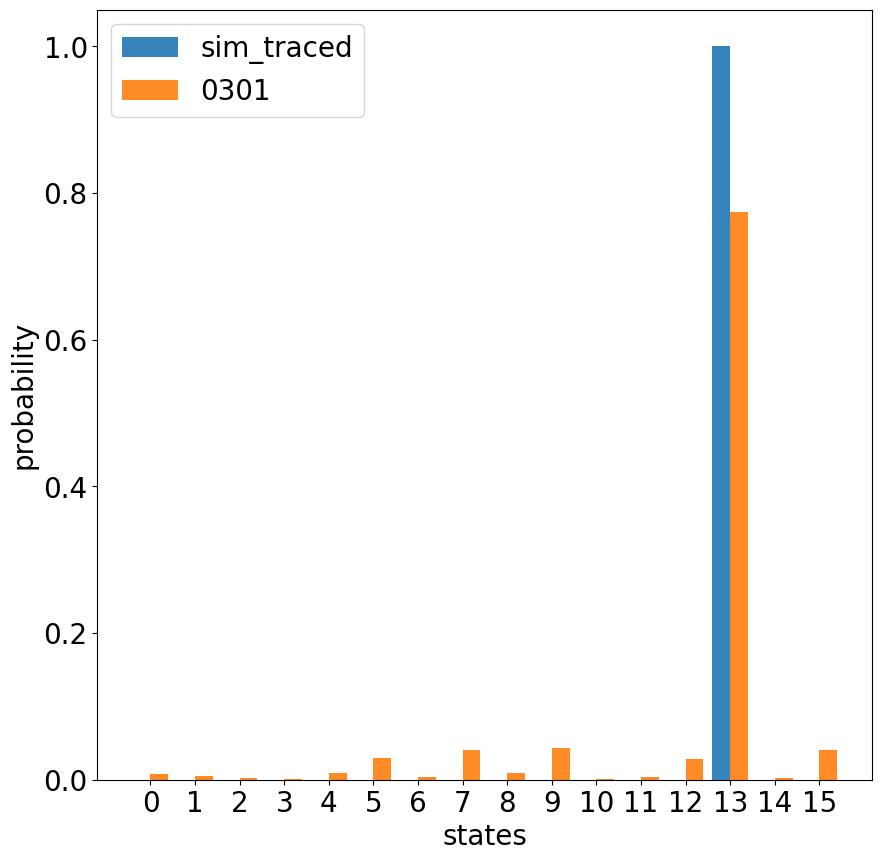

2024-03-01-191920_Line_002.txt
counts: [12, 2, 21, 63, 8, 42, 43, 1517, 6, 9, 3, 10, 16, 119, 4, 125]
counts_ibm_mapping_dic: {'0000': 12, '1000': 2, '0100': 21, '1100': 63, '0010': 8, '1010': 42, '0110': 43, '1110': 1517, '0001': 6, '1001': 9, '0101': 3, '1101': 10, '0011': 16, '1011': 119, '0111': 4, '1111': 125}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



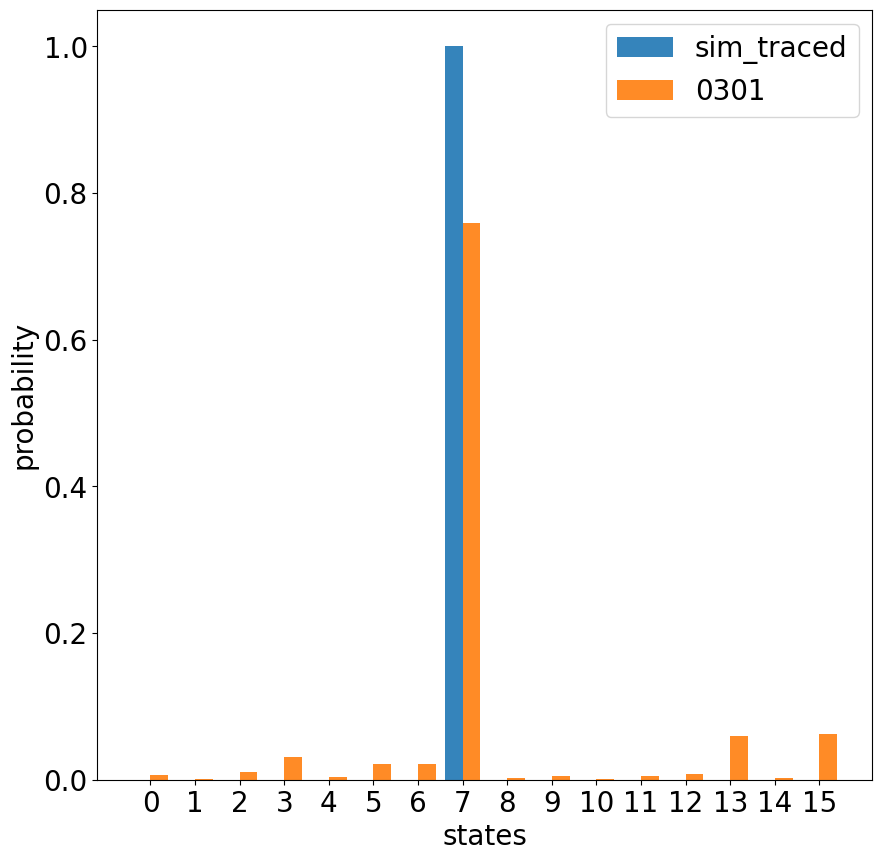

2024-03-01-191946_Line_003.txt
counts: [21, 105, 4, 2, 45, 1591, 2, 37, 2, 14, 0, 2, 7, 119, 2, 47]
counts_ibm_mapping_dic: {'0000': 21, '1000': 105, '0100': 4, '1100': 2, '0010': 45, '1010': 1591, '0110': 2, '1110': 37, '0001': 2, '1001': 14, '0101': 0, '1101': 2, '0011': 7, '1011': 119, '0111': 2, '1111': 47}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



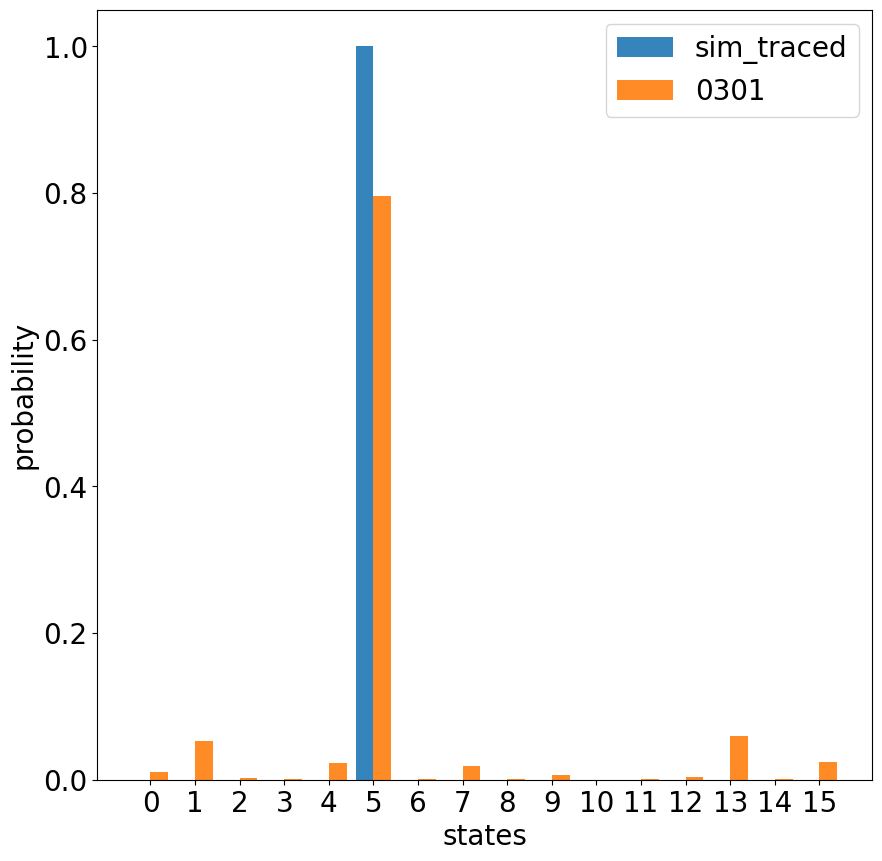

2024-03-01-192012_Line_004.txt
counts: [4, 31, 0, 121, 3, 12, 3, 17, 7, 101, 42, 1493, 14, 10, 25, 117]
counts_ibm_mapping_dic: {'0000': 4, '1000': 31, '0100': 0, '1100': 121, '0010': 3, '1010': 12, '0110': 3, '1110': 17, '0001': 7, '1001': 101, '0101': 42, '1101': 1493, '0011': 14, '1011': 10, '0111': 25, '1111': 117}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



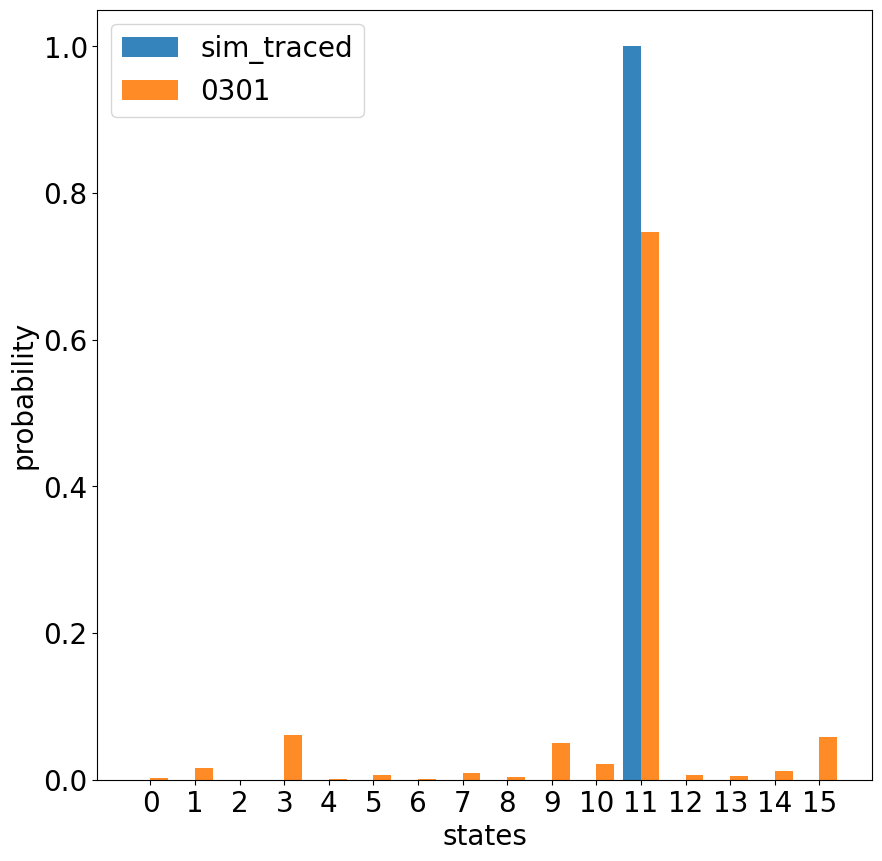

2024-03-01-192038_Line_005.txt
counts: [242, 20, 7, 15, 1526, 24, 36, 9, 17, 1, 6, 8, 46, 15, 23, 5]
counts_ibm_mapping_dic: {'0000': 242, '1000': 20, '0100': 7, '1100': 15, '0010': 1526, '1010': 24, '0110': 36, '1110': 9, '0001': 17, '1001': 1, '0101': 6, '1101': 8, '0011': 46, '1011': 15, '0111': 23, '1111': 5}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



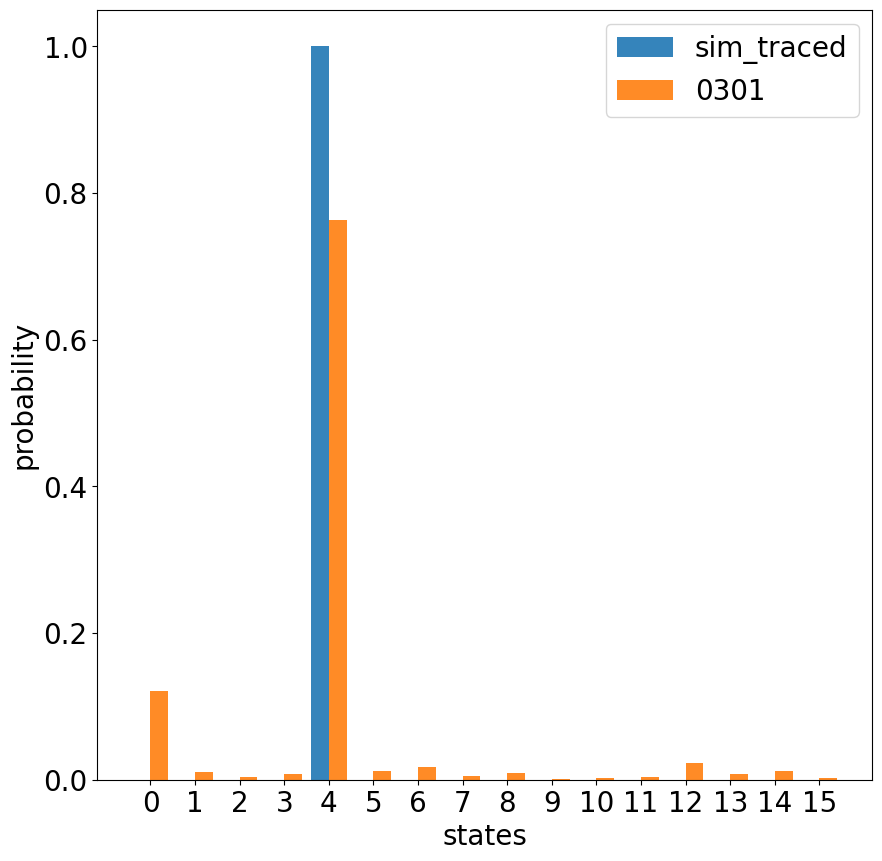

2024-03-01-192104_Line_006.txt
counts: [1, 8, 4, 2, 3, 70, 9, 29, 18, 72, 7, 2, 47, 1670, 17, 41]
counts_ibm_mapping_dic: {'0000': 1, '1000': 8, '0100': 4, '1100': 2, '0010': 3, '1010': 70, '0110': 9, '1110': 29, '0001': 18, '1001': 72, '0101': 7, '1101': 2, '0011': 47, '1011': 1670, '0111': 17, '1111': 41}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



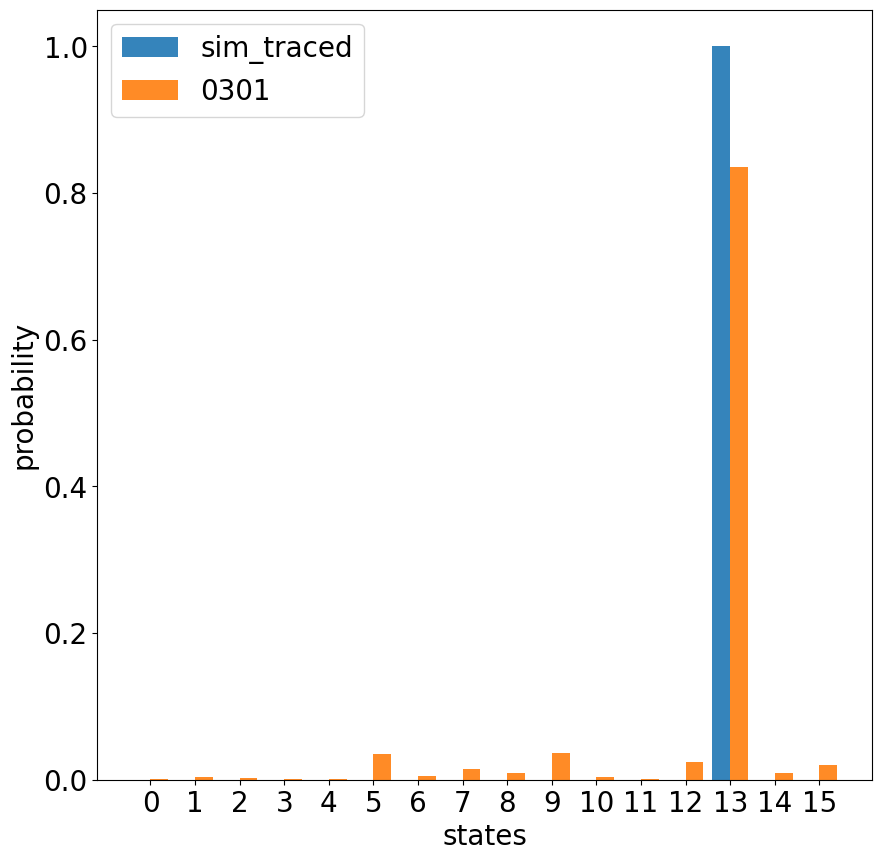

2024-03-01-193121_Line_007.txt
counts: [39, 1683, 9, 37, 25, 81, 7, 6, 3, 60, 4, 19, 1, 7, 15, 4]
counts_ibm_mapping_dic: {'0000': 39, '1000': 1683, '0100': 9, '1100': 37, '0010': 25, '1010': 81, '0110': 7, '1110': 6, '0001': 3, '1001': 60, '0101': 4, '1101': 19, '0011': 1, '1011': 7, '0111': 15, '1111': 4}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



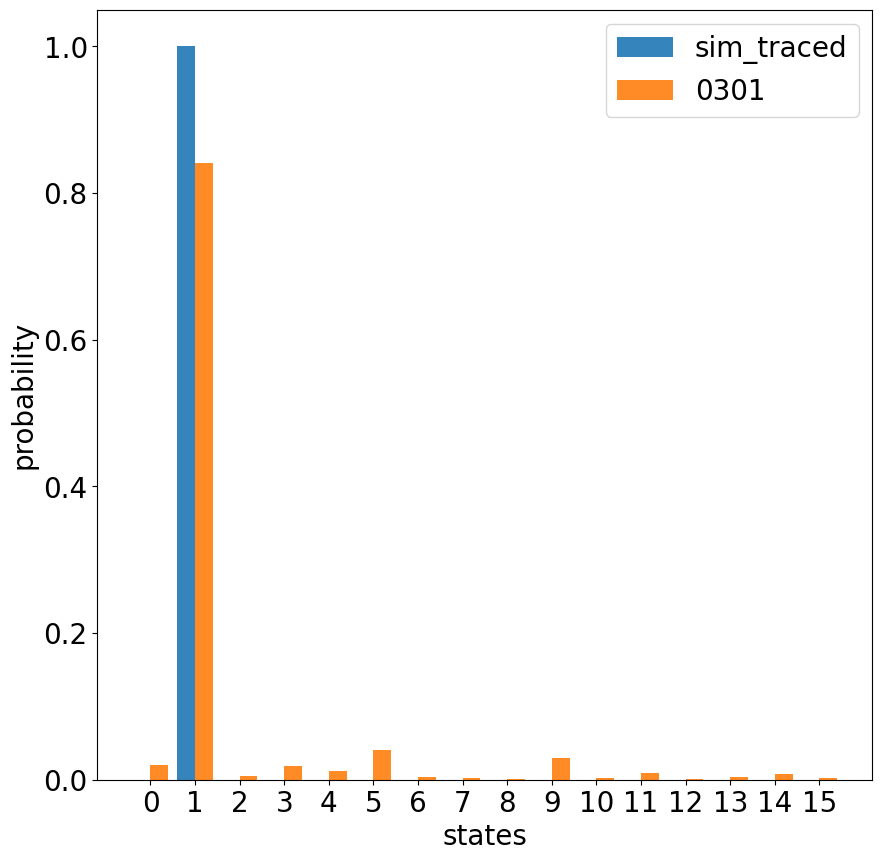

2024-03-01-193147_Line_008.txt
counts: [16, 78, 7, 20, 6, 19, 1, 1, 62, 1639, 1, 53, 20, 69, 3, 5]
counts_ibm_mapping_dic: {'0000': 16, '1000': 78, '0100': 7, '1100': 20, '0010': 6, '1010': 19, '0110': 1, '1110': 1, '0001': 62, '1001': 1639, '0101': 1, '1101': 53, '0011': 20, '1011': 69, '0111': 3, '1111': 5}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



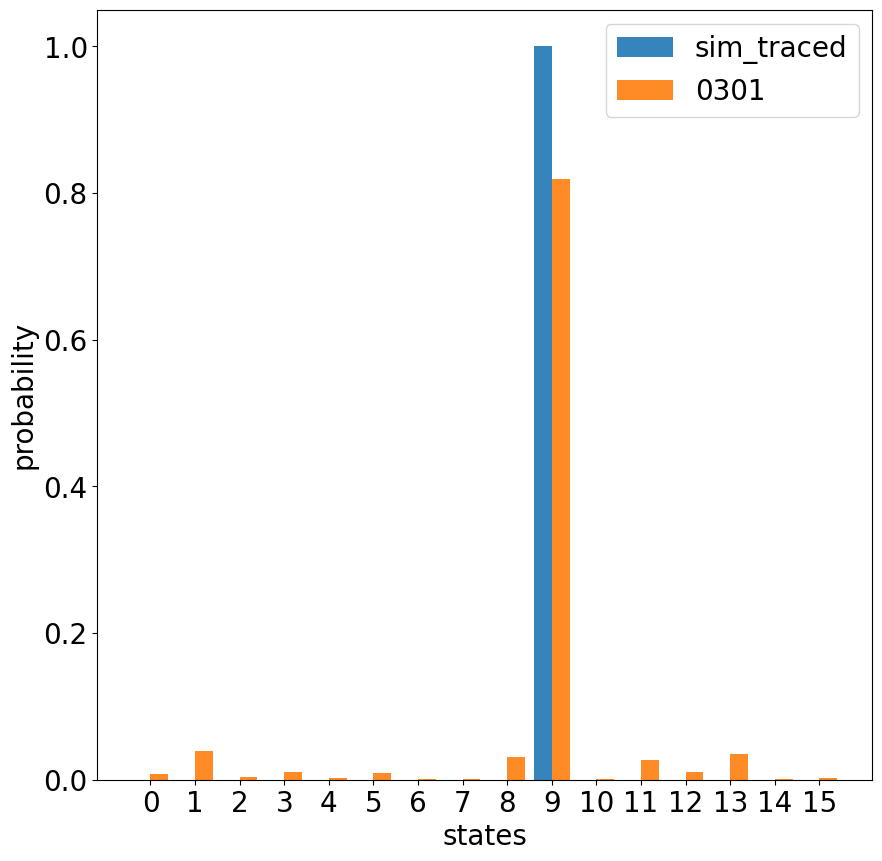

2024-03-01-193213_Line_009.txt
counts: [0, 6, 5, 5, 4, 76, 5, 58, 20, 68, 2, 5, 34, 1630, 15, 67]
counts_ibm_mapping_dic: {'0000': 0, '1000': 6, '0100': 5, '1100': 5, '0010': 4, '1010': 76, '0110': 5, '1110': 58, '0001': 20, '1001': 68, '0101': 2, '1101': 5, '0011': 34, '1011': 1630, '0111': 15, '1111': 67}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



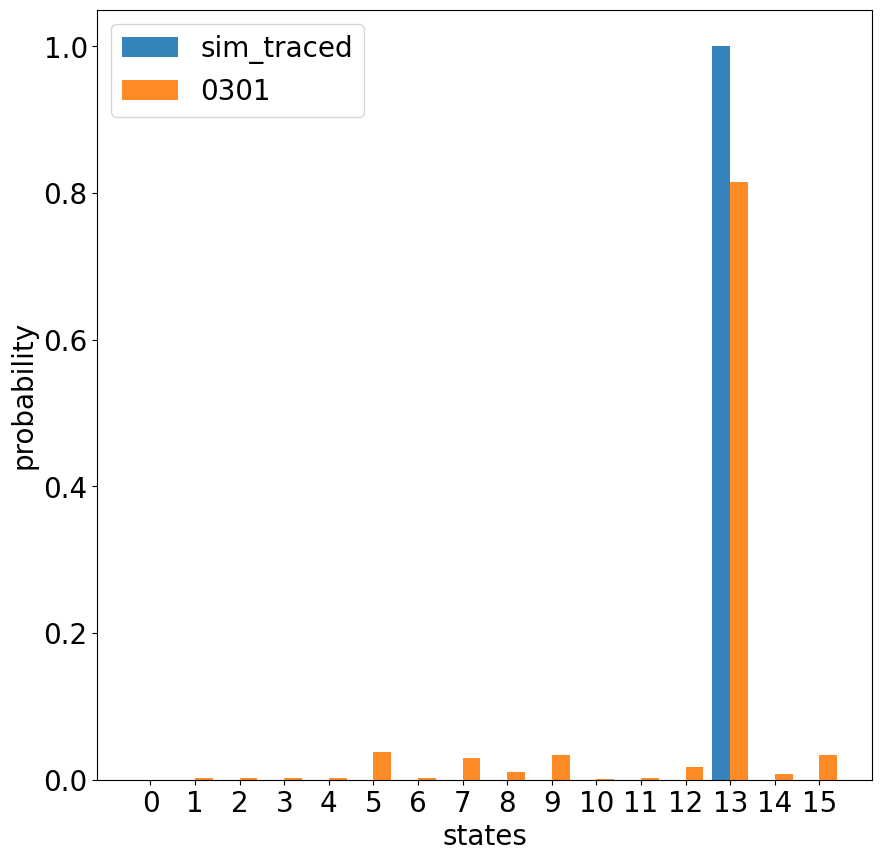

2024-03-01-193239_Line_010.txt
counts: [3, 100, 11, 54, 1, 28, 8, 7, 46, 1518, 7, 45, 26, 129, 8, 9]
counts_ibm_mapping_dic: {'0000': 3, '1000': 100, '0100': 11, '1100': 54, '0010': 1, '1010': 28, '0110': 8, '1110': 7, '0001': 46, '1001': 1518, '0101': 7, '1101': 45, '0011': 26, '1011': 129, '0111': 8, '1111': 9}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



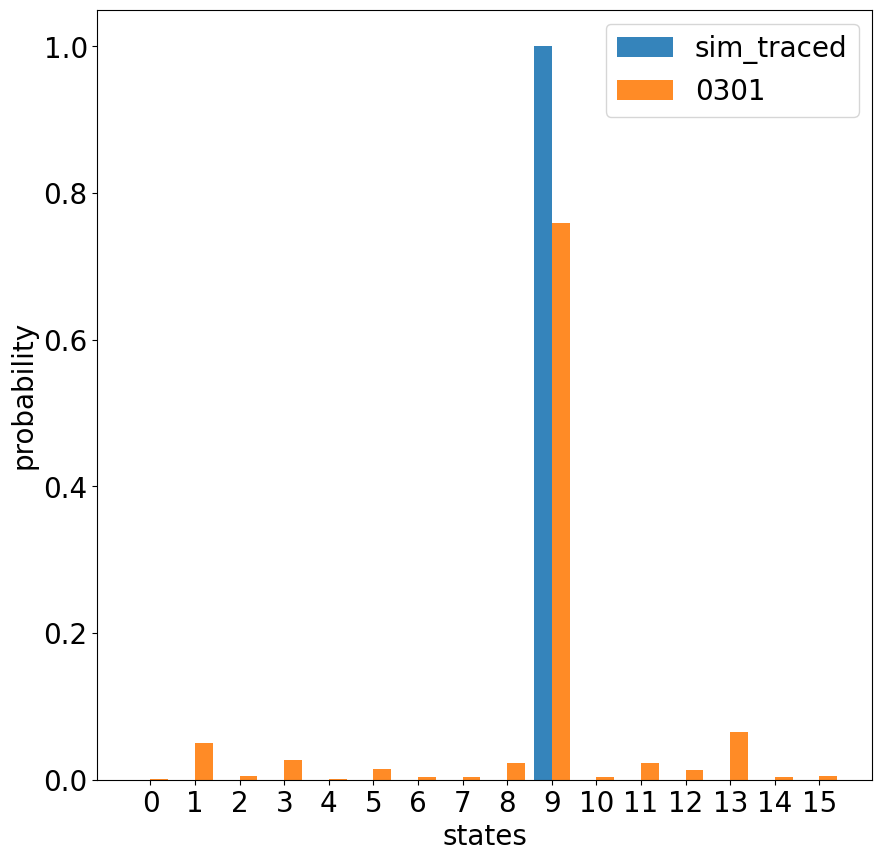

2024-03-01-193305_Line_011.txt
counts: [17, 13, 13, 10, 12, 42, 8, 100, 7, 6, 68, 120, 7, 54, 45, 1478]
counts_ibm_mapping_dic: {'0000': 17, '1000': 13, '0100': 13, '1100': 10, '0010': 12, '1010': 42, '0110': 8, '1110': 100, '0001': 7, '1001': 6, '0101': 68, '1101': 120, '0011': 7, '1011': 54, '0111': 45, '1111': 1478}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



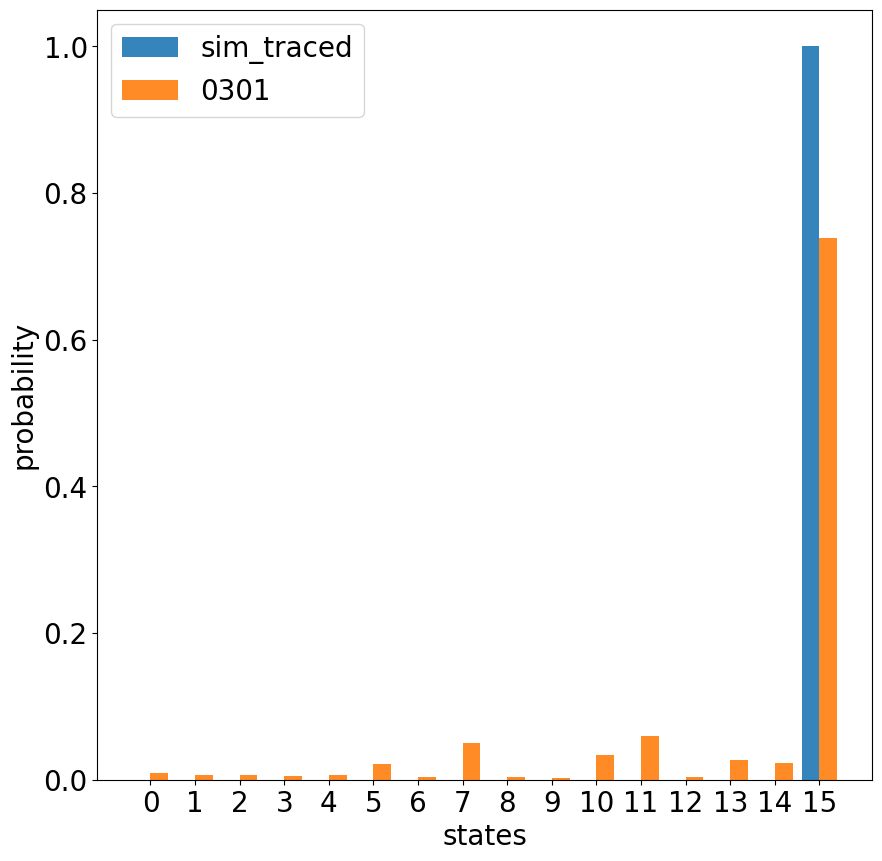

2024-03-01-193330_Line_012.txt
counts: [1578, 28, 20, 6, 173, 20, 3, 1, 88, 4, 12, 16, 39, 2, 10, 0]
counts_ibm_mapping_dic: {'0000': 1578, '1000': 28, '0100': 20, '1100': 6, '0010': 173, '1010': 20, '0110': 3, '1110': 1, '0001': 88, '1001': 4, '0101': 12, '1101': 16, '0011': 39, '1011': 2, '0111': 10, '1111': 0}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



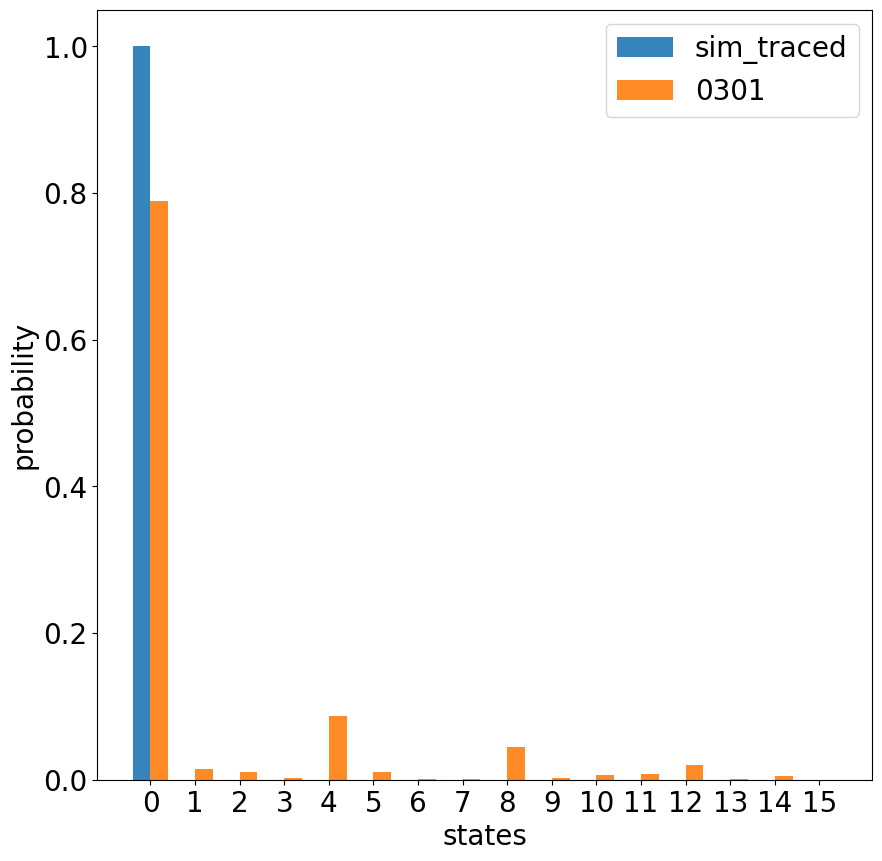

2024-03-01-193453_Line_013.txt
counts: [7, 6, 24, 4, 30, 11, 114, 2, 5, 21, 161, 19, 31, 17, 1503, 45]
counts_ibm_mapping_dic: {'0000': 7, '1000': 6, '0100': 24, '1100': 4, '0010': 30, '1010': 11, '0110': 114, '1110': 2, '0001': 5, '1001': 21, '0101': 161, '1101': 19, '0011': 31, '1011': 17, '0111': 1503, '1111': 45}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



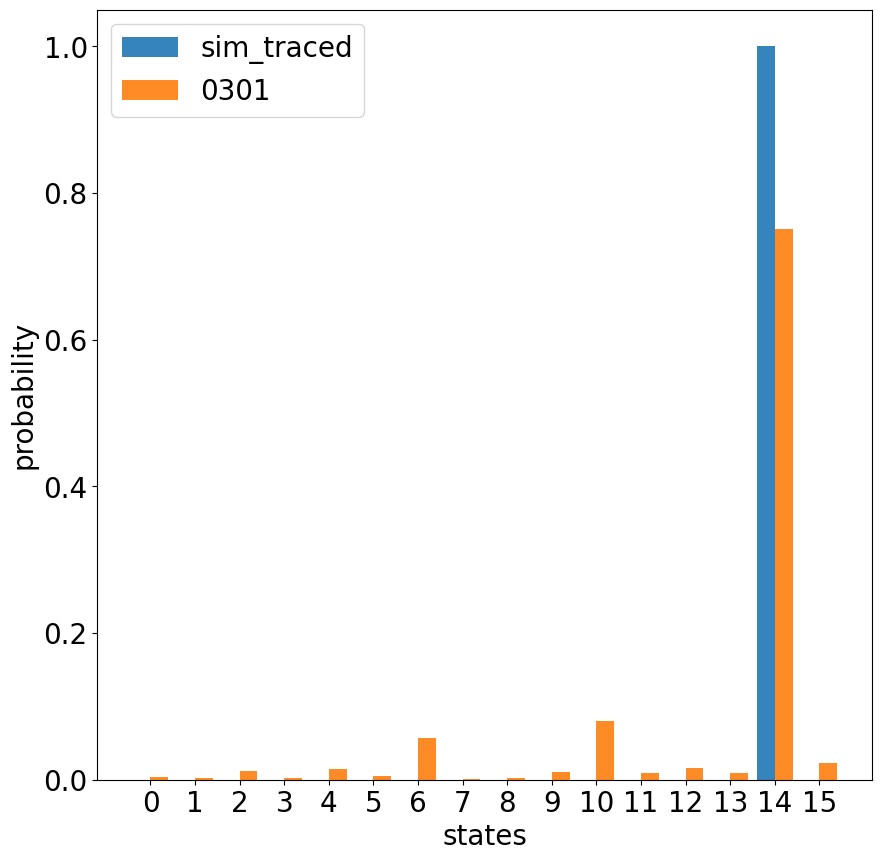

2024-03-01-193519_Line_014.txt
counts: [1619, 21, 59, 13, 116, 10, 8, 4, 86, 0, 19, 8, 28, 2, 5, 2]
counts_ibm_mapping_dic: {'0000': 1619, '1000': 21, '0100': 59, '1100': 13, '0010': 116, '1010': 10, '0110': 8, '1110': 4, '0001': 86, '1001': 0, '0101': 19, '1101': 8, '0011': 28, '1011': 2, '0111': 5, '1111': 2}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



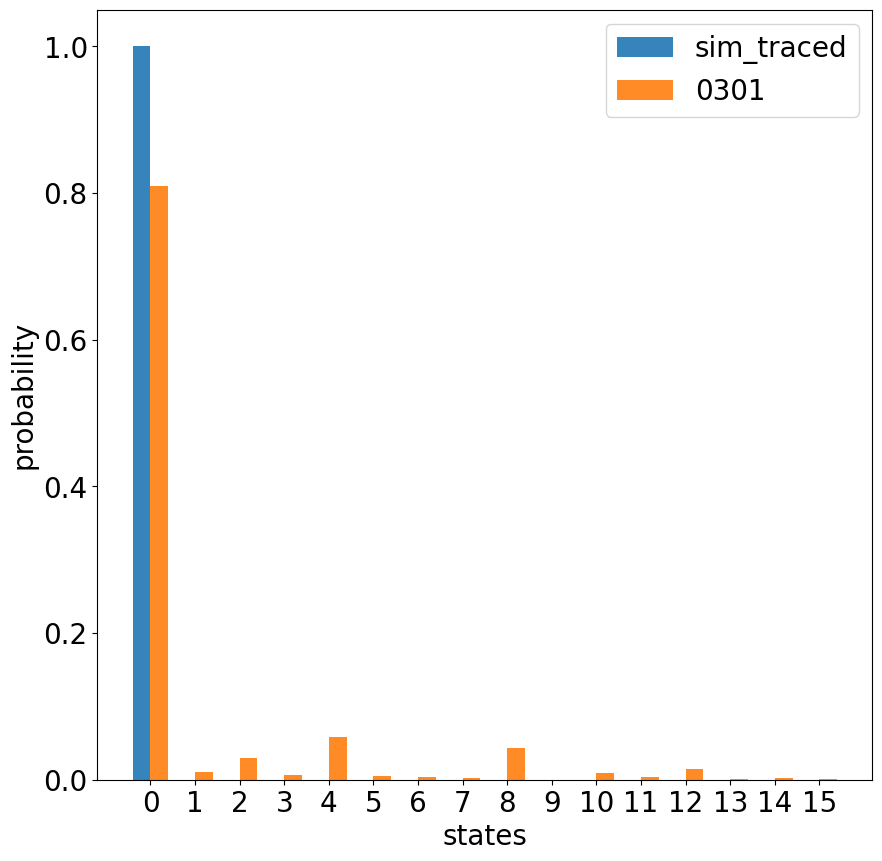

2024-03-01-193545_Line_015.txt
counts: [13, 0, 10, 8, 64, 5, 57, 13, 147, 21, 3, 4, 1584, 32, 35, 4]
counts_ibm_mapping_dic: {'0000': 13, '1000': 0, '0100': 10, '1100': 8, '0010': 64, '1010': 5, '0110': 57, '1110': 13, '0001': 147, '1001': 21, '0101': 3, '1101': 4, '0011': 1584, '1011': 32, '0111': 35, '1111': 4}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



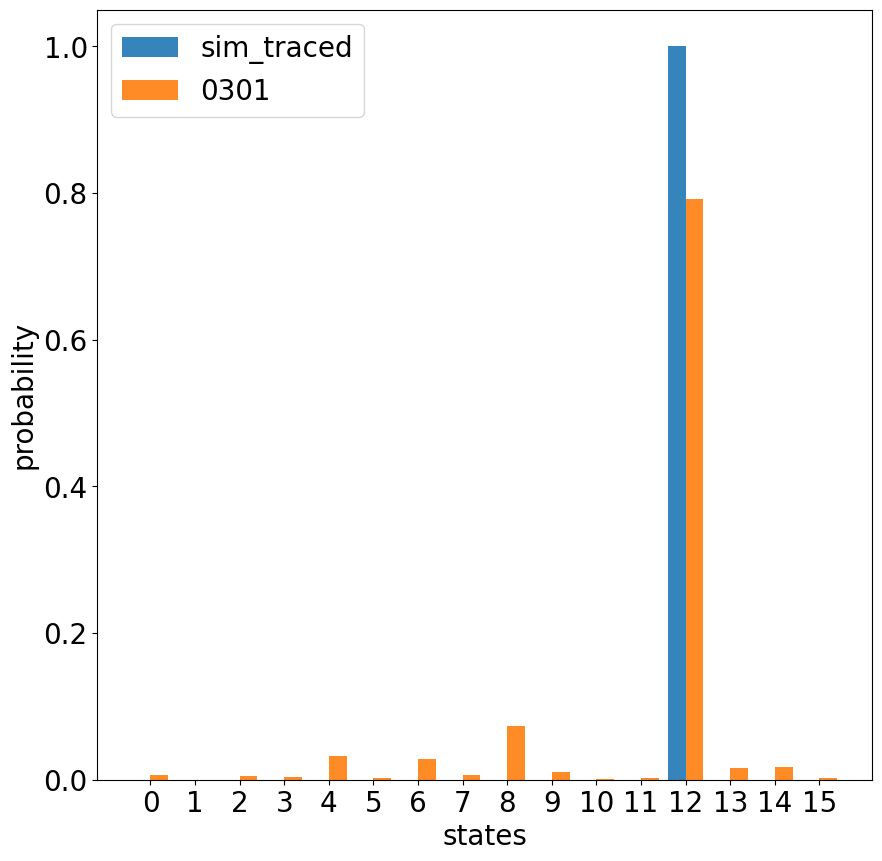

2024-03-01-193610_Line_016.txt
counts: [1586, 22, 28, 5, 107, 19, 11, 22, 125, 2, 31, 18, 17, 2, 5, 0]
counts_ibm_mapping_dic: {'0000': 1586, '1000': 22, '0100': 28, '1100': 5, '0010': 107, '1010': 19, '0110': 11, '1110': 22, '0001': 125, '1001': 2, '0101': 31, '1101': 18, '0011': 17, '1011': 2, '0111': 5, '1111': 0}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



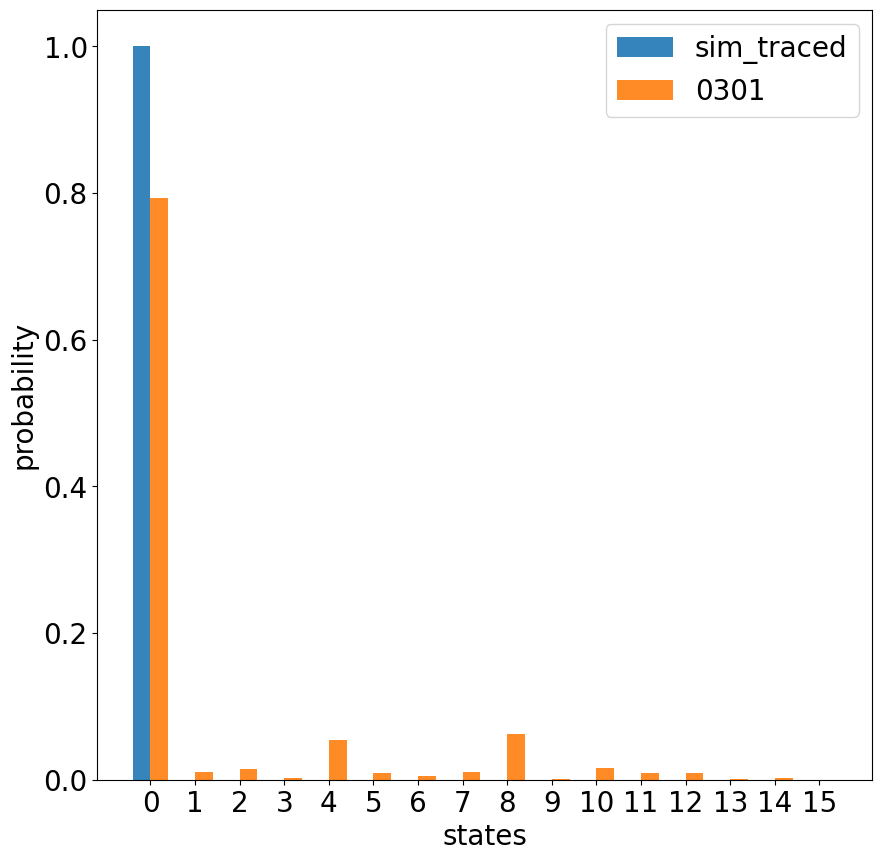

2024-03-01-193635_Line_017.txt
counts: [55, 22, 125, 7, 5, 2, 18, 4, 54, 18, 1482, 30, 10, 13, 140, 15]
counts_ibm_mapping_dic: {'0000': 55, '1000': 22, '0100': 125, '1100': 7, '0010': 5, '1010': 2, '0110': 18, '1110': 4, '0001': 54, '1001': 18, '0101': 1482, '1101': 30, '0011': 10, '1011': 13, '0111': 140, '1111': 15}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



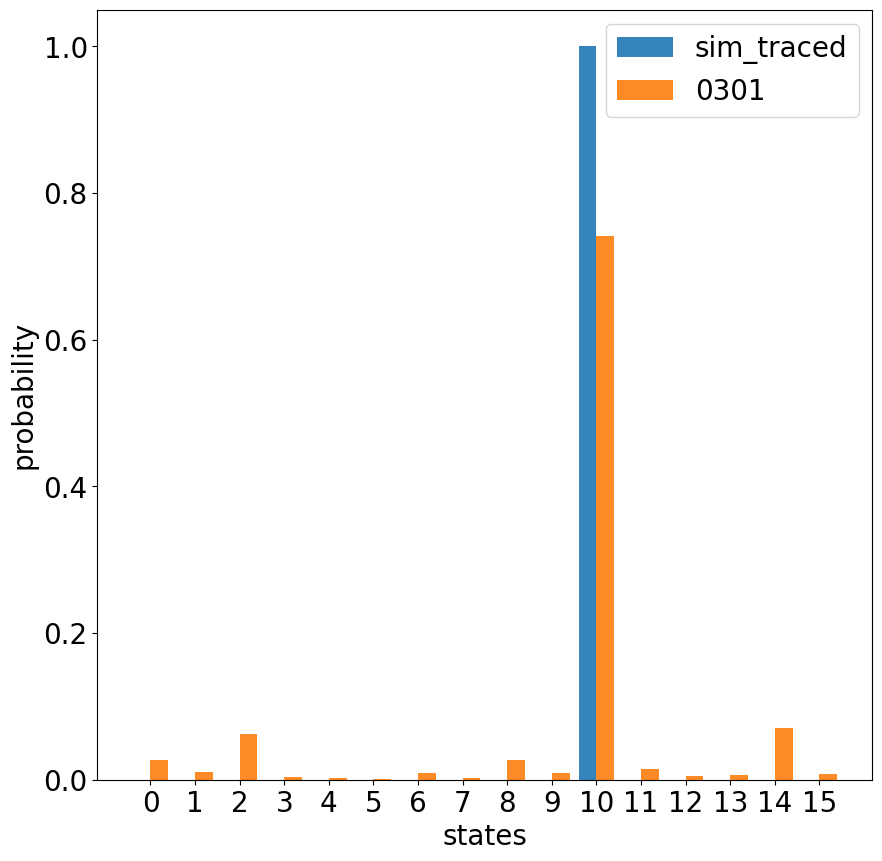

2024-03-01-193701_Line_018.txt
counts: [22, 133, 16, 7, 60, 1608, 6, 36, 3, 4, 1, 2, 11, 59, 7, 25]
counts_ibm_mapping_dic: {'0000': 22, '1000': 133, '0100': 16, '1100': 7, '0010': 60, '1010': 1608, '0110': 6, '1110': 36, '0001': 3, '1001': 4, '0101': 1, '1101': 2, '0011': 11, '1011': 59, '0111': 7, '1111': 25}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



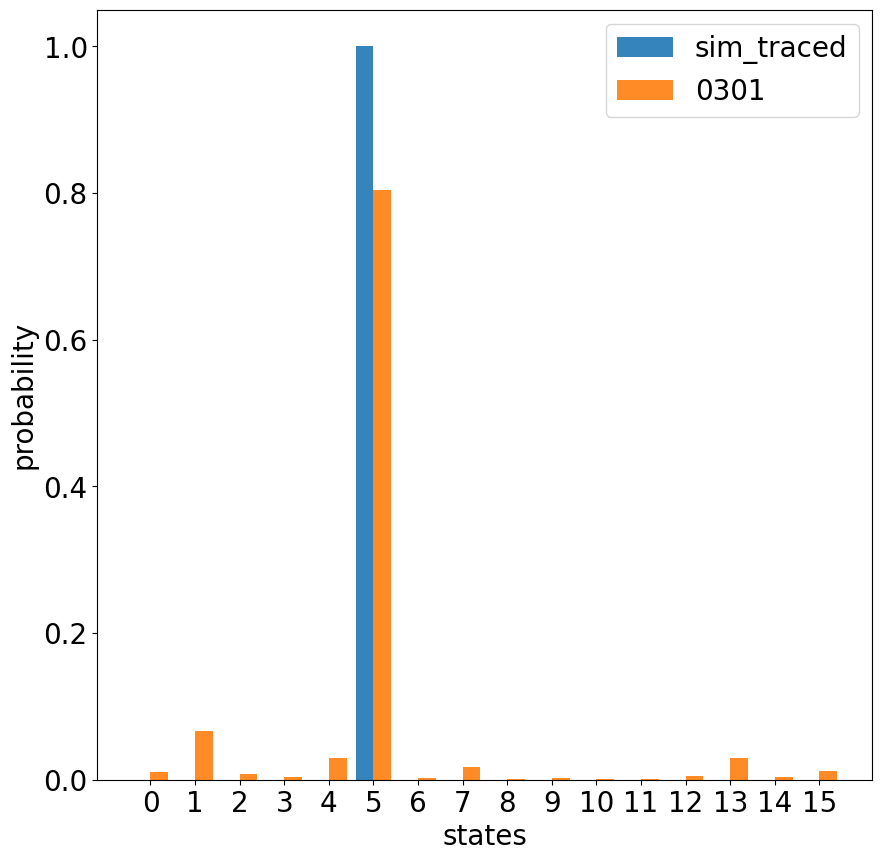

2024-03-01-195413_Line_019.txt
counts: [96, 4, 9, 13, 40, 4, 13, 9, 1481, 20, 31, 9, 229, 21, 10, 11]
counts_ibm_mapping_dic: {'0000': 96, '1000': 4, '0100': 9, '1100': 13, '0010': 40, '1010': 4, '0110': 13, '1110': 9, '0001': 1481, '1001': 20, '0101': 31, '1101': 9, '0011': 229, '1011': 21, '0111': 10, '1111': 11}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



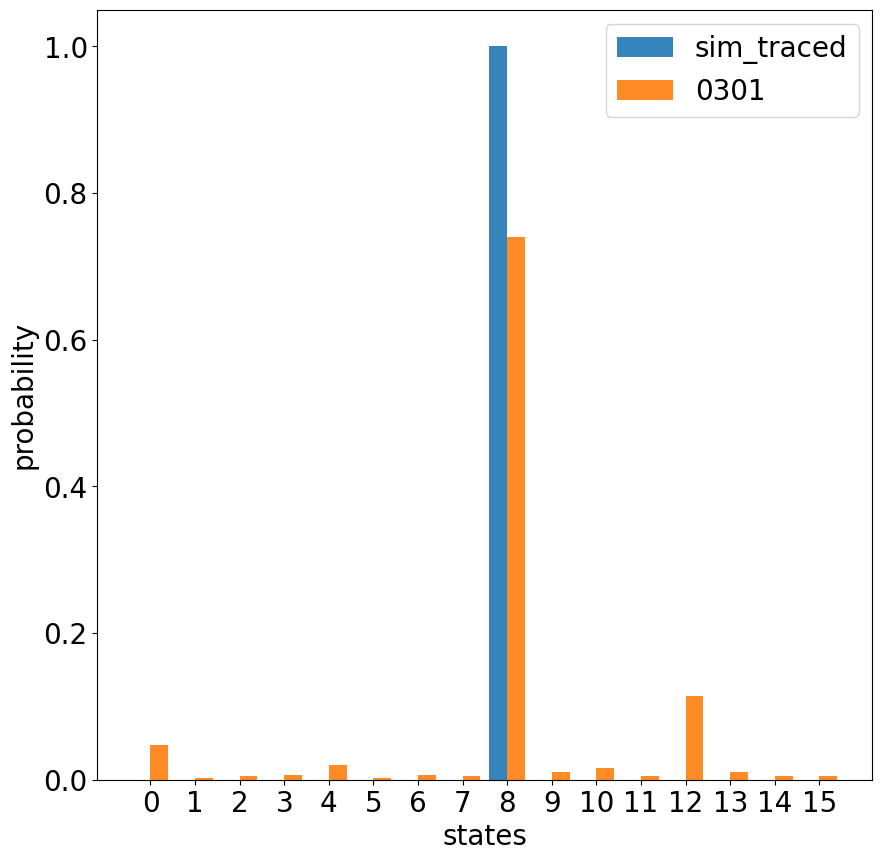

2024-03-01-195439_Line_020.txt
counts: [6, 8, 135, 22, 62, 34, 1458, 35, 11, 2, 17, 4, 50, 2, 149, 5]
counts_ibm_mapping_dic: {'0000': 6, '1000': 8, '0100': 135, '1100': 22, '0010': 62, '1010': 34, '0110': 1458, '1110': 35, '0001': 11, '1001': 2, '0101': 17, '1101': 4, '0011': 50, '1011': 2, '0111': 149, '1111': 5}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



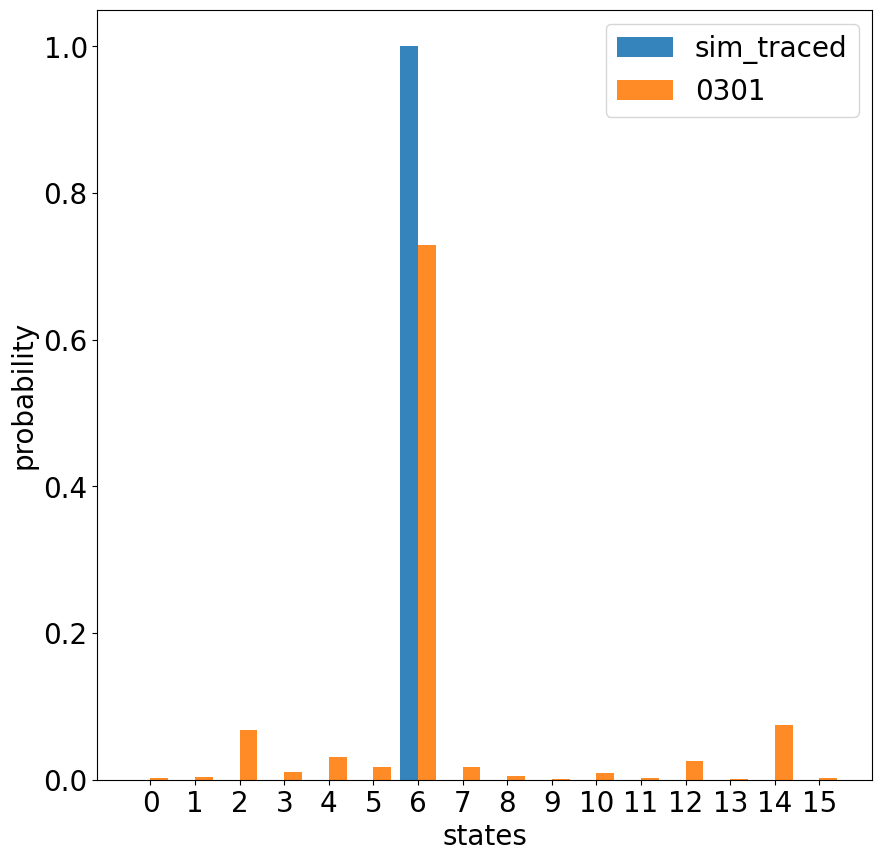

In [8]:
filenames_data=[]
counts_d2=[]
counts_d2_spam=[]
counts_d2_sim=[]
counts=[]
counts_spam=[]
counts_sim=[]
filenames_data=filenames_d2.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d2
circuit=c_d2
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d2.append(counts_ibm_mapping_dic)
    
#     a_s=spam1.Correct_SPAM(a)
    # a_s=a
    # data_traced_spam=Trace_Out(a_s,[0,1,2,3])
    # counts_spam=[round(shots*x) for x in  data_traced_spam.population]
    # counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
    # counts_d2_spam.append(counts_ibm_mapping_dic_spam)

    # a_comp.Import(paf_data_d2_comp+filenames_d2_comp[i],keep_file=True)
    # data_traced_comp=Trace_Out(a_comp,[0,1,2,3])
    
    # a_rerun.Import(paf_data_d2_rerun+filenames_d2_rerun[i],keep_file=True)
    # data_rerun_traced=Trace_Out(a_rerun,[0,1,2,3])
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in sim_traced.population]
    counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
    counts_d2_sim.append(counts_ibm_mapping_dic_sim)
    
    
    # Display_States_Population(states=[b,a,a_s],label=["simulation","d=2","spam"])
    Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","0301"])
# #       


['2024-02-23-160924_Line_001.txt', '2024-02-23-160951_Line_002.txt', '2024-02-23-161018_Line_003.txt', '2024-02-23-161045_Line_004.txt', '2024-02-23-161112_Line_005.txt', '2024-02-23-161235_Line_006.txt', '2024-02-23-162247_Line_007.txt', '2024-02-23-162315_Line_008.txt', '2024-02-23-162342_Line_009.txt', '2024-02-23-162409_Line_010.txt', '2024-02-23-205325_Line_011.txt', '2024-02-23-205352_Line_012.txt', '2024-02-23-205420_Line_013.txt', '2024-02-23-205447_Line_014.txt', '2024-02-23-205514_Line_015.txt', '2024-02-23-204846_Line_016.txt', '2024-02-23-204913_Line_017.txt', '2024-02-23-204940_Line_018.txt', '2024-02-23-205008_Line_019.txt', '2024-02-23-205036_Line_020.txt']
2024-02-23-160924_Line_001.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:A

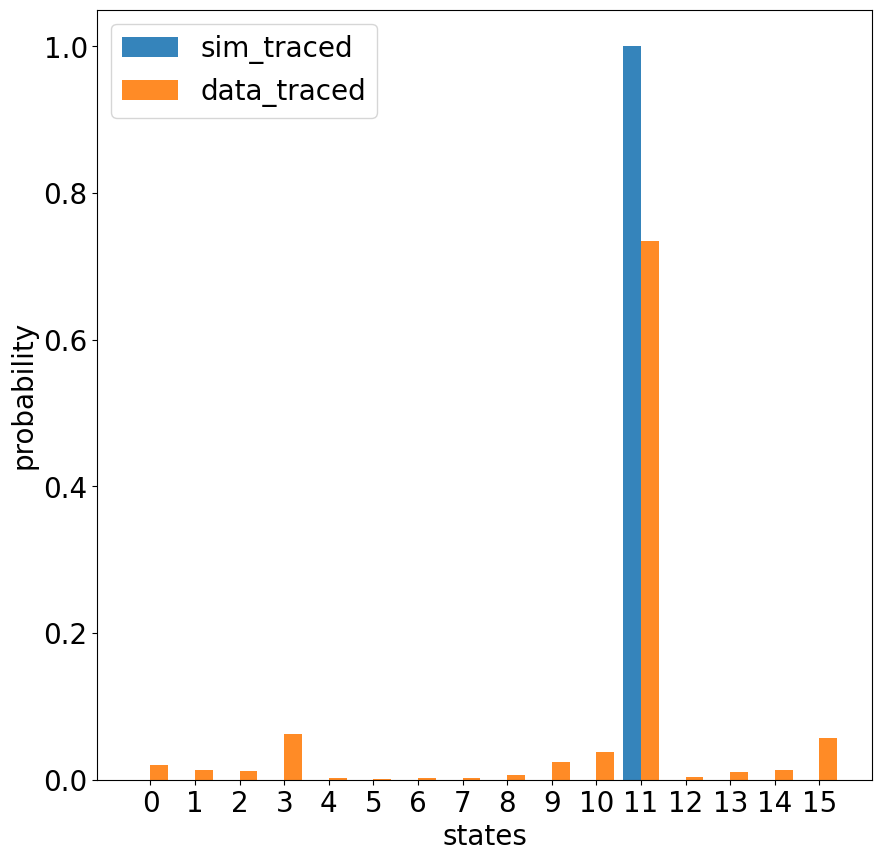

2024-02-23-160951_Line_002.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



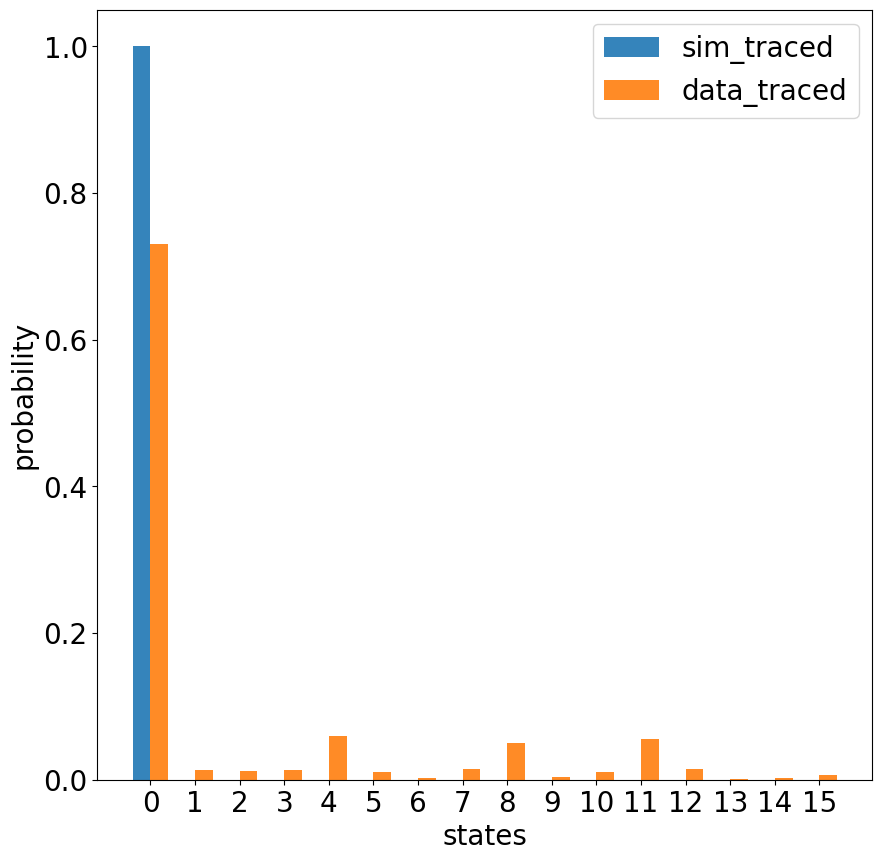

2024-02-23-161018_Line_003.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



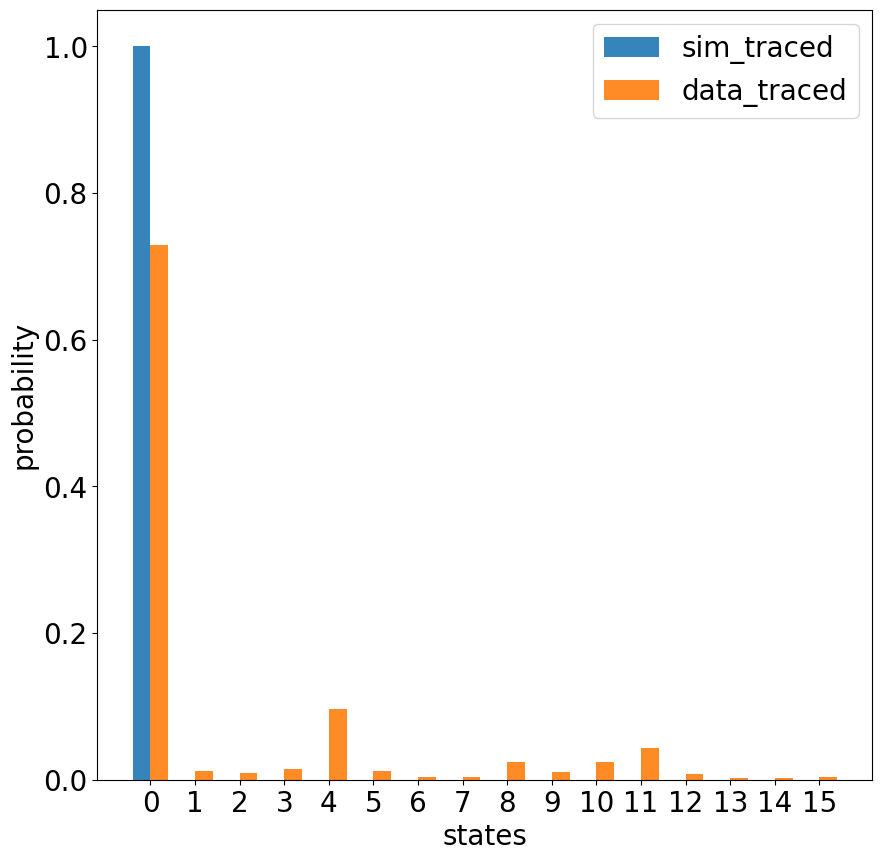

2024-02-23-161045_Line_004.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



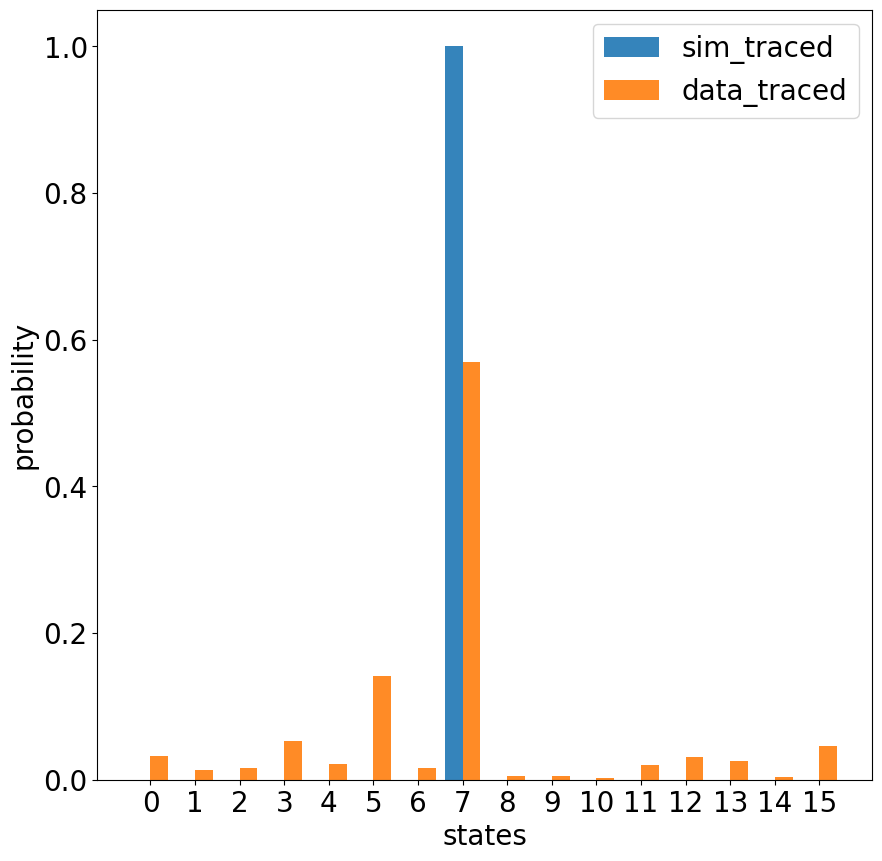

2024-02-23-161112_Line_005.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



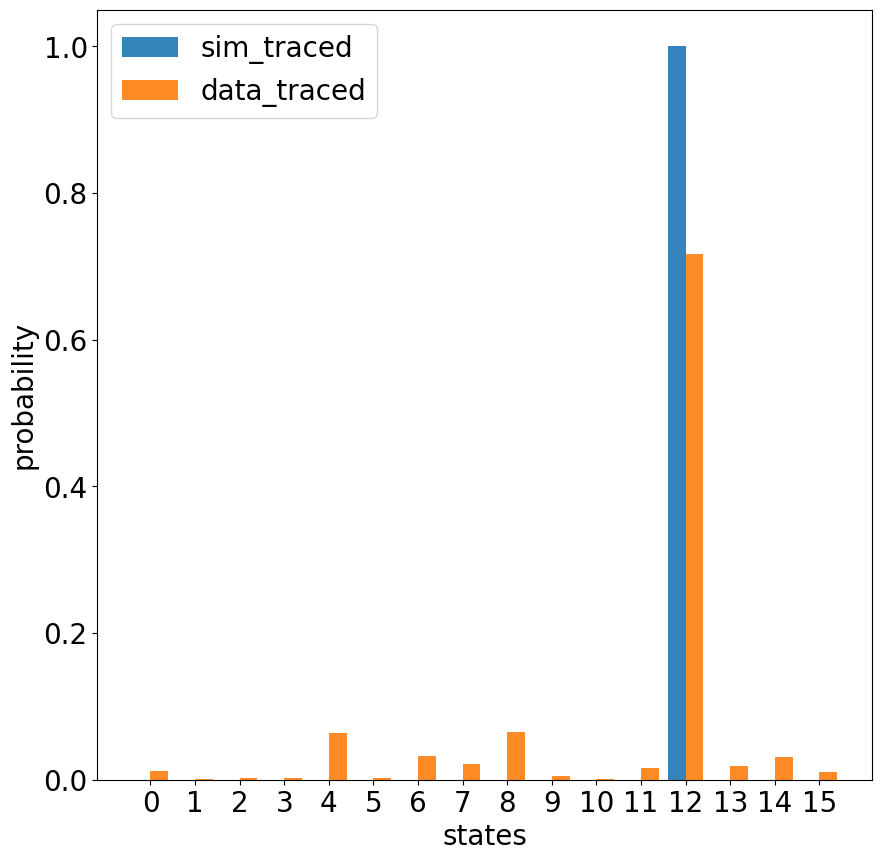

2024-02-23-161235_Line_006.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



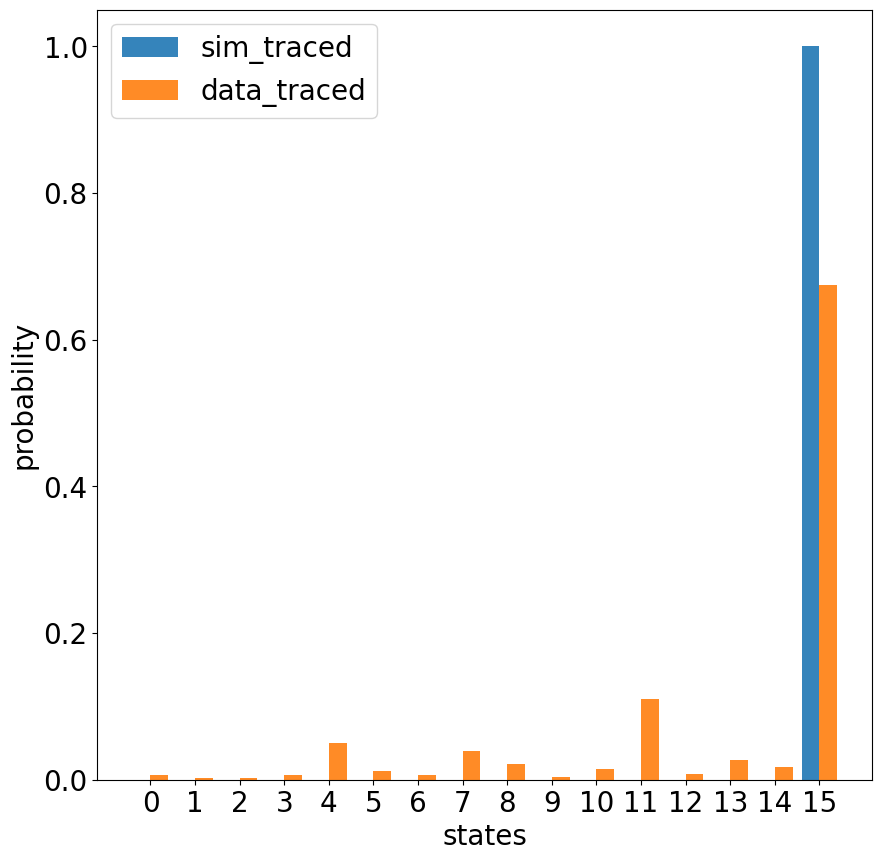

2024-02-23-162247_Line_007.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



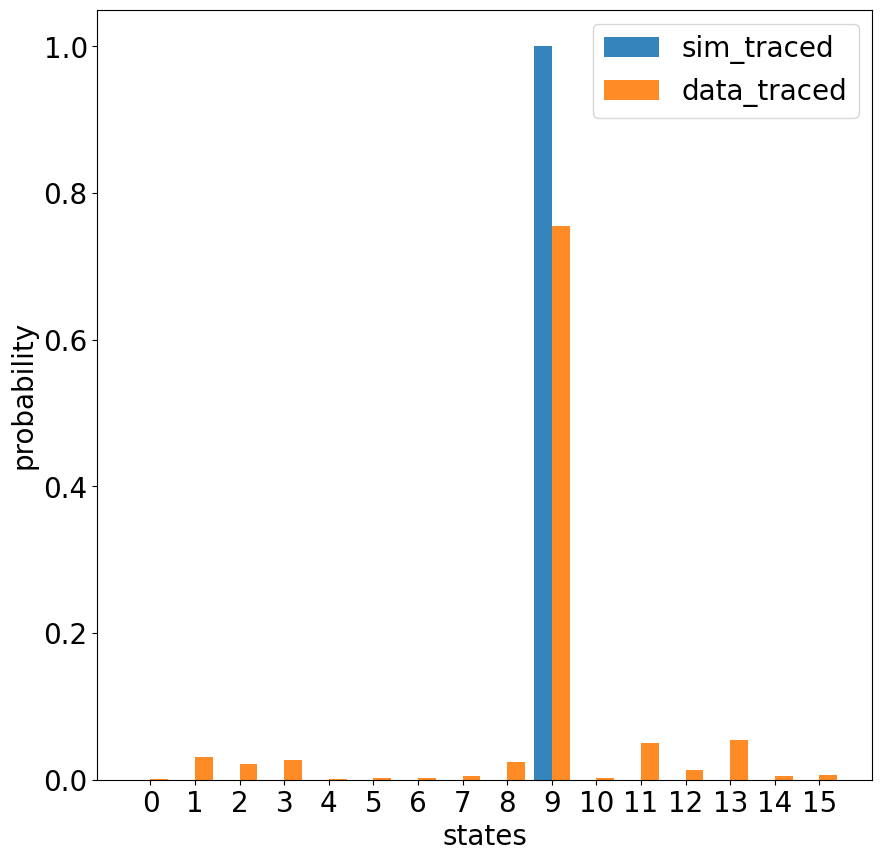

2024-02-23-162315_Line_008.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



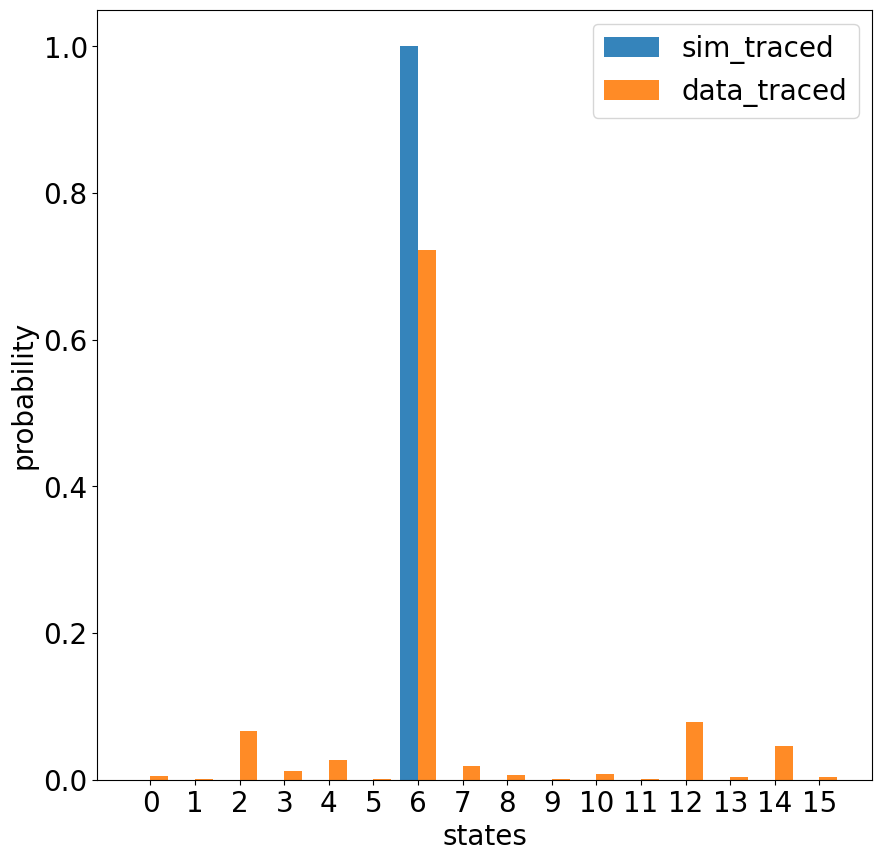

2024-02-23-162342_Line_009.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



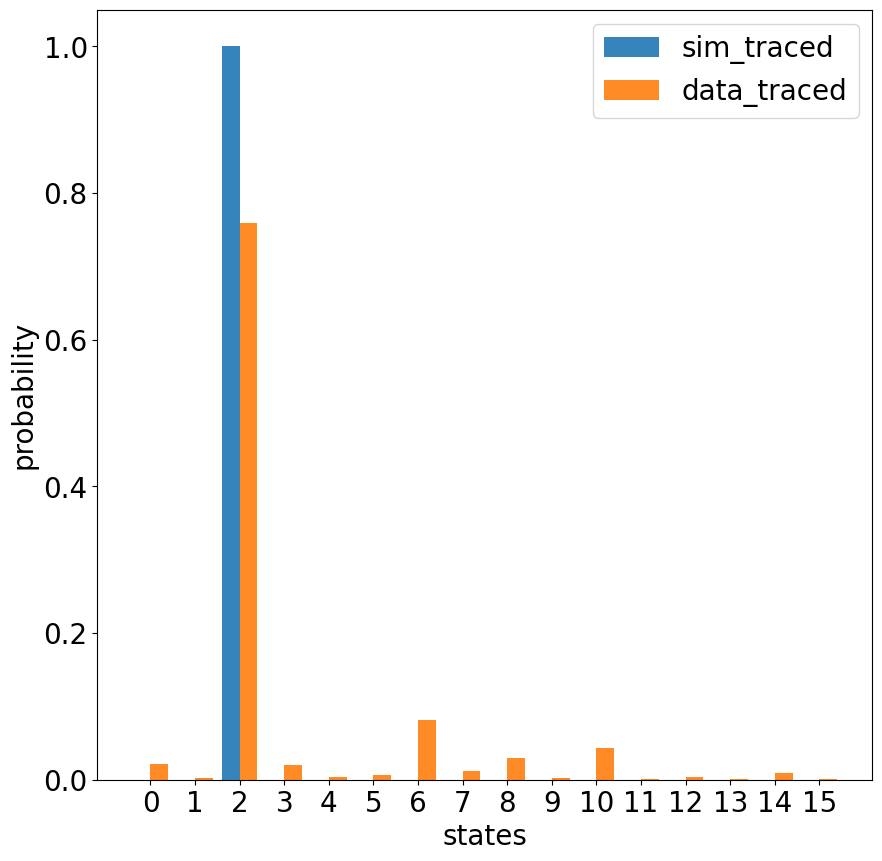

2024-02-23-162409_Line_010.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



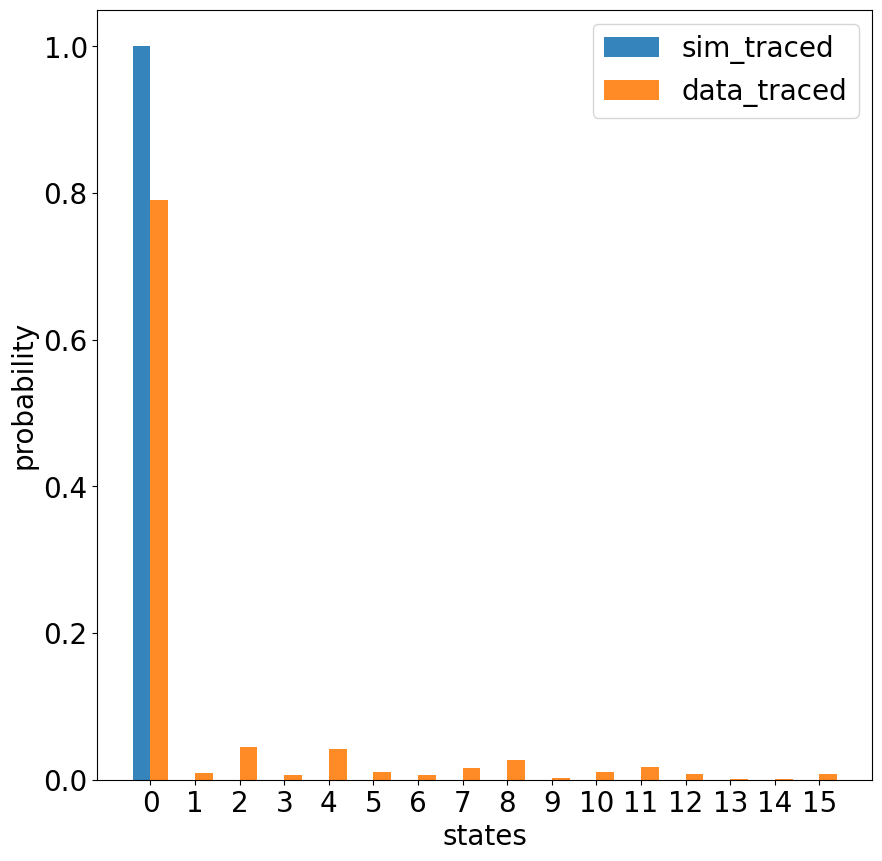

2024-02-23-205325_Line_011.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



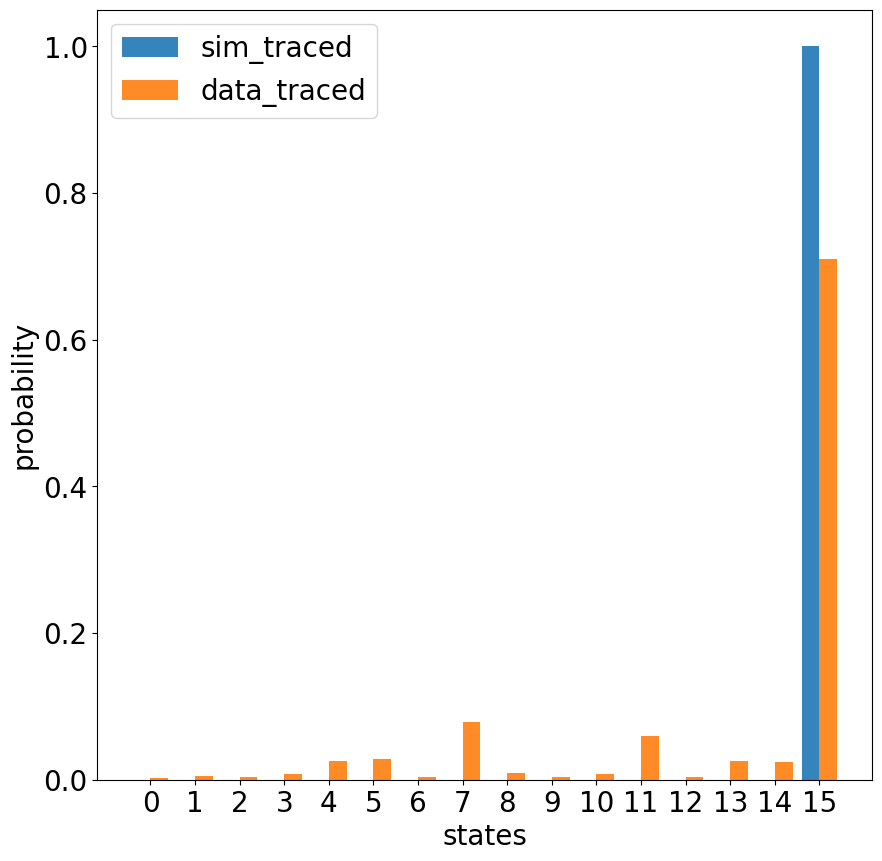

2024-02-23-205352_Line_012.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



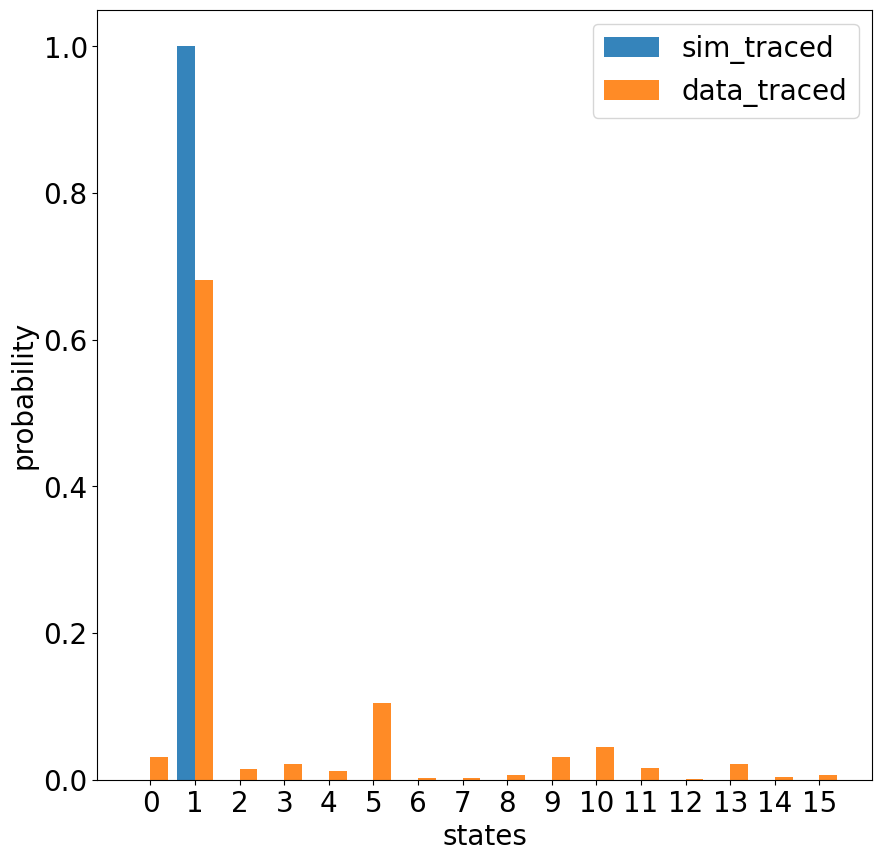

2024-02-23-205420_Line_013.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



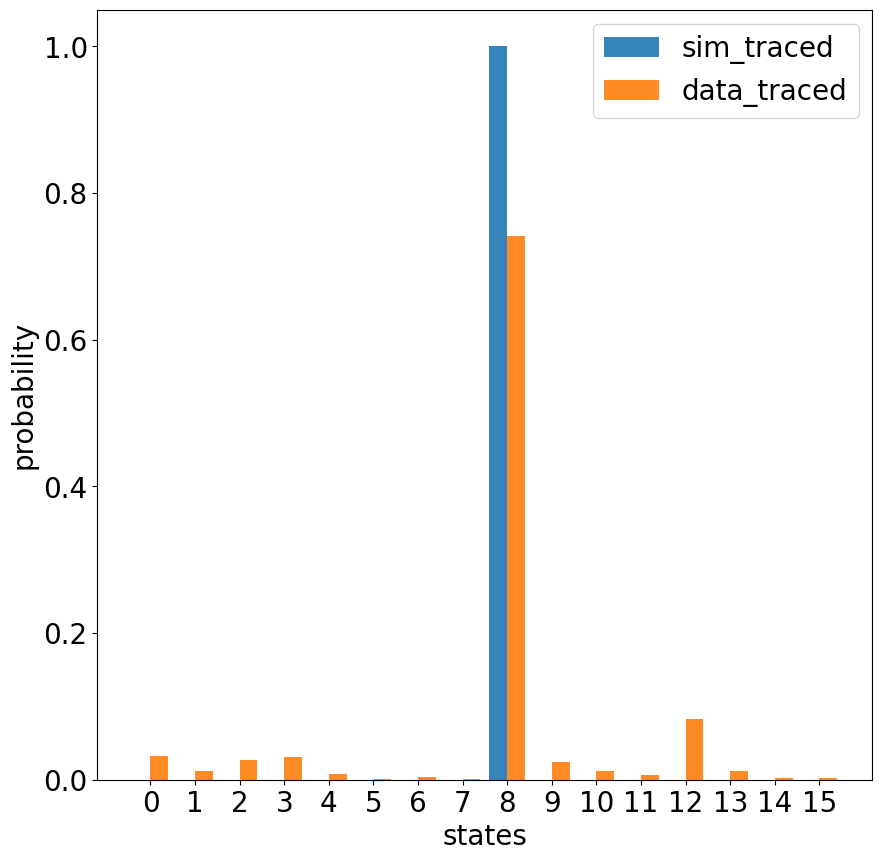

2024-02-23-205447_Line_014.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



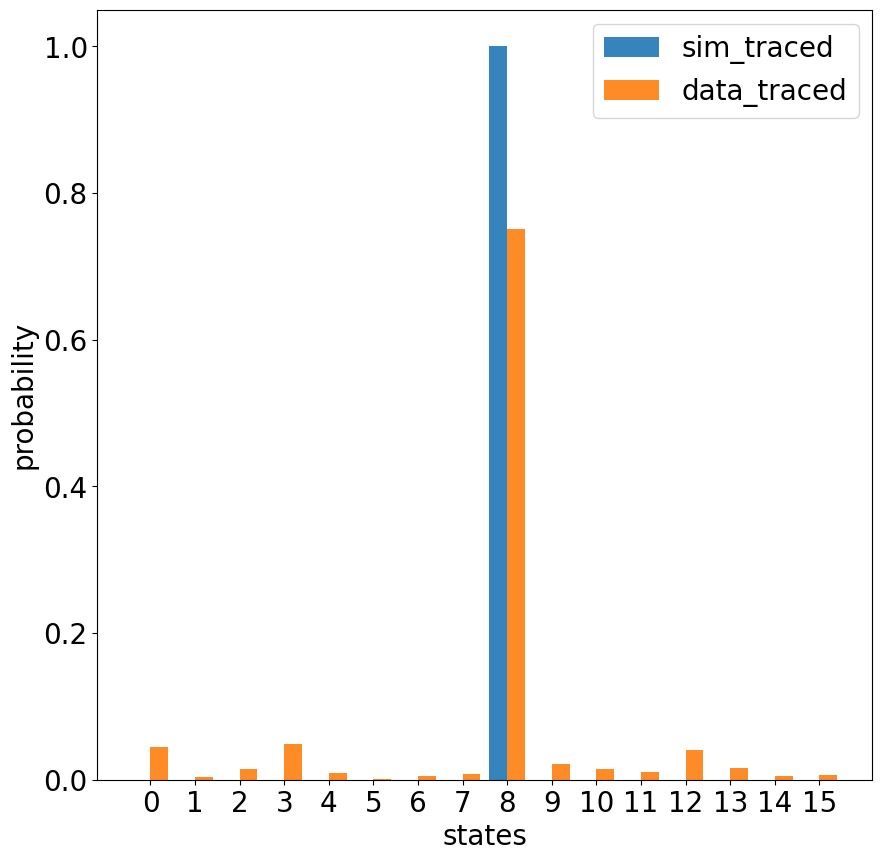

2024-02-23-205514_Line_015.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



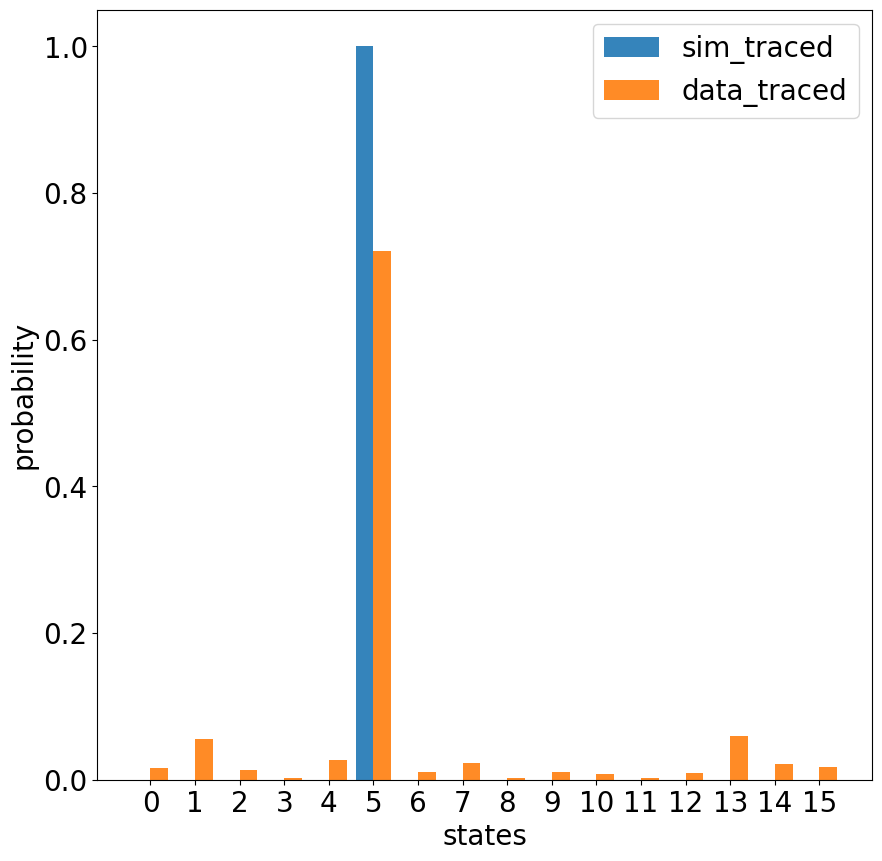

2024-02-23-204846_Line_016.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



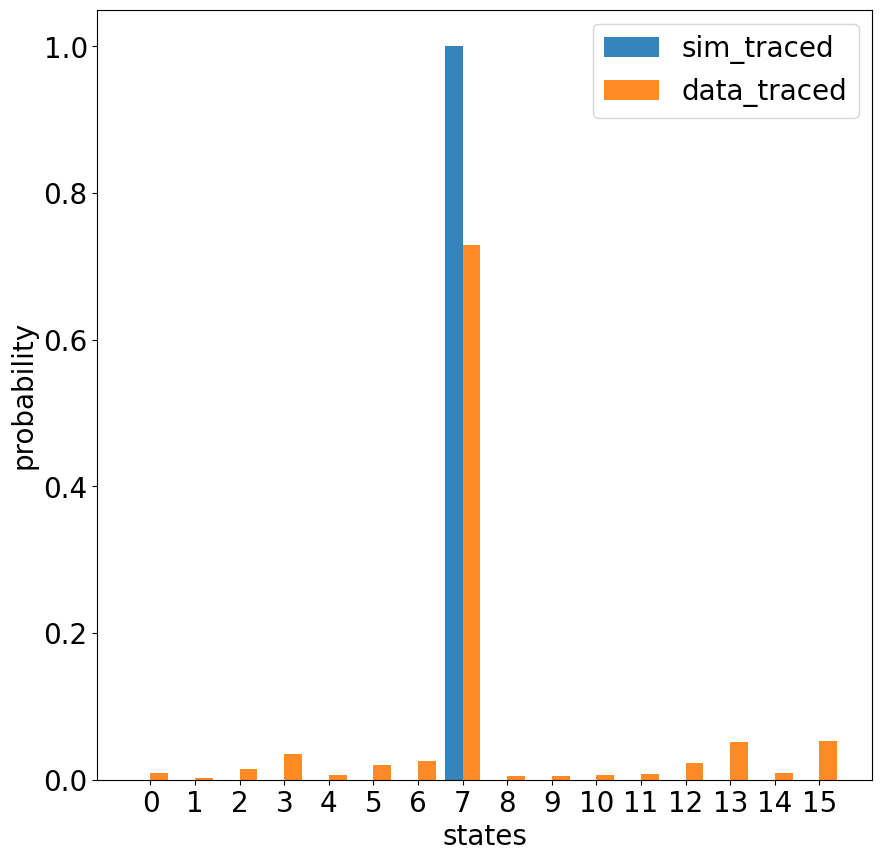

2024-02-23-204913_Line_017.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



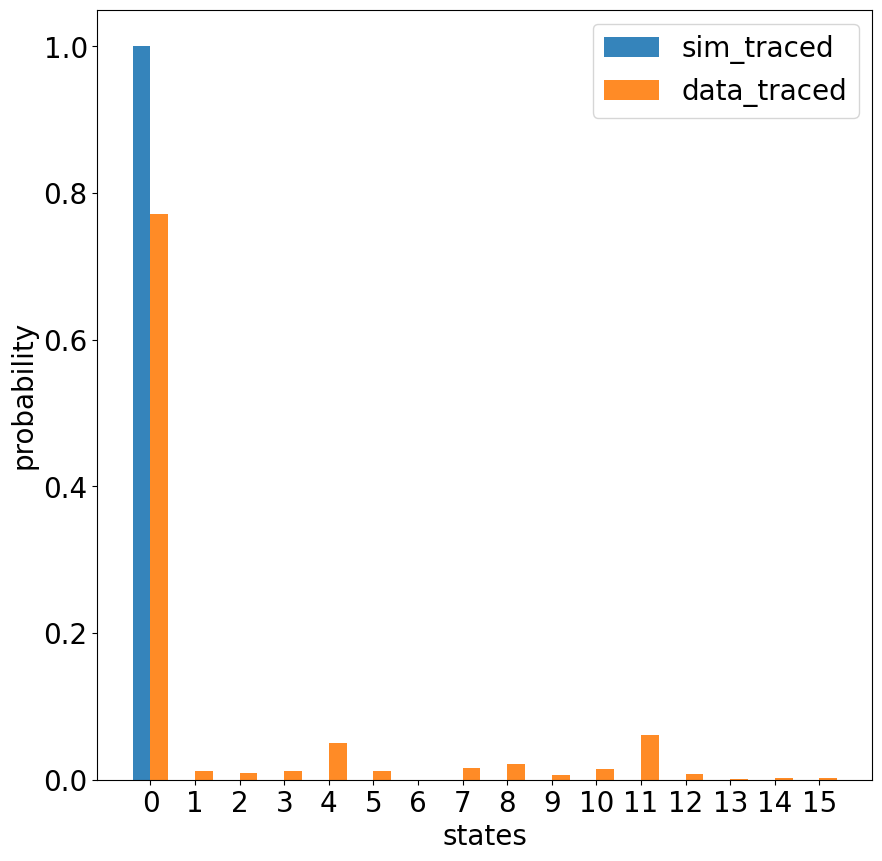

2024-02-23-204940_Line_018.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



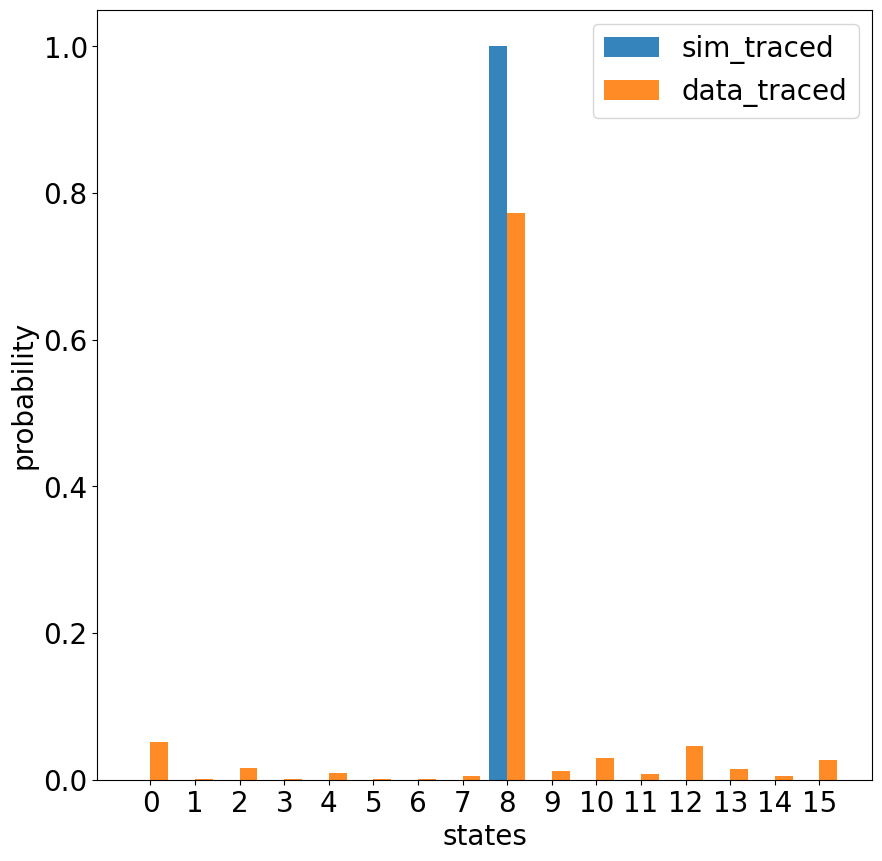

2024-02-23-205008_Line_019.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



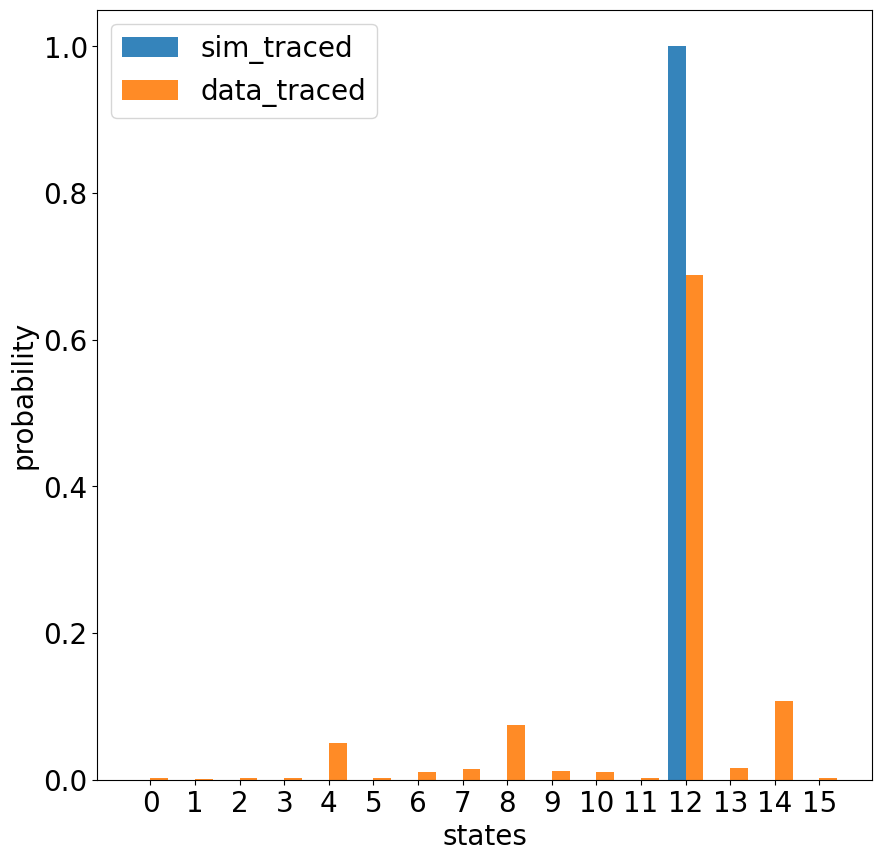

2024-02-23-205036_Line_020.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



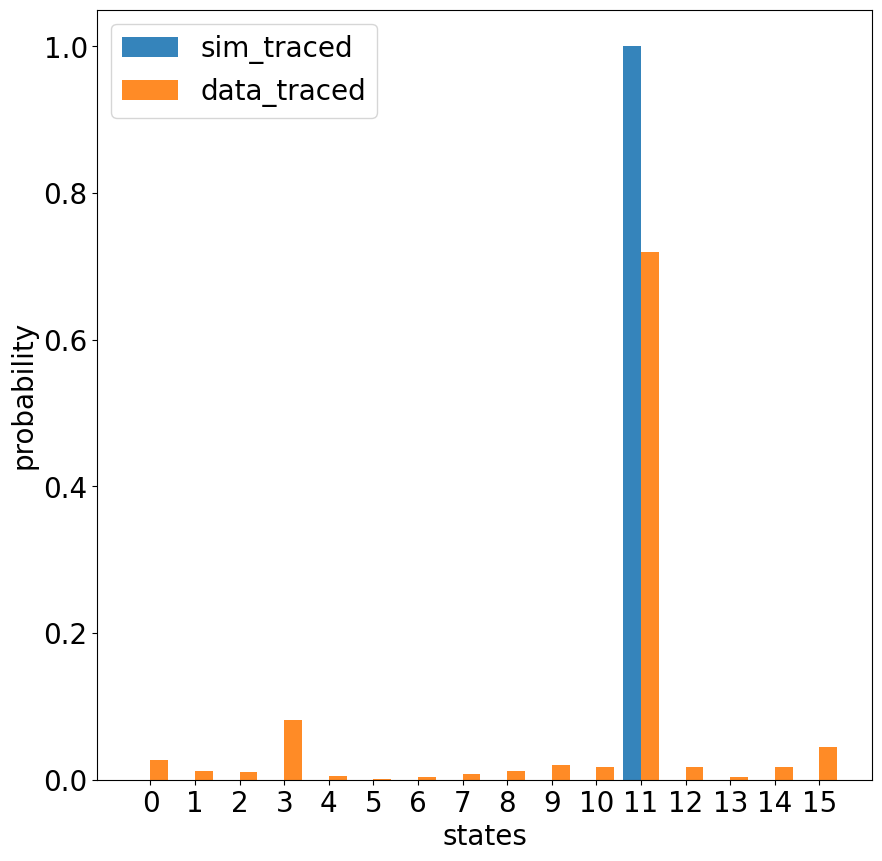

In [8]:
# filenames_data=[]
# counts_d4=[]
# counts_d4_spam=[]
# counts=[]
# counts_spam=[]
# filenames_data=filenames_d4.copy()
# print (filenames_data)
# # print (len(filenames_data))
# paf_data=paf_data_d4
# circuit=c_d4
# for i in range (len(filenames_data)):
#     print (filenames_data[i])
#     a.Import(paf_data+filenames_data[i],keep_file=True)
#     data_traced=Trace_Out(a,[0,1,2,3])
#     counts=[round(shots*x) for x in  data_traced.population]
#     counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
#     counts_d4.append(counts_ibm_mapping_dic)
    
    
# #     a_s=spam1.Correct_SPAM(a)
# #     data_traced_spam=Trace_Out(a_s,[0,1,2,3])
# #     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
# #     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
# #     counts_d4_spam.append(counts_ibm_mapping_dic_spam)
    
# #     a_0703.Import(paf_data_d4_0703+filenames_d4_0703[i],keep_file=True)
# #     data_0703_traced=Trace_Out(a_0703,[0,1,2,3])

#     b_c.Interpret_GatesLab_Sequence(circuit[i])
#     print (circuit[i])
#     b=b_c.Simulate()
#     sim_traced=Trace_Out(b,[0,1,2,3])
# #     Display_States_Population(states=[b,a,a_s],label=["simulation","d=4","spam"])
#     Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])
# # #         

2024-03-01-190941_Line_001.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



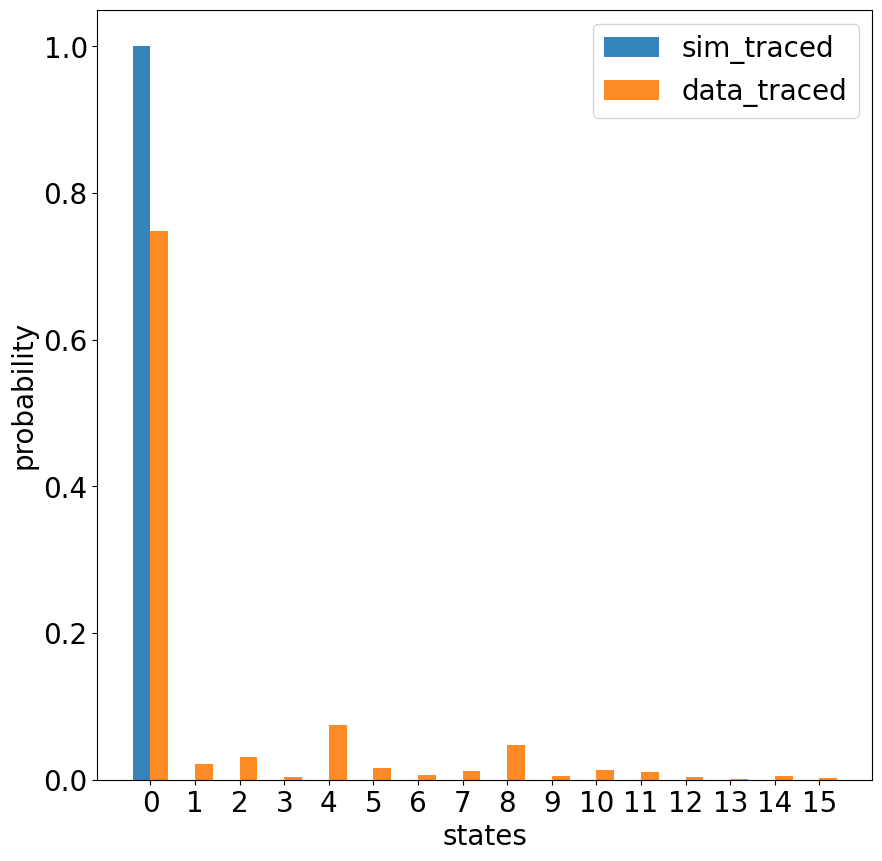

2024-03-01-191021_Line_002.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



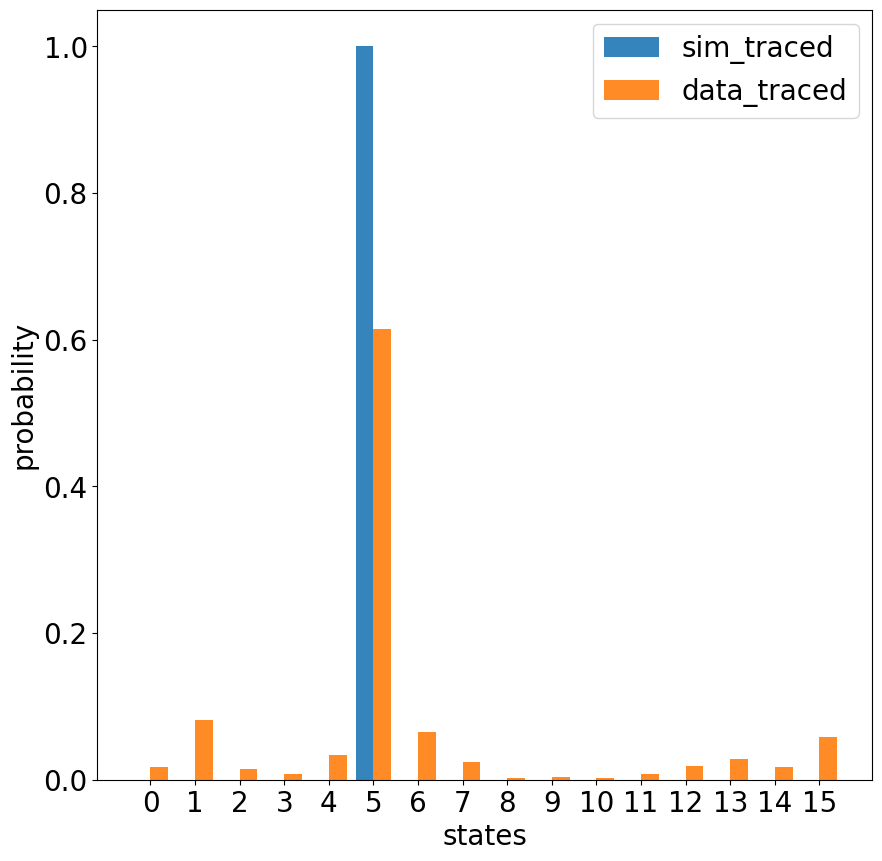

2024-03-01-191101_Line_003.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



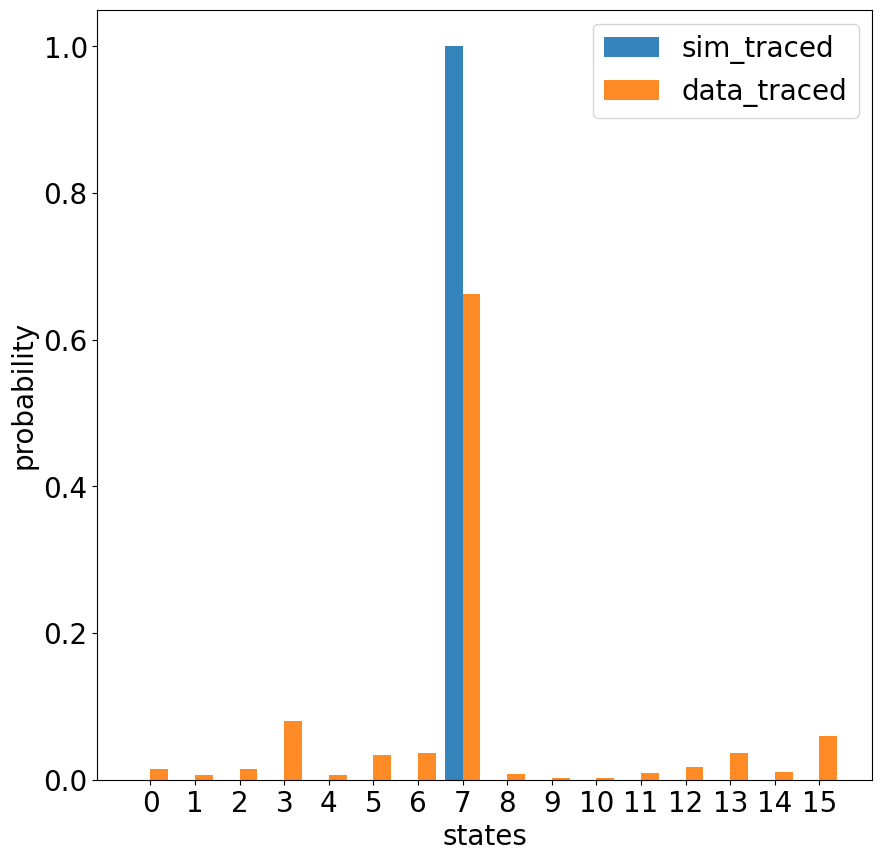

2024-03-01-191141_Line_004.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



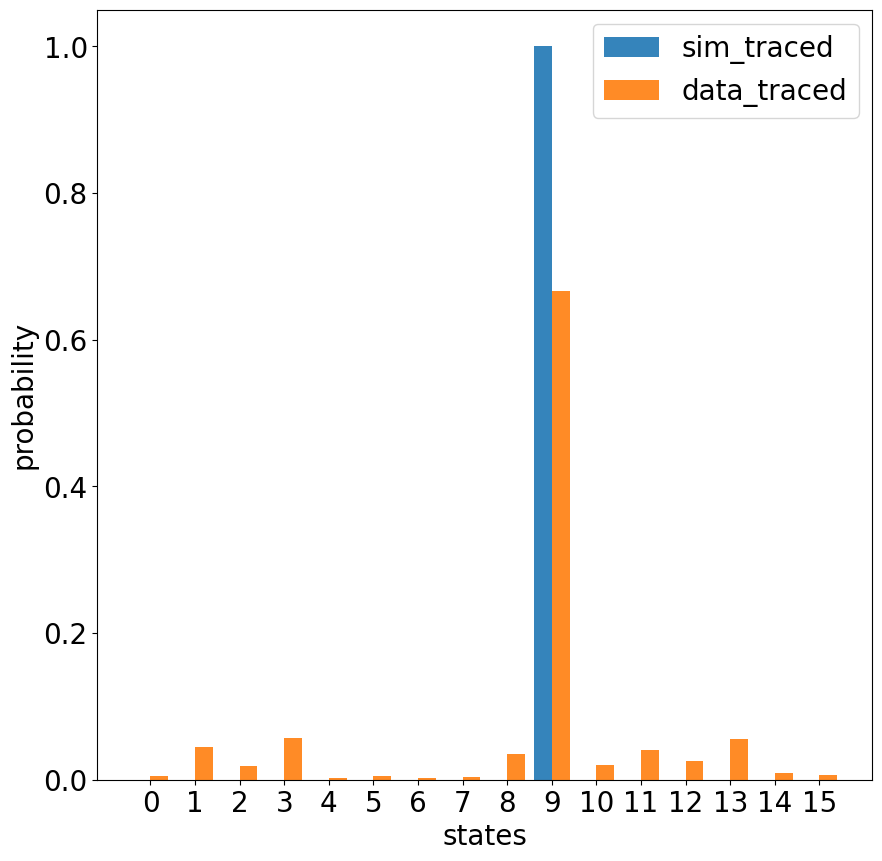

2024-03-01-191221_Line_005.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



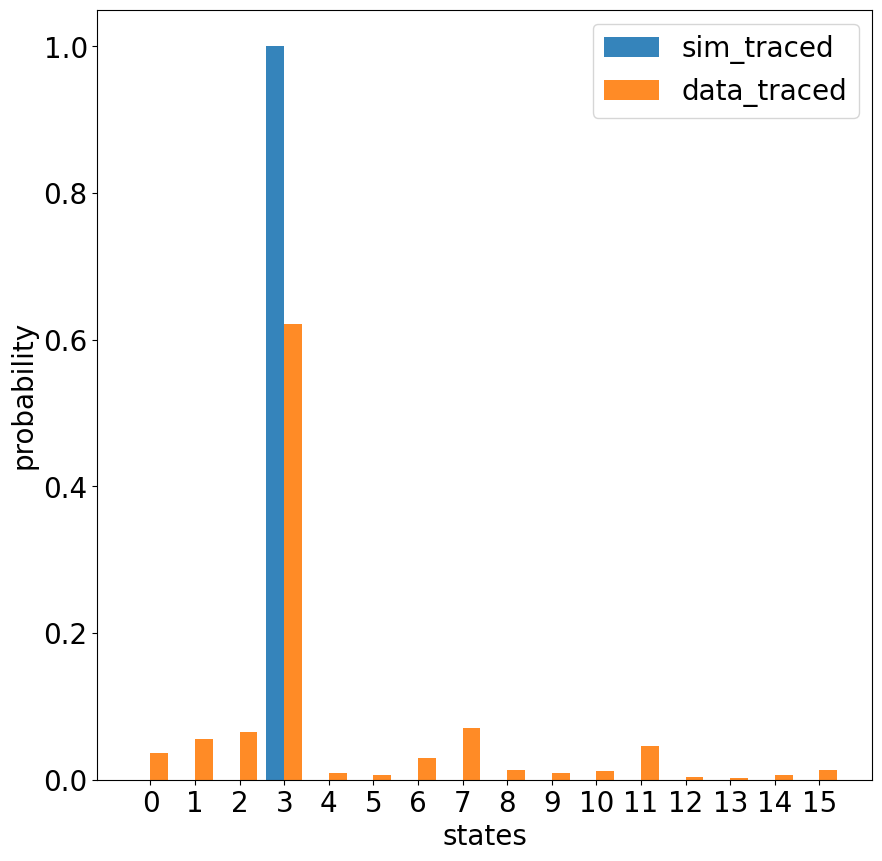

2024-03-01-191302_Line_006.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



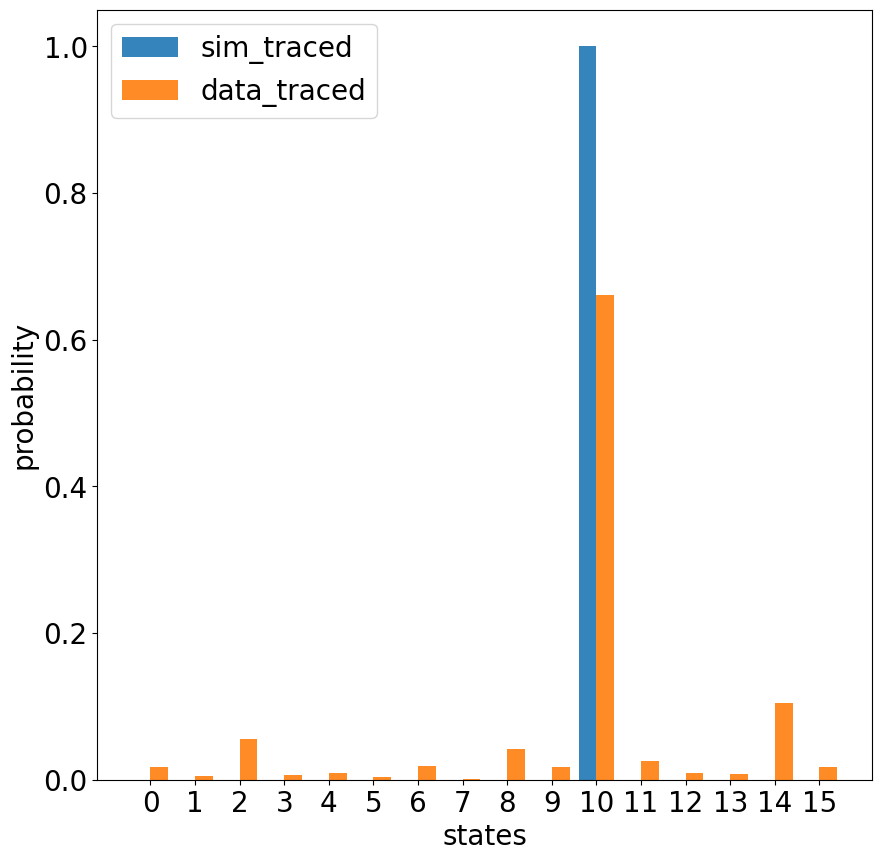

2024-03-01-191439_Line_007.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



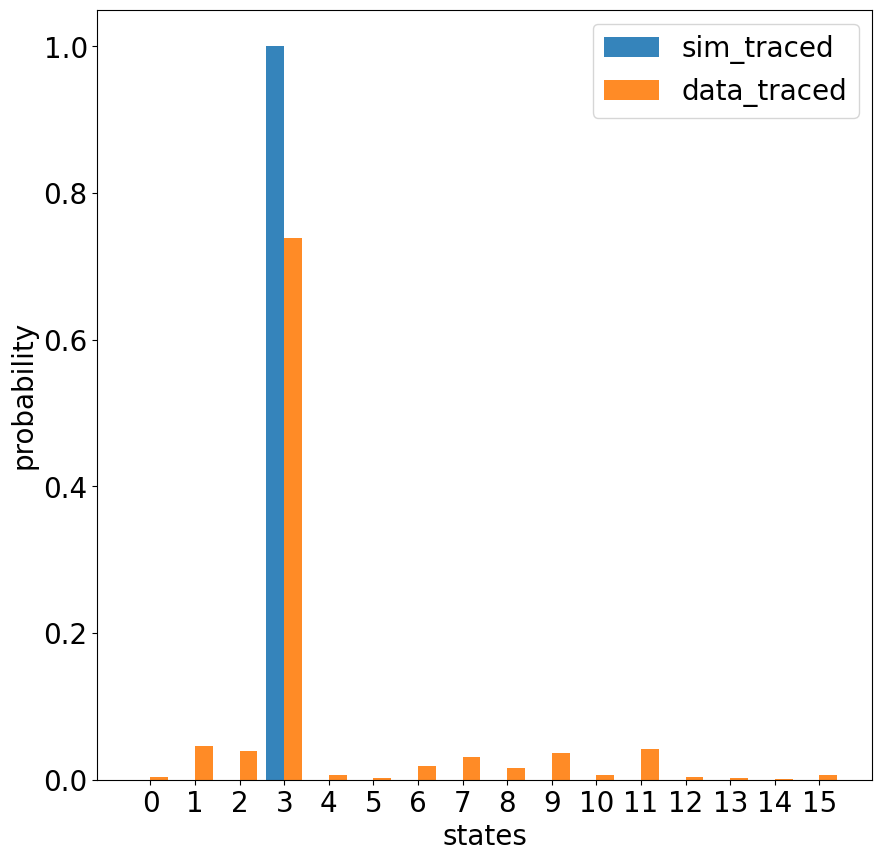

2024-03-01-191520_Line_008.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+51:FTXA450.2500+:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



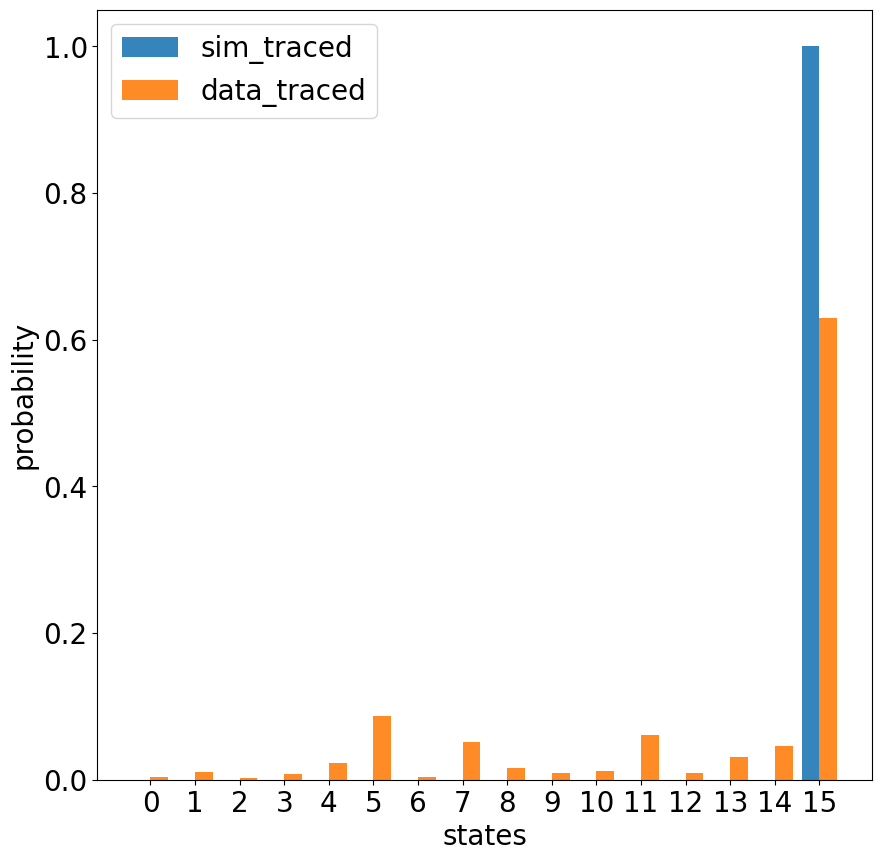

2024-03-01-191601_Line_009.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



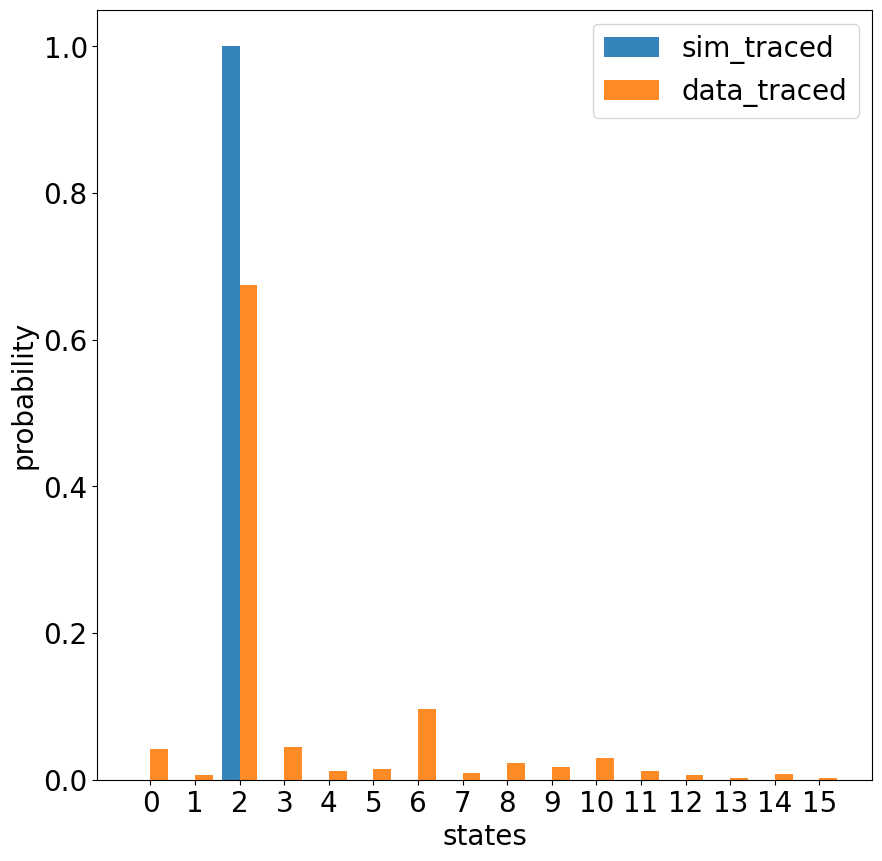

2024-03-01-191640_Line_010.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



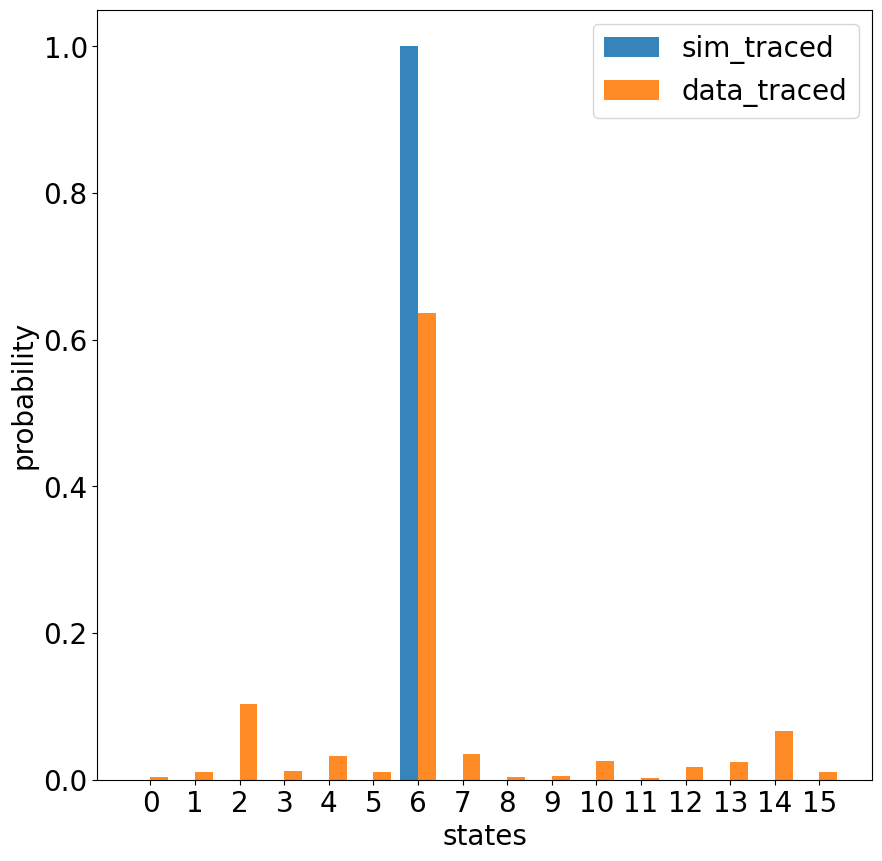

2024-03-01-200355_Line_011.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



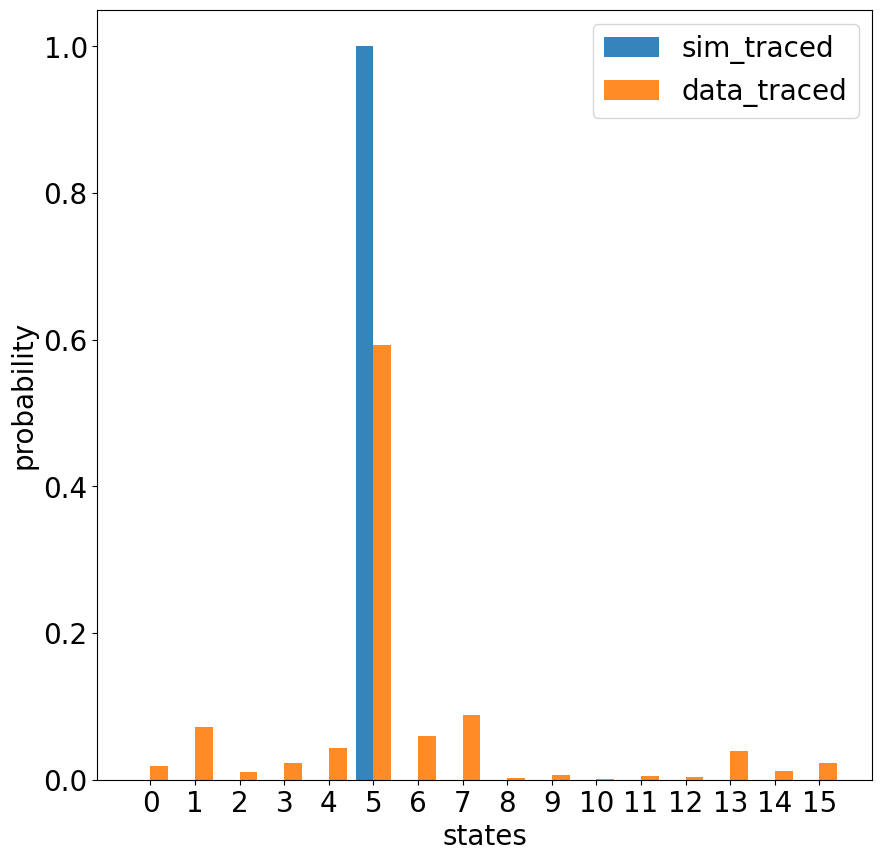

2024-03-01-200434_Line_012.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



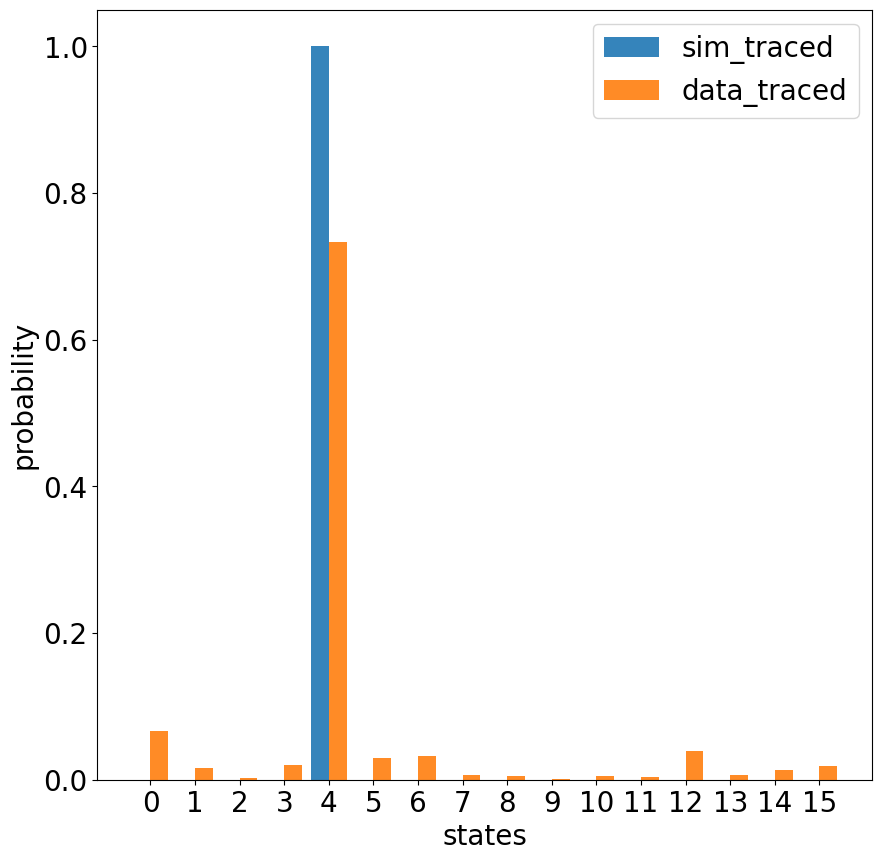

2024-03-01-200515_Line_013.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



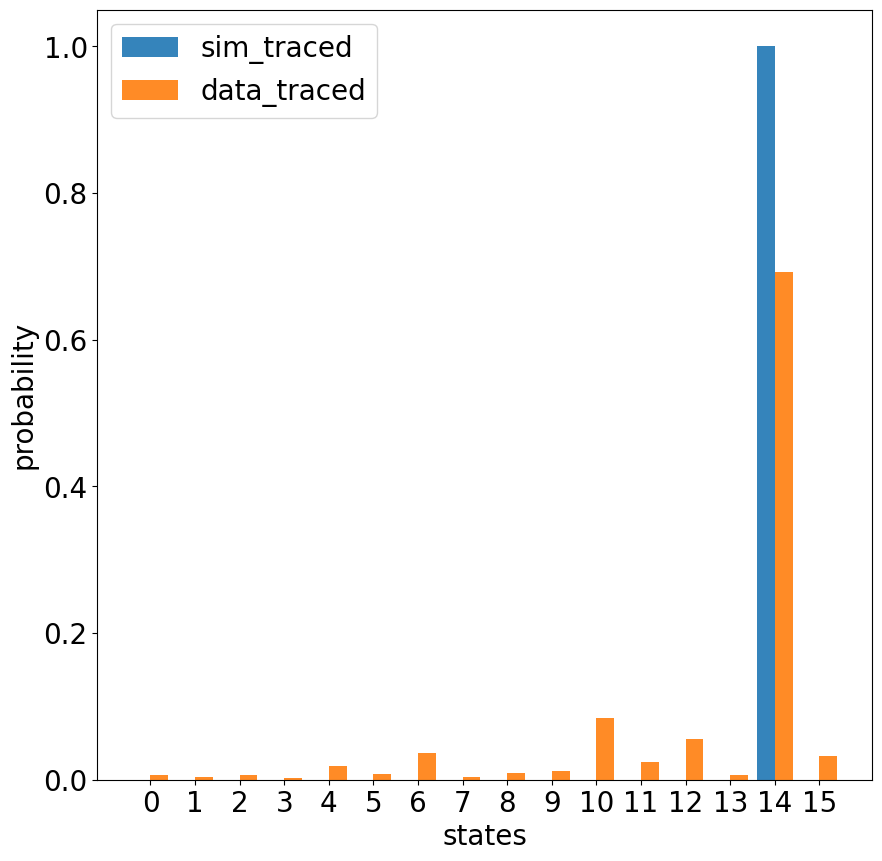

2024-03-01-200556_Line_014.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RX+41:FTXA450.2500+:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



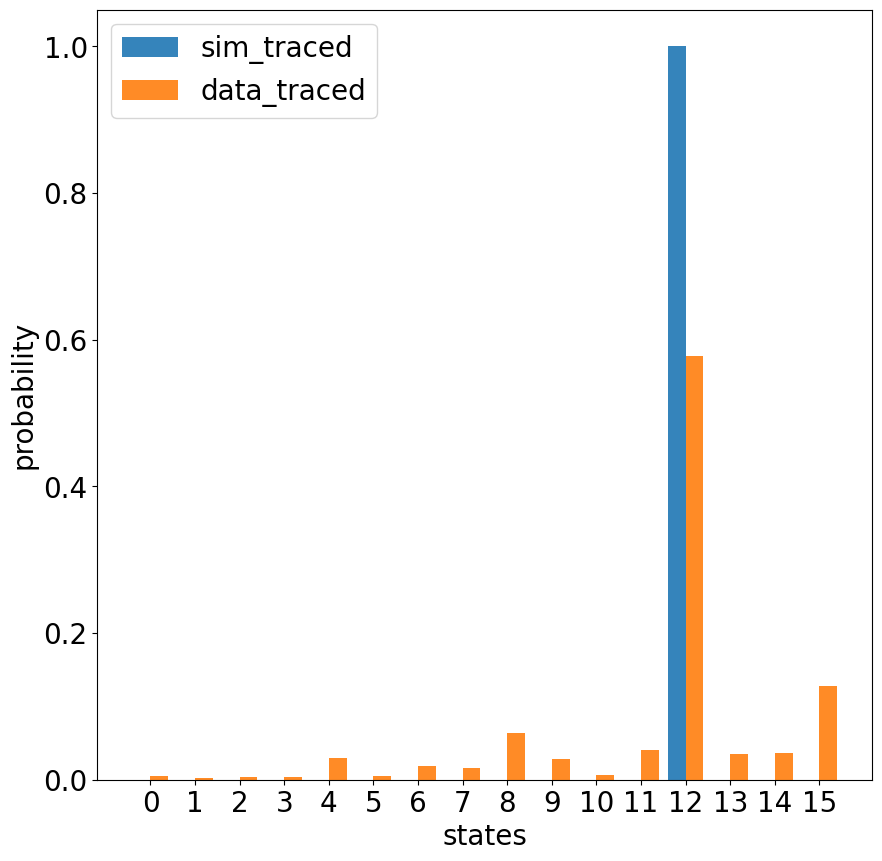

In [9]:
filenames_data=[]
counts_d8=[]
counts_d8_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d8.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d8
circuit=c_d8
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d8.append(counts_ibm_mapping_dic)
    
#     a_s=spam1.Correct_SPAM(a)
#     data_traced_spam=Trace_Out(a_s,[0,1,2,3])
#     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
#     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
#     counts_d8_spam.append(counts_ibm_mapping_dic_spam)
    
#     a_0703.Import(paf_data_d8_0703+filenames_d8_0703[i],keep_file=True)
#     data_0703_traced=Trace_Out(a_0703,[0,1,2,3])
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
#     Display_States_Population(states=[b,a,a_s],label=["simulation","d=8","spam"])
    Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-02-23-164859_Line_001.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



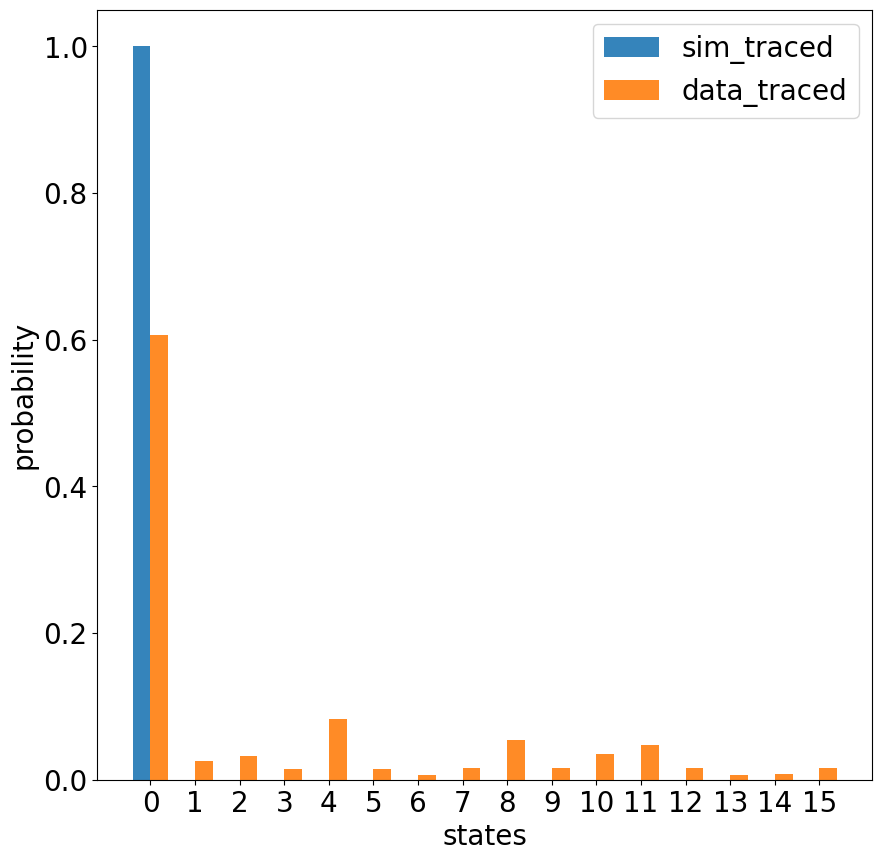

2024-02-23-164954_Line_002.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



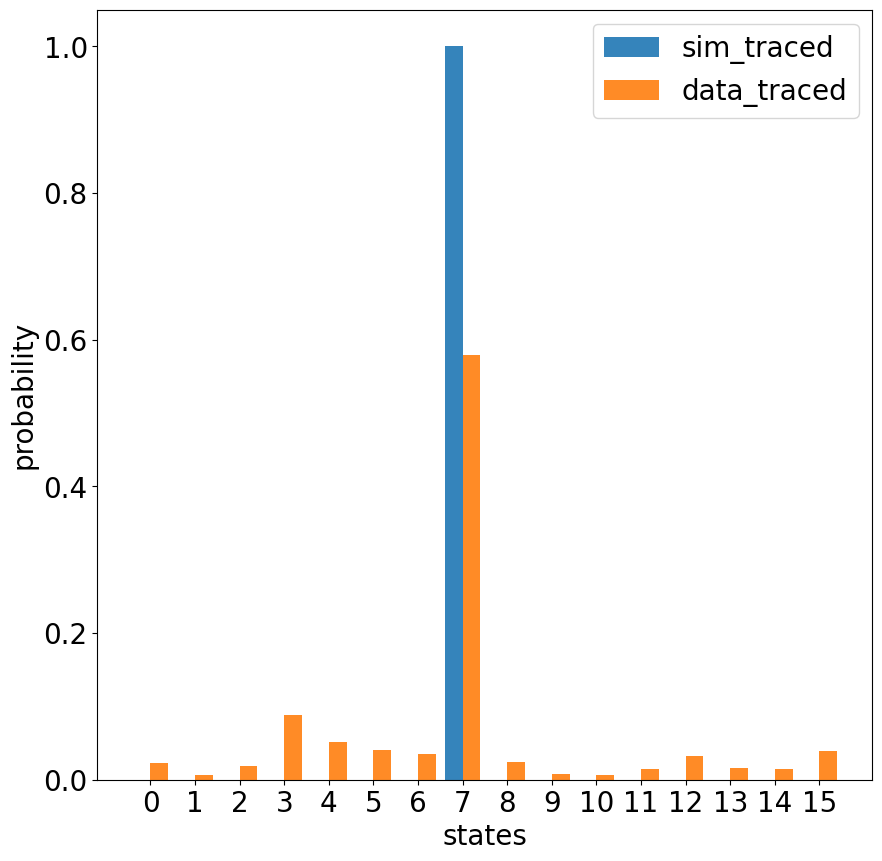

2024-02-23-165047_Line_003.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



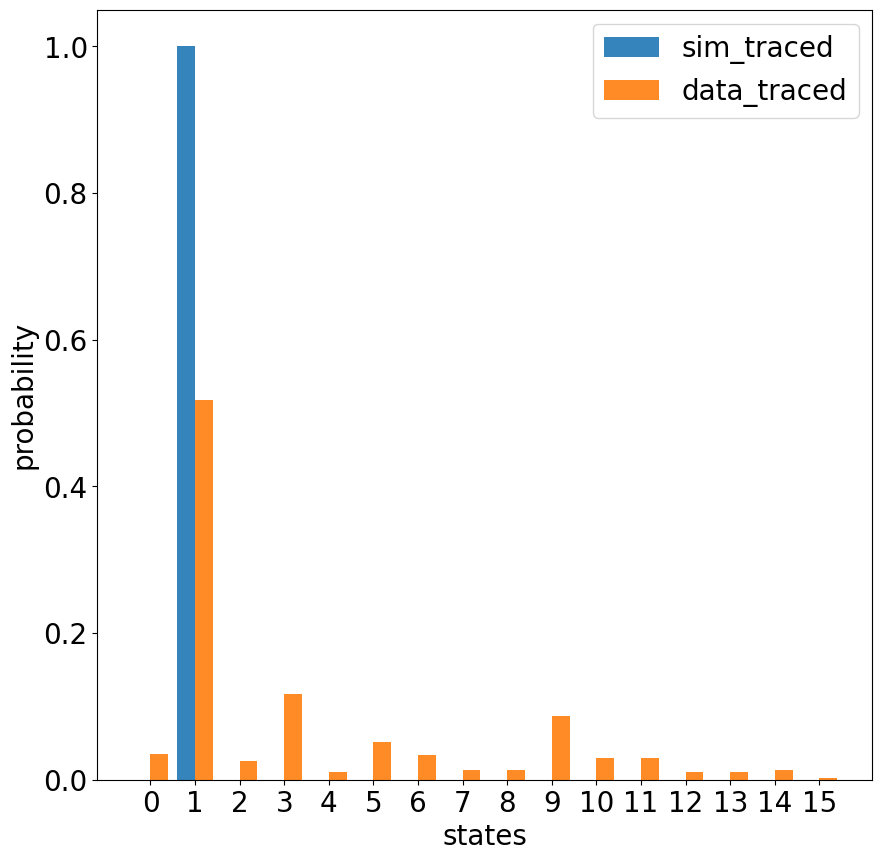

2024-02-23-165141_Line_004.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



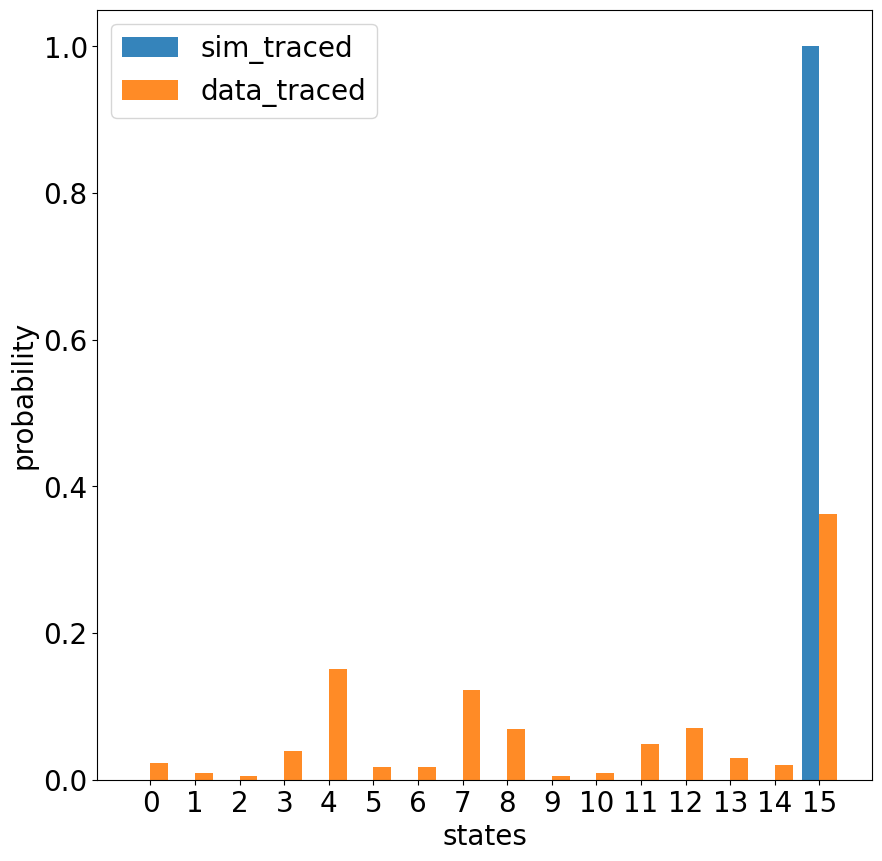

2024-02-23-165236_Line_005.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



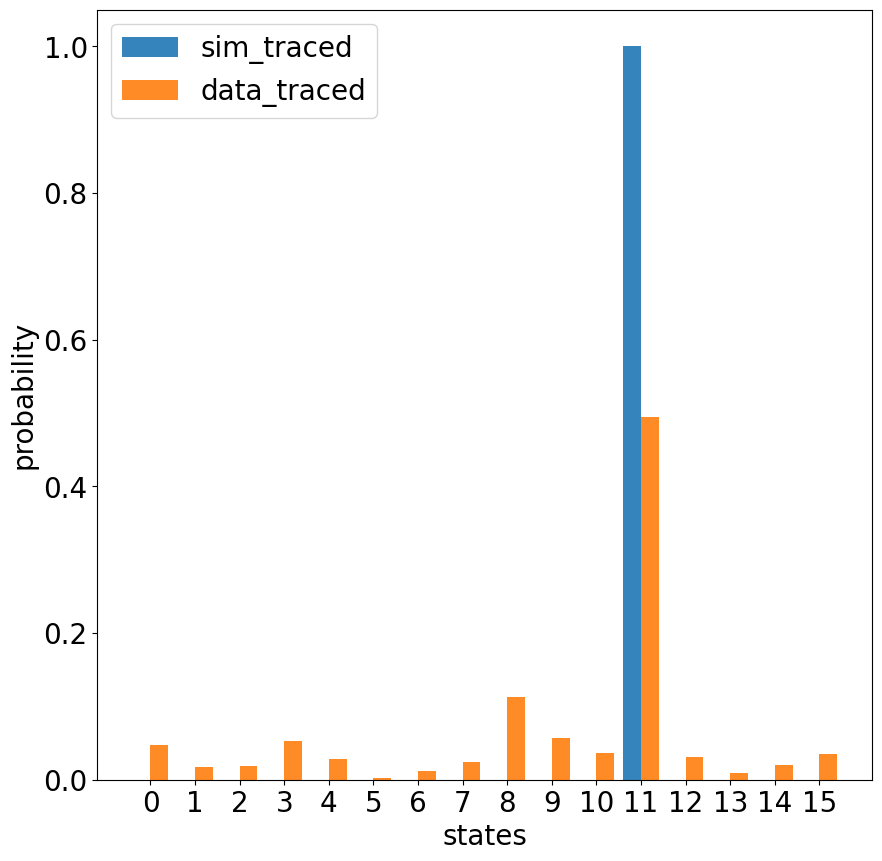

2024-02-23-165425_Line_006.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



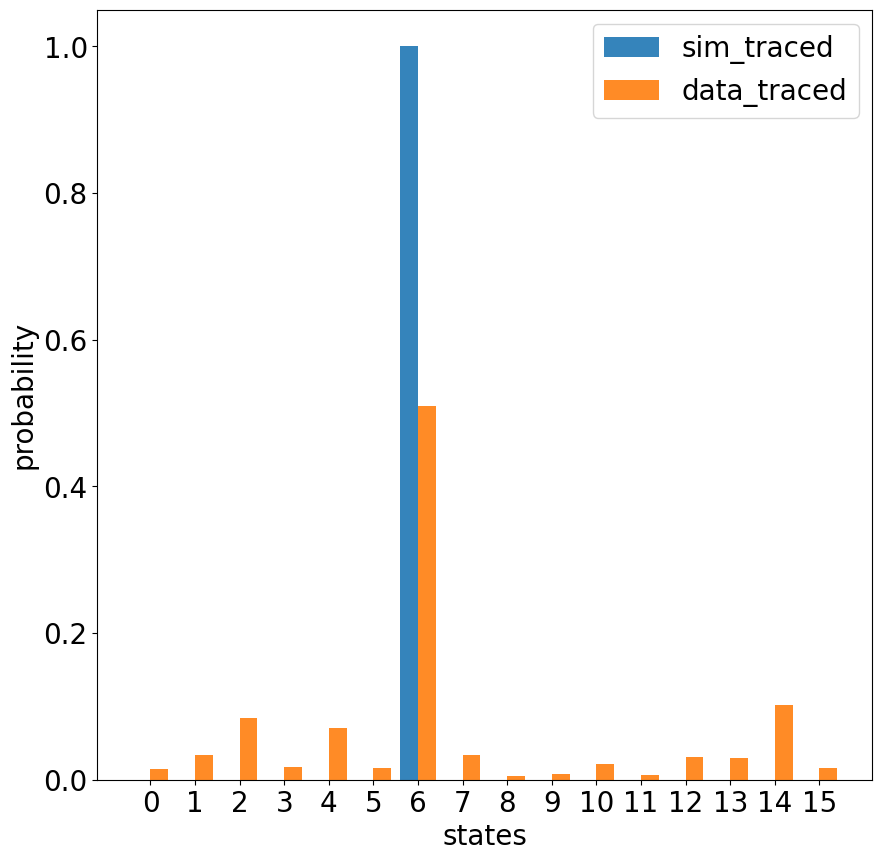

2024-02-23-165521_Line_007.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



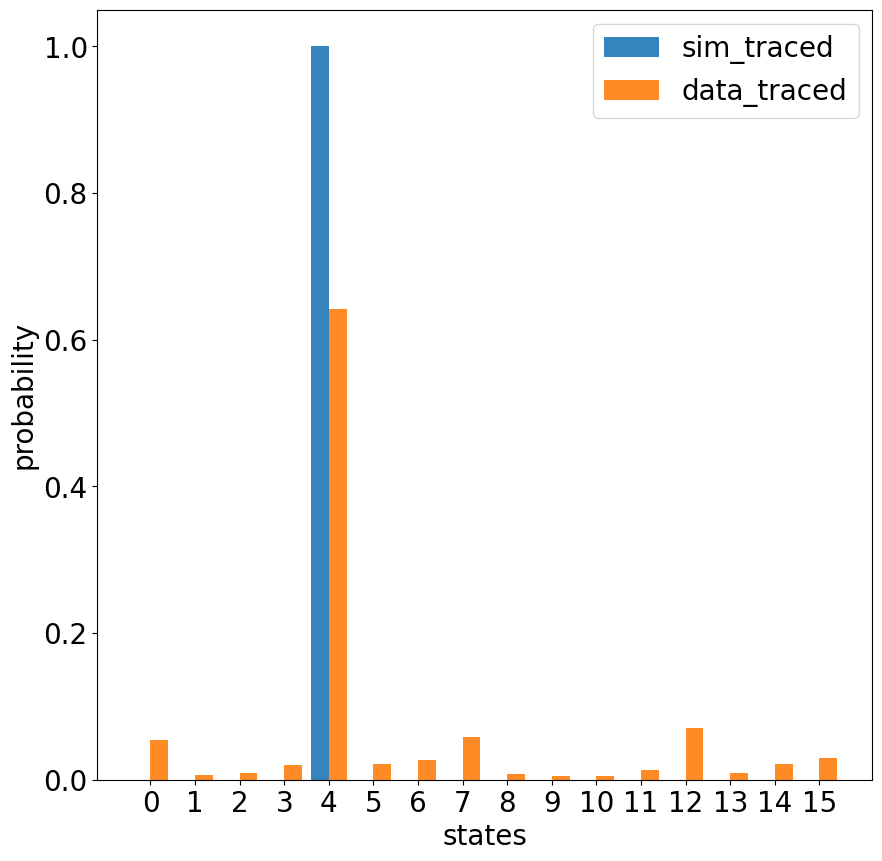

2024-02-23-165616_Line_008.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:RY+41:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



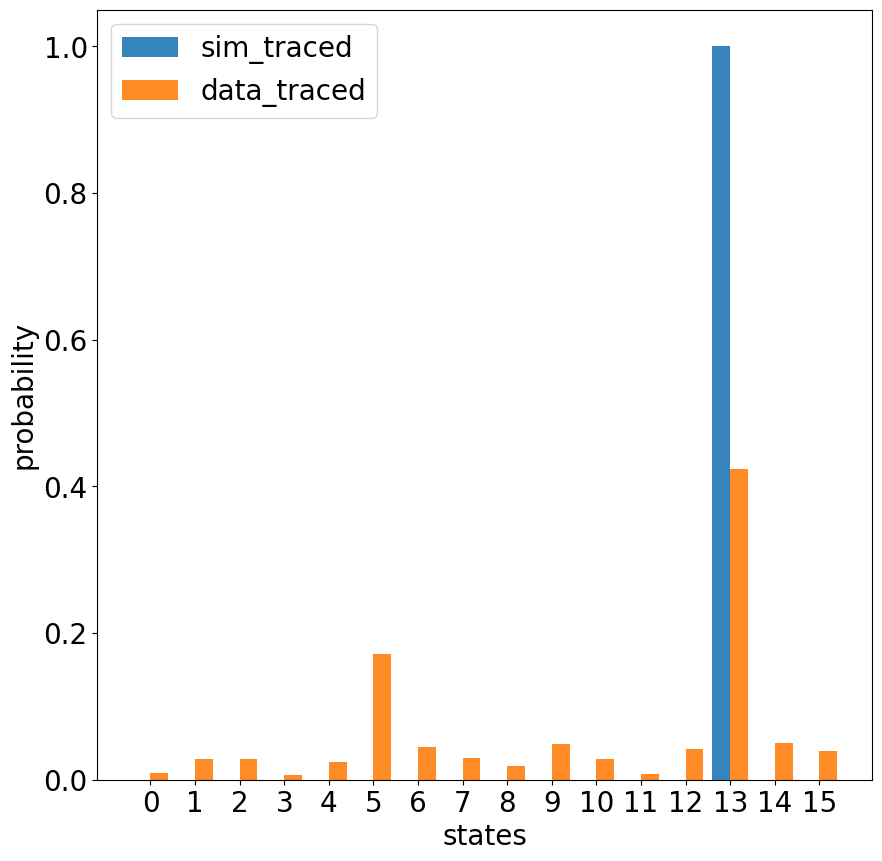

2024-02-23-165710_Line_009.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



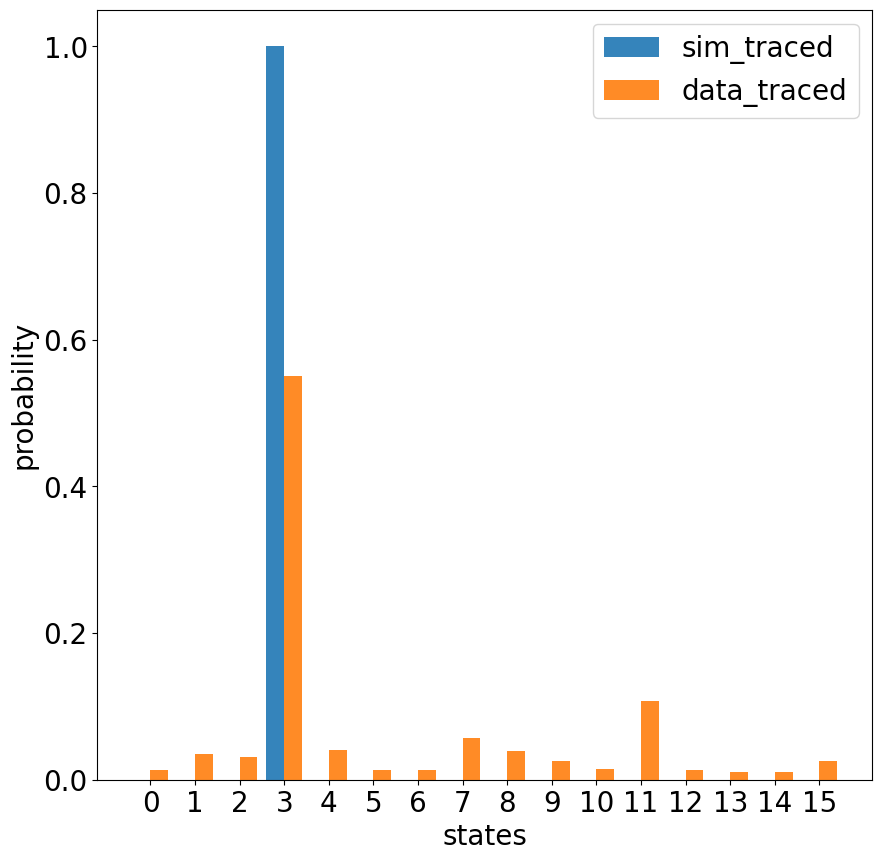

2024-02-23-165803_Line_010.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



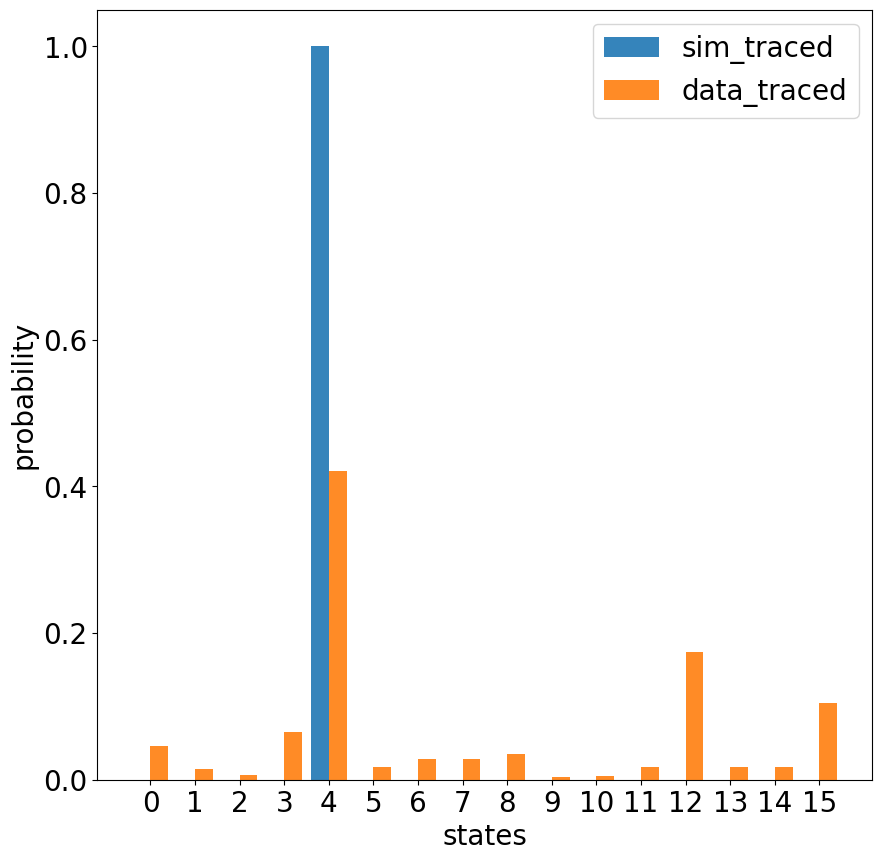

2024-02-23-193714_Line_011.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



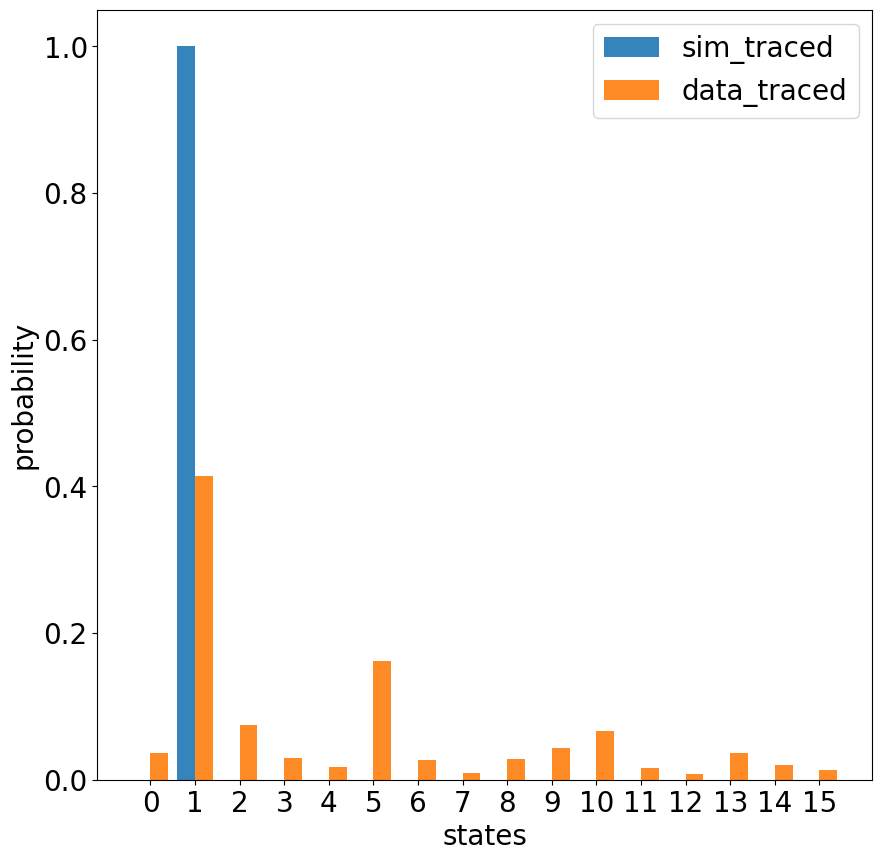

2024-02-23-193808_Line_012.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



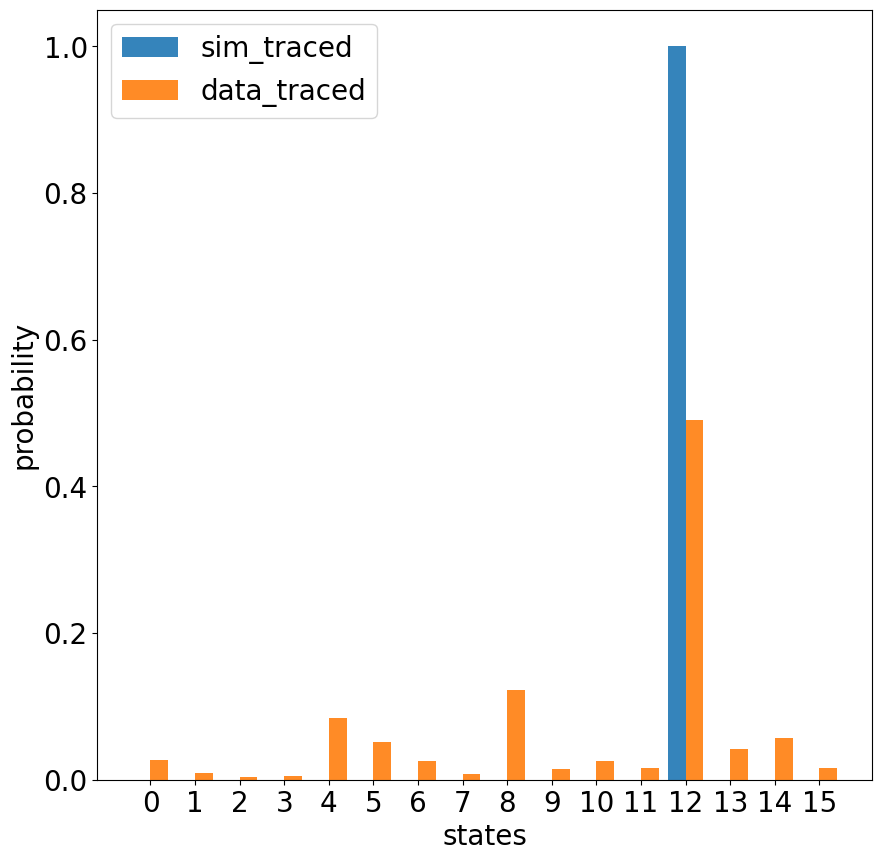

2024-02-23-193904_Line_013.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



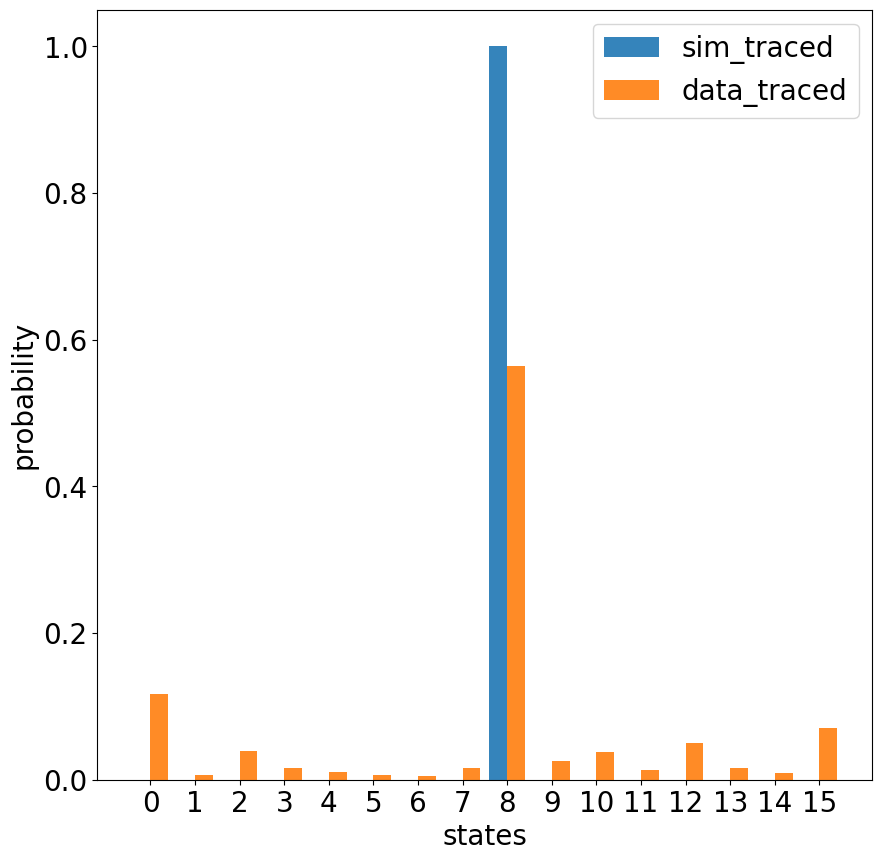

2024-02-23-193957_Line_014.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



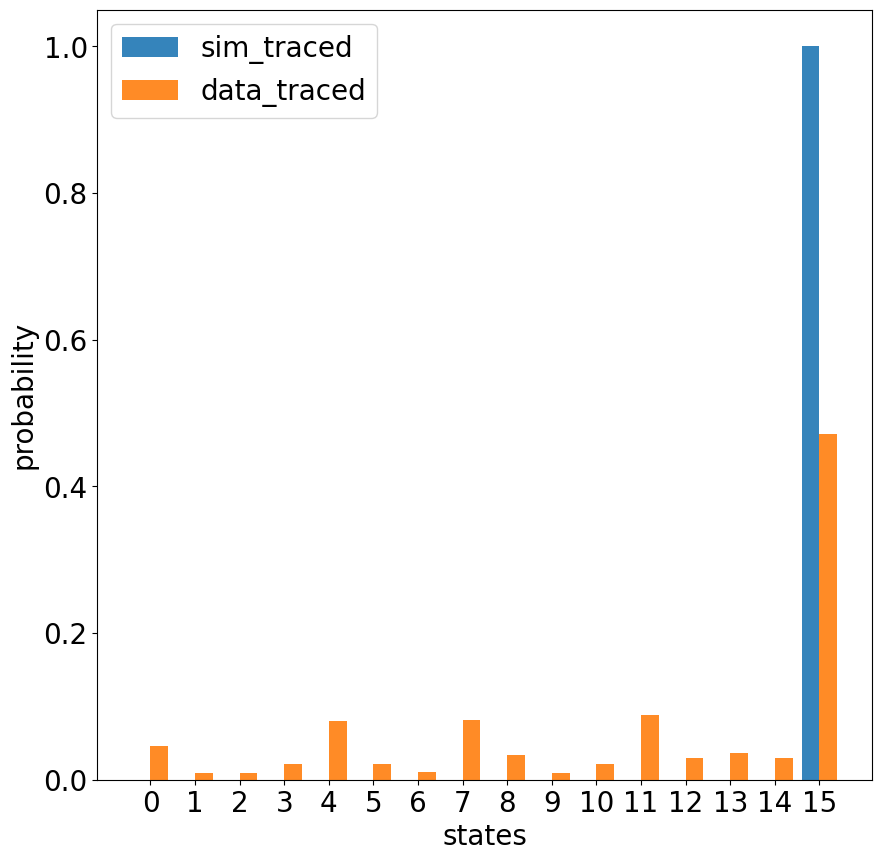

2024-02-23-194051_Line_015.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



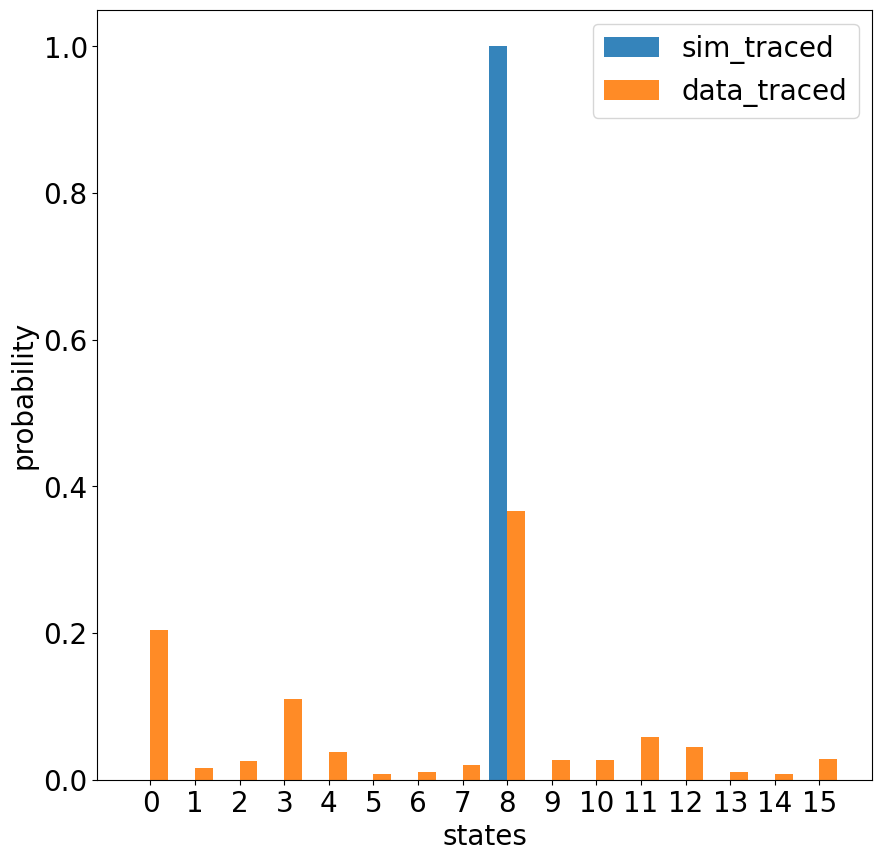

2024-02-23-194240_Line_016.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



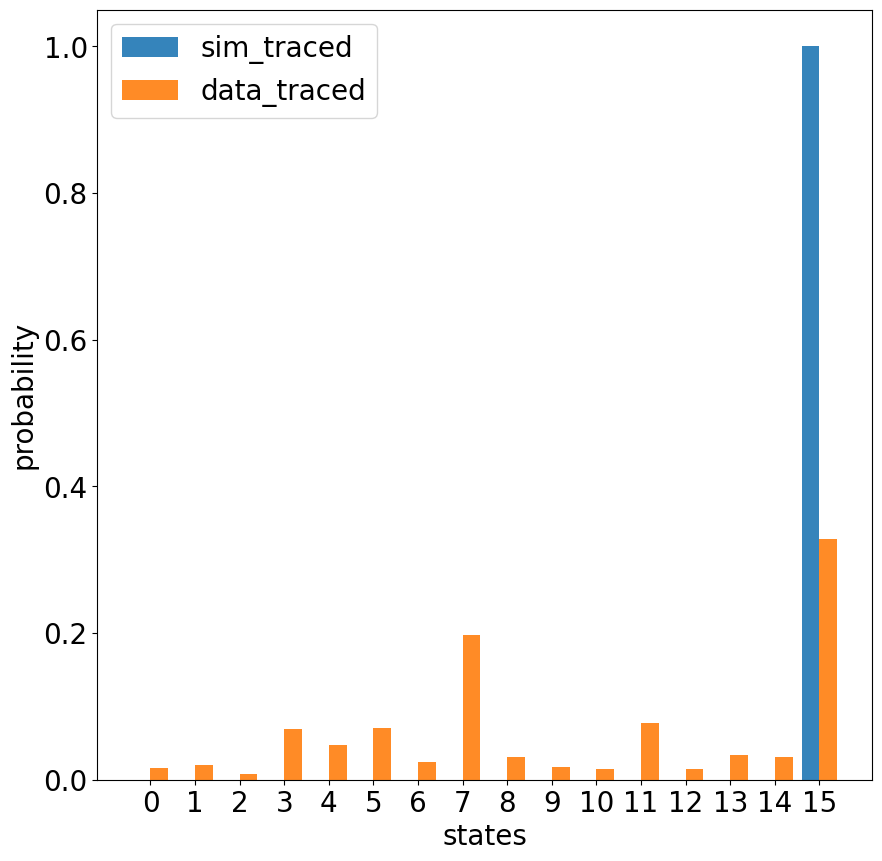

2024-02-23-200621_Line_017.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



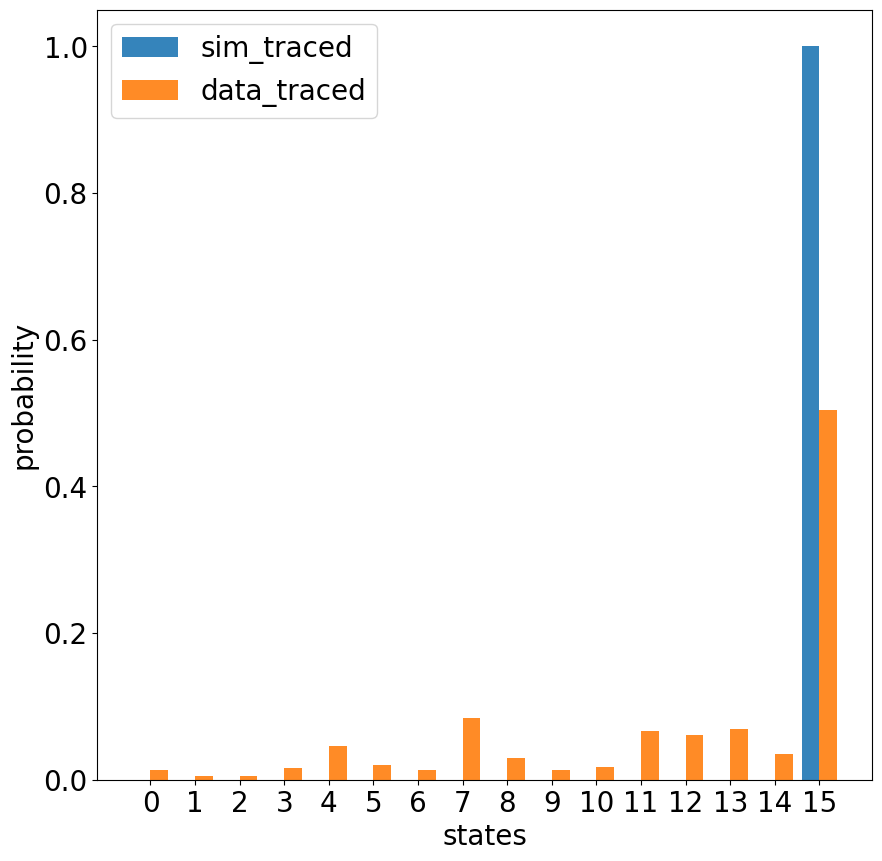

2024-02-23-200712_Line_018.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



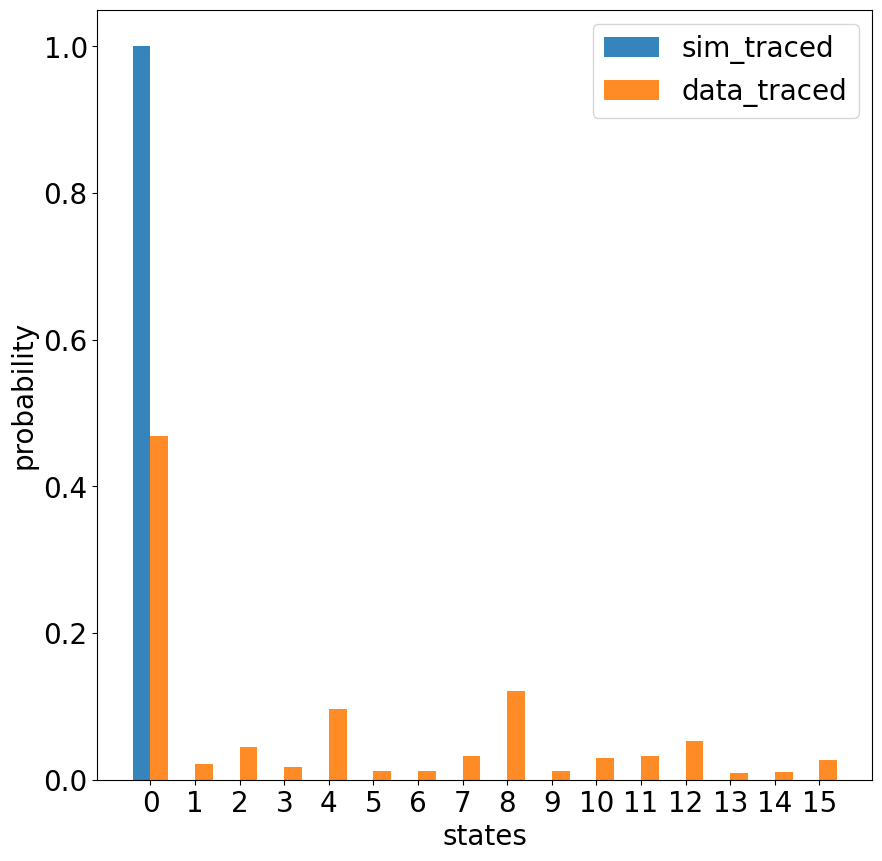

2024-02-23-200808_Line_019.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



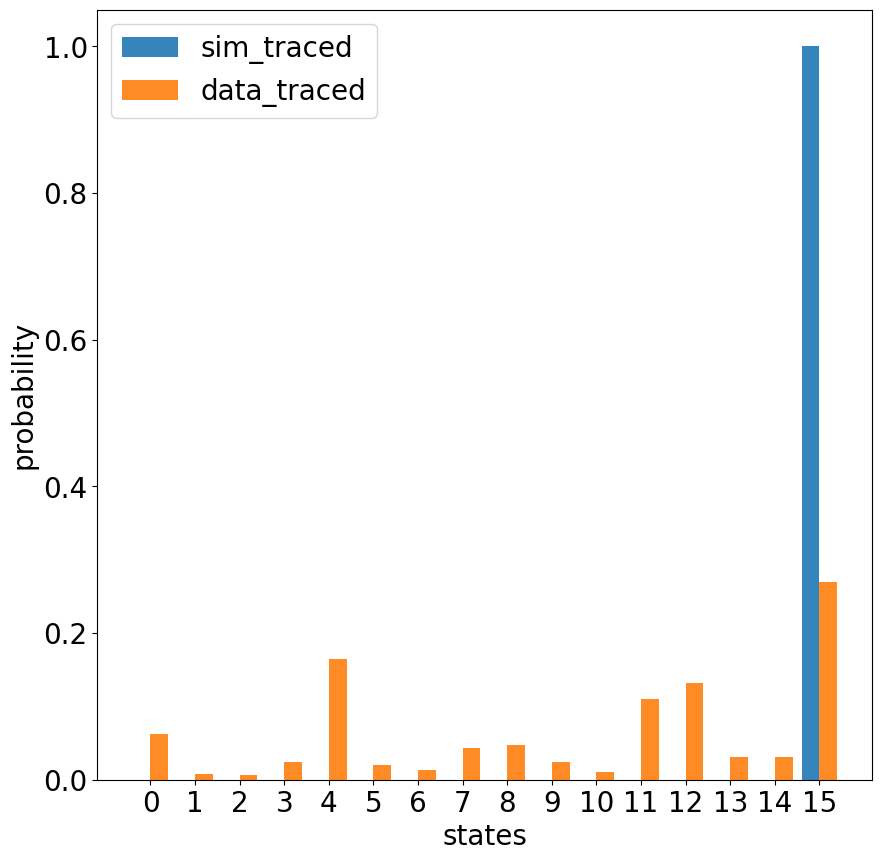

2024-02-23-200902_Line_020.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



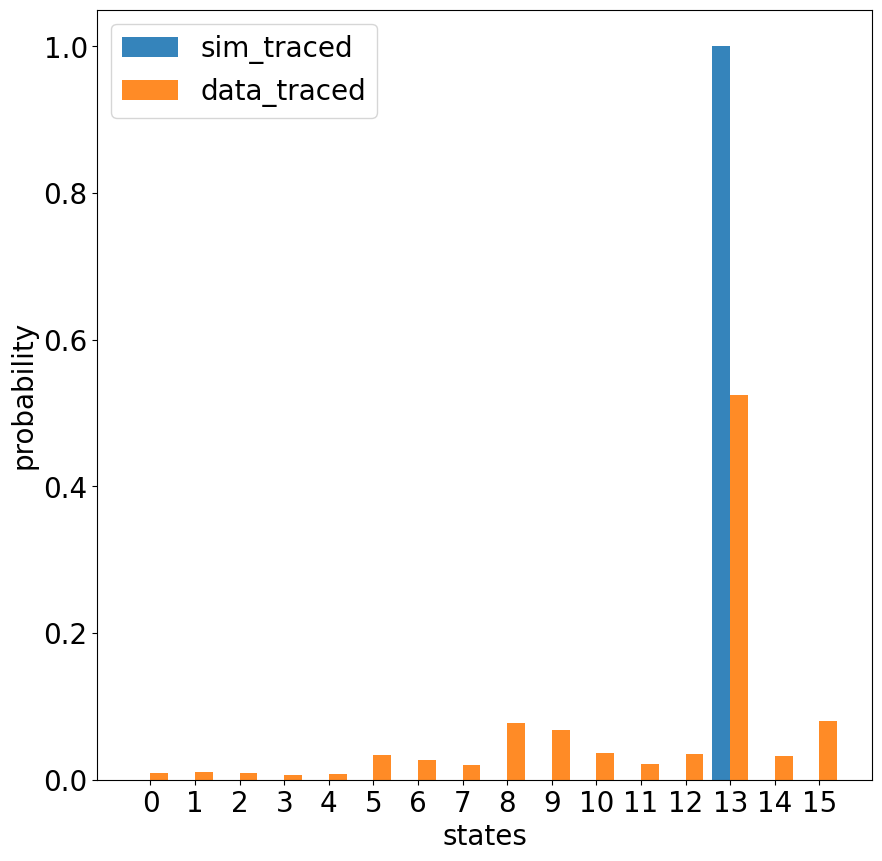

In [10]:
# filenames_data=[]
# counts_d16=[]
# counts_d16_spam=[]
# counts=[]
# counts_spam=[]
# filenames_data=filenames_d16.copy()
# # print (filenames_data)
# # # print (len(filenames_data))
# paf_data=paf_data_d16
# circuit=c_d16
# for i in range (len(filenames_data)):
#     print (filenames_data[i])
#     a.Import(paf_data+filenames_data[i],keep_file=True)
#     data_traced=Trace_Out(a,[0,1,2,3])
#     counts=[round(shots*x) for x in  data_traced.population]
#     counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
#     counts_d16.append(counts_ibm_mapping_dic)
    
# #     a_s=spam1.Correct_SPAM(a)
# #     data_traced_spam=Trace_Out(a_s,[0,1,2,3])
# #     counts_spam=[round(shots*x) for x in  data_traced_spam.population]
# #     counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
# #     counts_d8_spam.append(counts_ibm_mapping_dic_spam)
    
# #     a_0703.Import(paf_data_d8_0703+filenames_d8_0703[i],keep_file=True)
# #     data_0703_traced=Trace_Out(a_0703,[0,1,2,3])
    
#     b_c.Interpret_GatesLab_Sequence(circuit[i])
#     print (circuit[i])
#     b=b_c.Simulate()
#     sim_traced=Trace_Out(b,[0,1,2,3])
# #     Display_States_Population(states=[b,a,a_s],label=["simulation","d=8","spam"])
#     Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-03-01-184449_Line_001.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+42:FTXA420

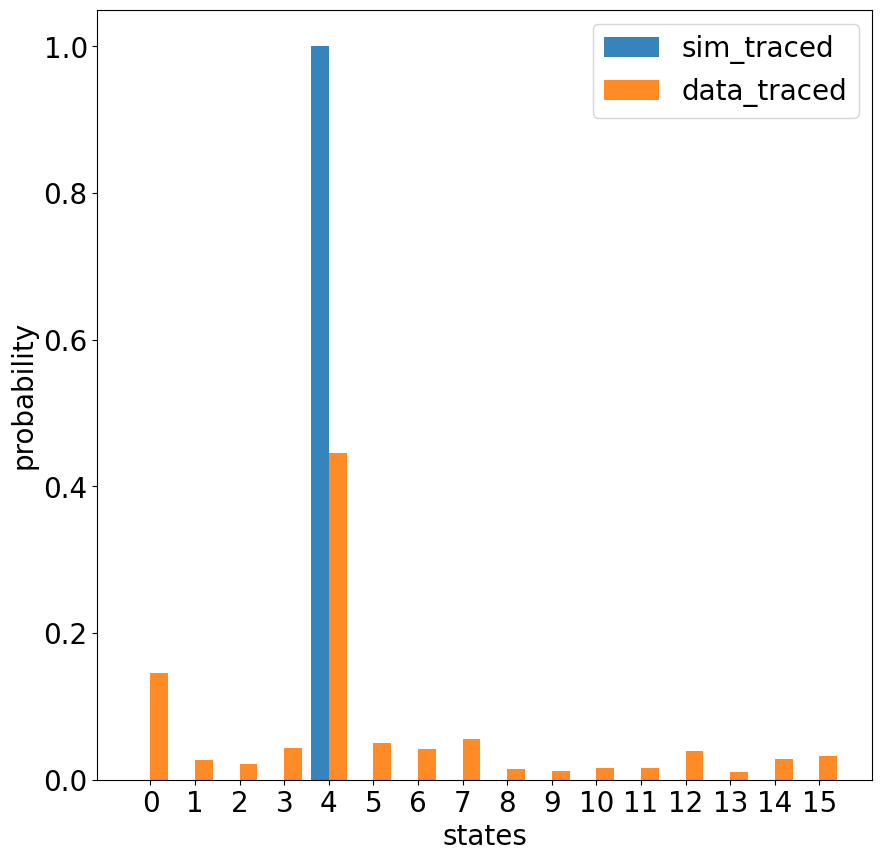

2024-03-01-184642_Line_002.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:R

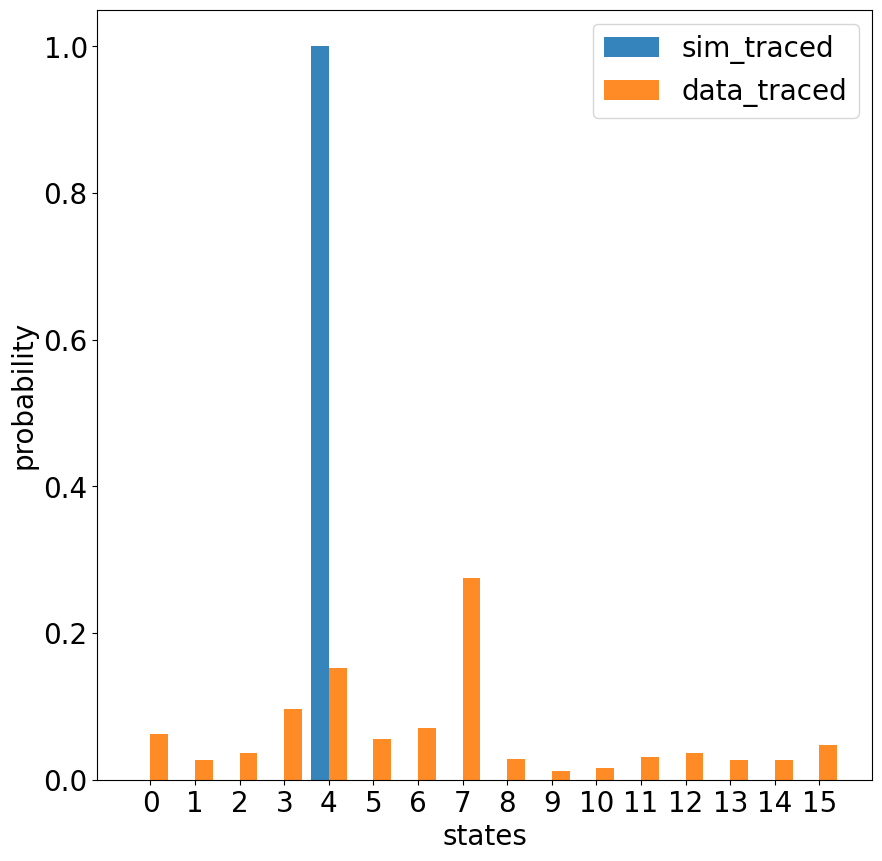

2024-03-01-184834_Line_003.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:FTXA450.2500+:RX+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:RY+51:RY+42

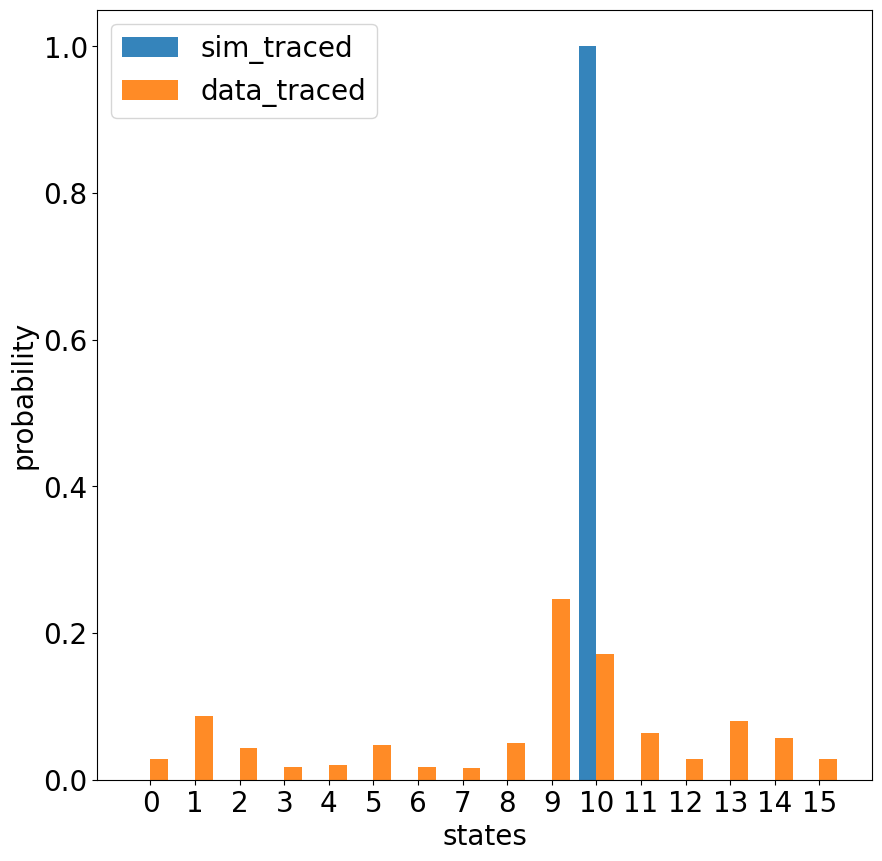

2024-03-01-185023_Line_004.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-1

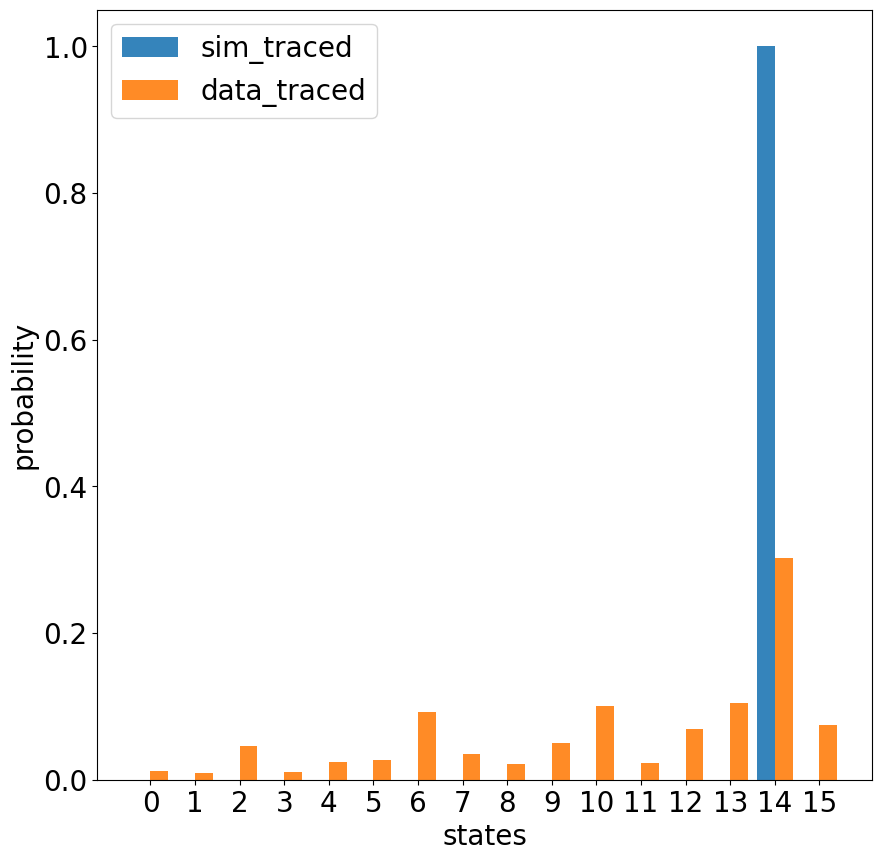

2024-03-01-185454_Line_005.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RY+51:FTXA450.2500+:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+

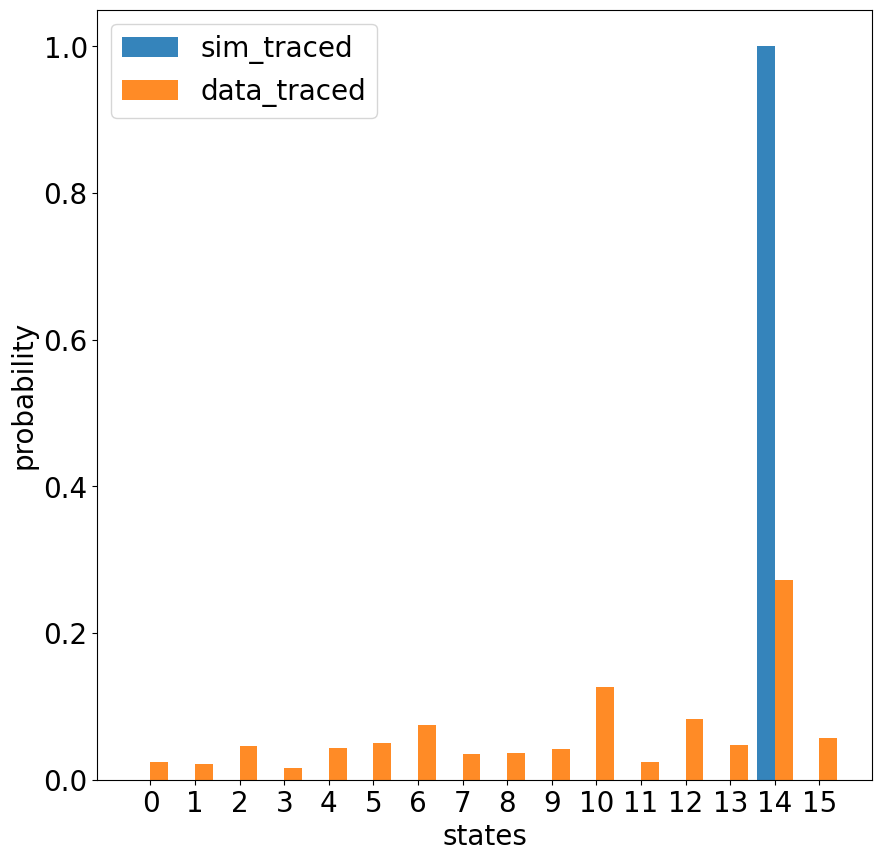

2024-03-01-185648_Line_006.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+5

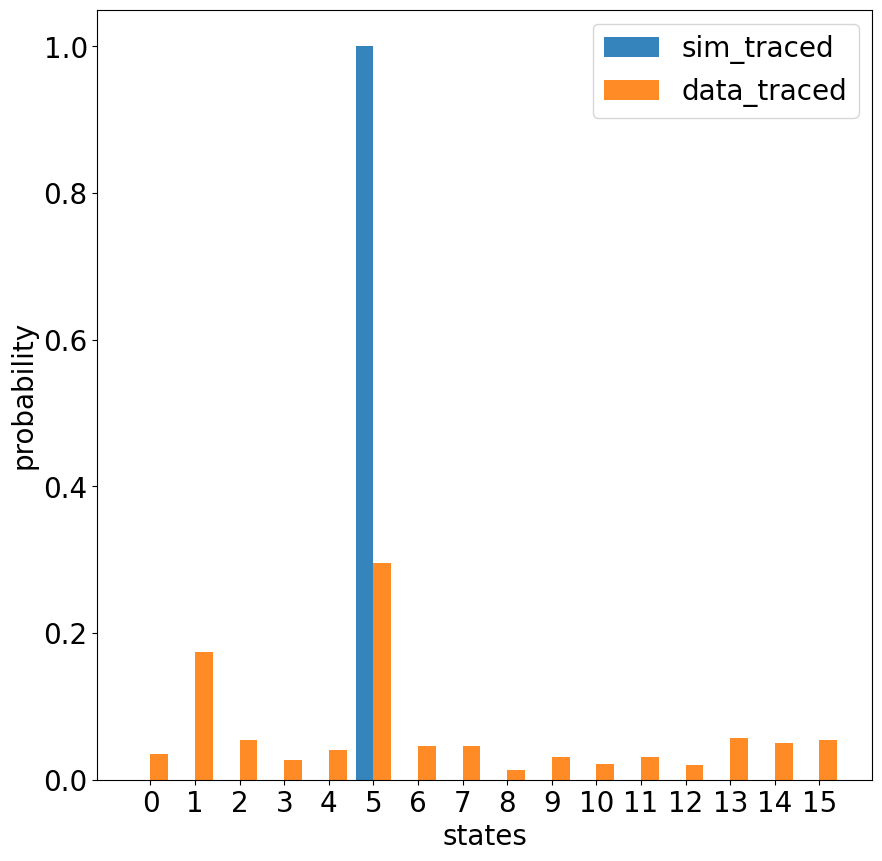

2024-03-01-185836_Line_007.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-

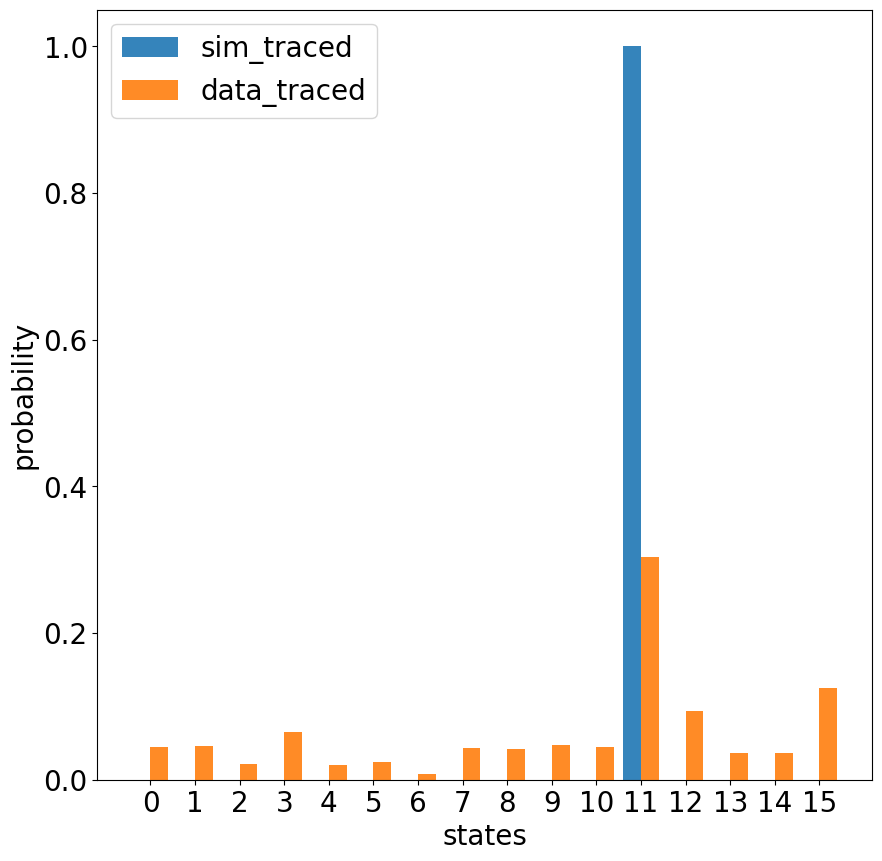

2024-03-01-190029_Line_008.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:A

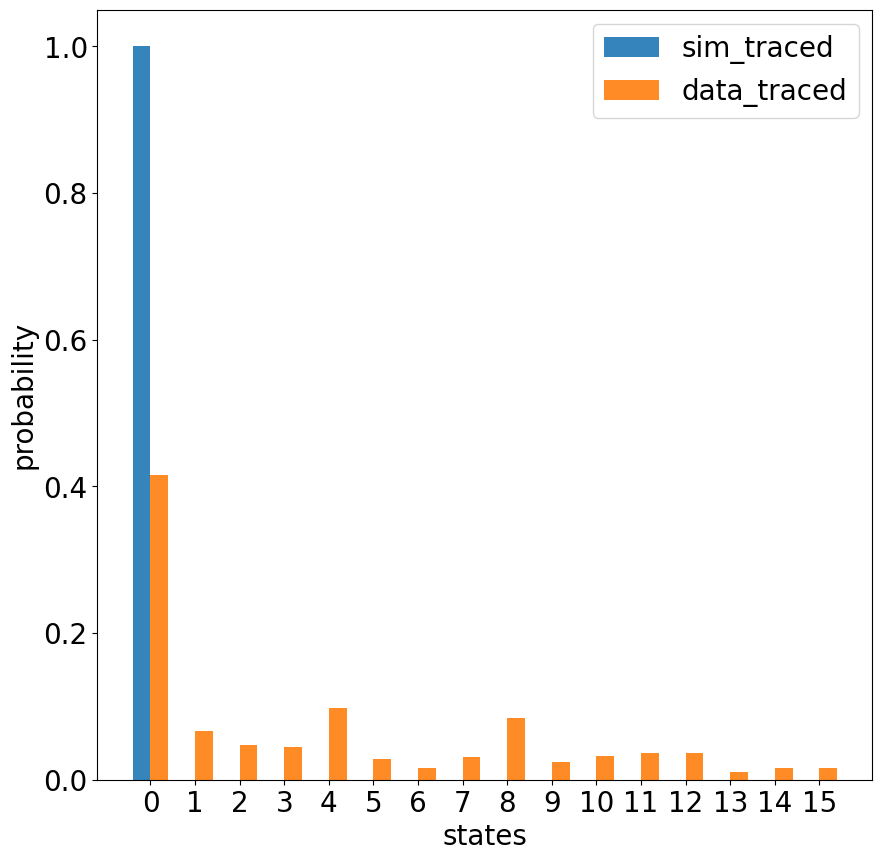

2024-03-01-190316_Line_009.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:RY+42:FTXA420.2500+:RY-42:RX

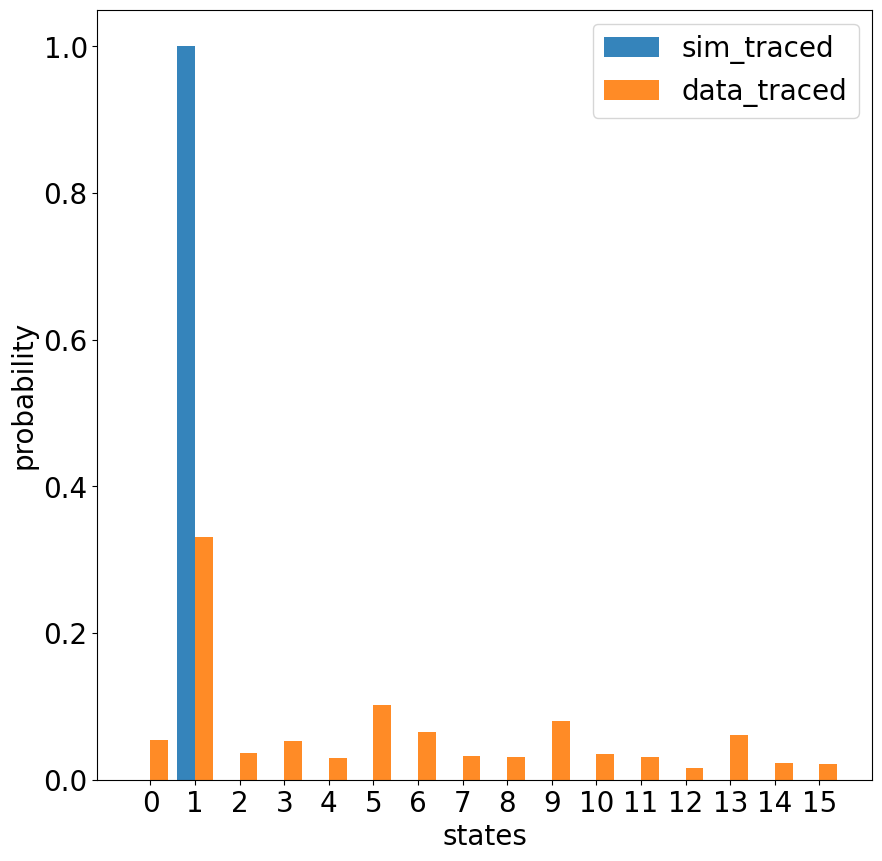

2024-03-01-190508_Line_010.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:FTXA450.2500+:RY+41:FTXA450.2500+:RX+51:FTXA450.2500+:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:FTXA450.2500+:RX+51:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+

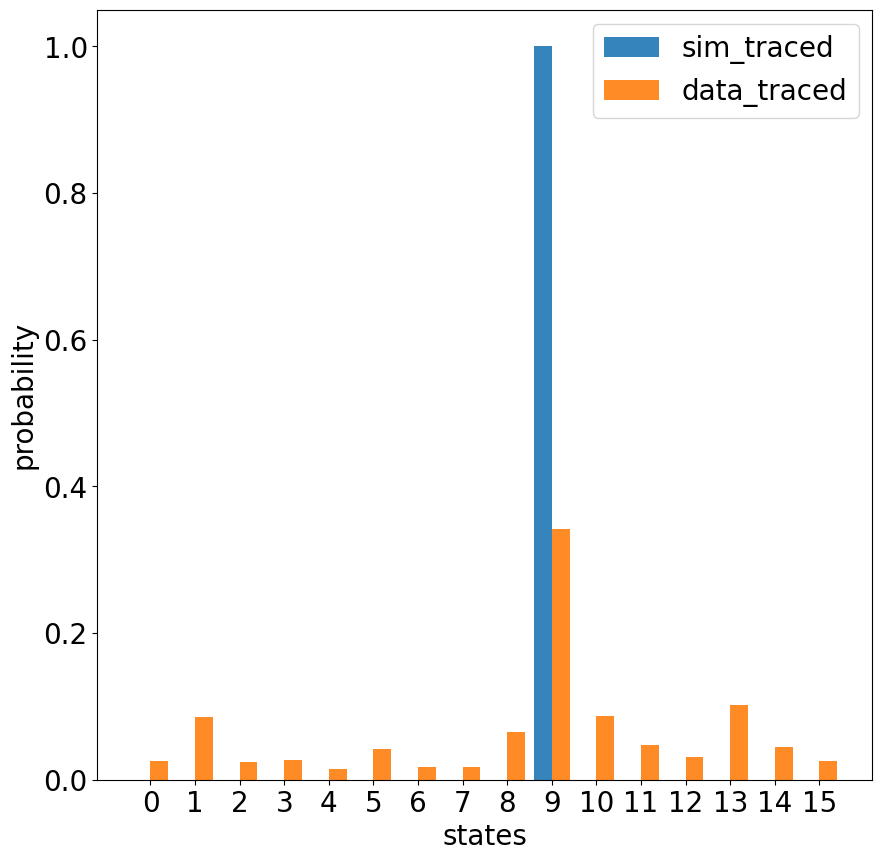

2024-03-01-190657_Line_011.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:RX+41:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ4+1.0000:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+42:FTX

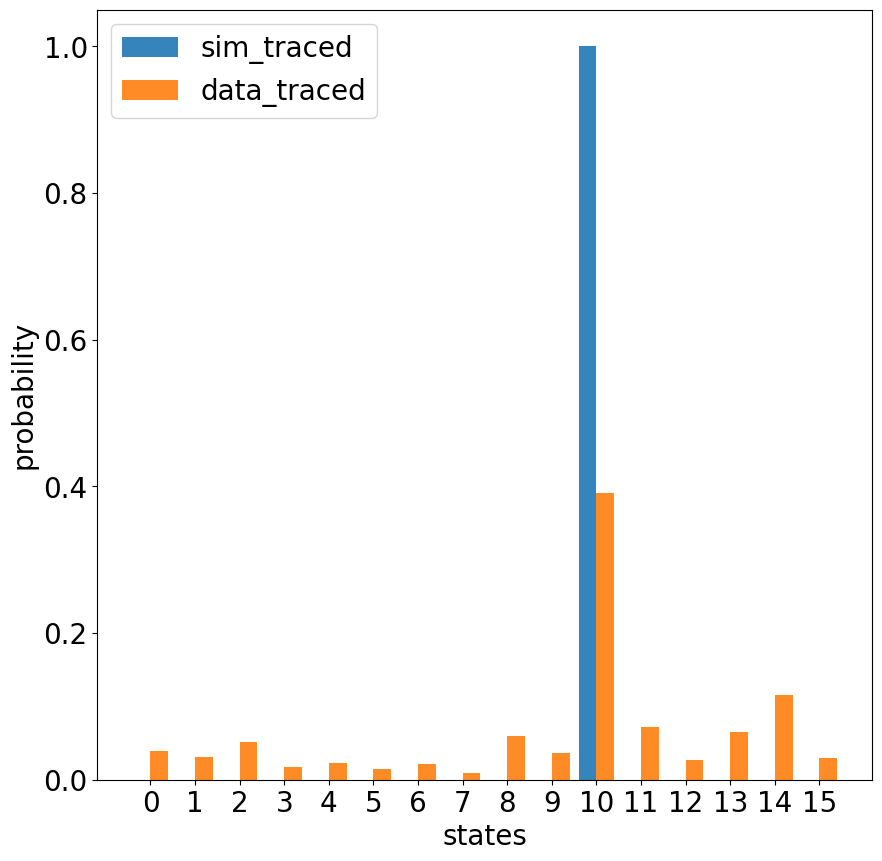

In [10]:
filenames_data=[]
counts_d32=[]
counts_d32_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d32.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d32
circuit=c_d32
a_comp_2=Quantum_State(5)
a_comp_3=Quantum_State(5)
a_comp_4=Quantum_State(5)
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d32.append(counts_ibm_mapping_dic)
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])
    # if (i==1):
        
    #     a_comp.Import("/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240304/2024-03-04 EAB__d=32/2024-03-04-132728_Line_002.txt",keep_file=True)
    #     a_comp_traced=Trace_Out(a_comp,[0,1,2,3])
    #     a_comp_2.Import("/Volumes/funkflower/Labs/Gates/Data/2024/202402/20240223/2024-02-23 EAB__d=32/2024-02-23-170408_Line_002.txt",keep_file=True)
    #     a_comp_traced_2=Trace_Out(a_comp_2,[0,1,2,3])
    #     a_comp_3.Import("/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240304/2024-03-04 EAB__d=32/2024-03-04-190826_Line_002.txt",keep_file=True)
    #     a_comp_traced_3=Trace_Out(a_comp_3,[0,1,2,3])
    #     a_comp_4.Import("/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240304/2024-03-04 EAB__d=32/2024-03-04-201115_Line_002.txt",keep_file=True)
    #     a_comp_traced_4=Trace_Out(a_comp_4,[0,1,2,3])
    #     Display_States_Population(states=[sim_traced,data_traced,a_comp_traced,a_comp_traced_2,a_comp_traced_3,a_comp_traced_4],label=["sim_traced","0229","0304","0223","030415us","15us good gates"])
    # if (i==2):
        
    #     a_comp.Import("/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240304/2024-03-04 EAB__d=32/2024-03-04-132920_Line_003.txt",keep_file=True)
    #     a_comp_traced=Trace_Out(a_comp,[0,1,2,3])
    #     a_comp_2.Import("/Volumes/funkflower/Labs/Gates/Data/2024/202402/20240223/2024-02-23 EAB__d=32/2024-02-23-170546_Line_003.txt",keep_file=True)
    #     a_comp_traced_2=Trace_Out(a_comp_2,[0,1,2,3])

    #     a_comp_3.Import("/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240304/2024-03-04 EAB__d=32/2024-03-04-191019_Line_003.txt",keep_file=True)
    #     a_comp_traced_3=Trace_Out(a_comp_3,[0,1,2,3])
    #     a_comp_4.Import("/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240304/2024-03-04 EAB__d=32/2024-03-04-201308_Line_003.txt",keep_file=True)
    #     a_comp_traced_4=Trace_Out(a_comp_4,[0,1,2,3])
    #     # /Volumes/funkflower/Labs/Gates/Data/2024/202403/20240304/2024-03-04 EAB__d=32/2024-03-04-201308_Line_003.txt
    #     Display_States_Population(states=[sim_traced,data_traced,a_comp_traced,a_comp_traced_2,a_comp_traced_3,a_comp_traced_4],label=["sim_traced","0229","0304","0223","030415us","0304 15us good gates"])
    # else:
    #     Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

In [12]:
# print (counts_d2[0])
# print (counts_d2_spam[0])

In [13]:
import copy
from copy import copy, deepcopy
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/02062024EABmapping45213_FT/f1c90c3d-98e5-441a-b825-eca2c372abf9XX45213_FT_01+10", "rb") as fp:   # Unpickling
    eab_load = pickle.load(fp)

eab_load_cpy=deepcopy(eab_load[0:100])
eab_load_cpy_spam=deepcopy(eab_load[0:100])

In [14]:
C=20
for i in range (C):
#     print (i)
    assert eab_load_cpy[i]["L"]==2
    print (eab_load_cpy[i]["counts"])
    print (counts_d2_sim[i])

    print (counts_d2[i].copy())
    print ("\n")
    eab_load_cpy[i]["counts"]=counts_d2[i].copy()


    
# for i in range (C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==2
#     eab_load_cpy_spam[i]["counts"]=counts_d2_spam[i].copy()



# for i in range (C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])

{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 0, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 2000, '0111': 0, '1111': 0}
{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 0, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 2000, '0111': 0, '1111': 0}
{'0000': 6, '1000': 12, '0100': 1, '1100': 5, '0010': 9, '1010': 59, '0110': 5, '1110': 67, '0001': 24, '1001': 102, '0101': 3, '1101': 9, '0011': 41, '1011': 1612, '0111': 3, '1111': 42}


{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 2000, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 0, '0111': 0, '1111': 0}
{'0000': 0, '1000': 0, '0100': 0, '1100': 0, '0010': 0, '1010': 0, '0110': 0, '1110': 2000, '0001': 0, '1001': 0, '0101': 0, '1101': 0, '0011': 0, '1011': 0, '0111': 0, '1111': 0}
{'0000': 23, '1000': 3, '0100': 18, '1100': 64, '0010': 5, '1010': 43, '0110': 47, '1110':

In [15]:
for i in range (C,2*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==4
    eab_load_cpy[i]["counts"]=counts_d4[i-C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i]["counts"])
    
# for i in range (C,2*C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==4
#     eab_load_cpy_spam[i]["counts"]=counts_d4_spam[i-C].copy()

    #     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy_spam[i]["counts"])

# for i in range (C,2*C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])    

In [16]:
for i in range (2*C,3*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==8
    eab_load_cpy[i]["counts"]=counts_d8[i-2*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

# for i in range (2*C,3*C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==8
#     eab_load_cpy_spam[i]["counts"]=counts_d8_spam[i-2*C].copy()

#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy_spam[i]["counts"])

# for i in range (2*C,3*C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])    

In [17]:
# print (eab_load_cpy)

In [18]:
for i in range (3*C,4*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==16
    eab_load_cpy[i]["counts"]=counts_d16[i-3*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

for i in range (4*C,5*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==32
    eab_load_cpy[i]["counts"]=counts_d32[i-4*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

In [21]:
filename = str(uuid.uuid4())
filename+="XX45213_FTXX_02232024_01+10_ExperimentalData"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0223_45213/eab_results_file/"+filename, "wb") as fp:
    pickle.dump(eab_load_cpy, fp)


Data analysis

plot average fidelity and fit

plot fidelity from each circuit and fit

data analysis with bootstrapping

spam results

In [ ]:

b=[]
c=[1,2]
f=c
c=[1]
print (d)
print (b)
print (c)